# Import data and packages

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
import umap
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from collections import Counter
from collections import defaultdict
import scipy.stats as stats
import networkx as nx
!pip install plotly
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import adjusted_rand_score
import matplotlib.ticker as ticker
from scipy.cluster.hierarchy import fcluster 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fowlkes_mallows_score
from scipy.cluster.hierarchy import cophenet
import pyranges as pr 

RNA = pd.read_csv("data/2.RNA-Seq data.CSV", sep=";")
RNA_Bcells = pd.read_csv("data/RNA_Bcells.csv", index_col=0)
ATAC = pd.read_csv("data/1.ATAC-Seq data.CSV", sep=";", engine="python")
QC = pd.read_csv("data/ATAC_QCmatric.csv", sep=";")
QC_Bcells = pd.read_csv("data/ATAC_QC_Bcells.csv")

# Information about the data


In [3]:
RNA.head()

,Unnamed: 0,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,...,MF.PC,MF.Fem.PC,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
0,0610005C13Rik,1.096.731.711,1.096.731.711,1.021.750.097,102.181.159,1.205.235.792,1.326.779.959,1.392.995.822,1.821.243.417,1.025.543.402,...,1.025.785.014,1.025.785.014,1.251.081.757,1.147.248.836,1.024.461.573,1.019.656.145,1.017.884.268,1.019.106.789,1.017.884.268,102.471.956
1,0610007P14Rik,2.060.539.867,2.461.053.168,1.924.246.358,2.042.983.576,1.897.591.745,2.101.951.555,1.802.194.401,1.378.025.433,1.394.367.192,...,1.216.034.485,1.051.408.945,1.018.414.626,1.756.207.071,2.804.069.644,2.002.280.289,2.081.718.215,8.857.858.996,1.290.218.737,1.406.557.627
2,0610009B22Rik,7.827.205.873,7.883.703.048,6.884.475.073,7.641.816.858,1.060.856.192,7.750.281.723,6.821.309.233,572.244.261,5.678.748.898,...,8.869.142.564,7.342.365.579,6.888.126.843,6.081.190.673,5.657.801.548,1.003.977.658,3.737.308.029,7.388.846.835,7.719.183.095,8.424.581.587
3,0610009L18Rik,857.715.947,1.679.138.572,155.115.492,1.694.735.423,1.058.370.366,8.664.784.443,2.878.171.712,8.952.120.008,1.187.398.402,...,6.132.817.783,8.965.889.003,4.080.444.548,1.198.740.825,5.627.218.596,4.227.672.505,2.199.351.739,1.460.089.522,2.482.515.881,1.023.994.726
4,0610009O20Rik,168.645.852,1.579.260.221,1.559.416.414,1.862.614.637,1.625.845.558,1.520.880.024,1.630.722.909,1.331.160.831,8.805.298.222,...,1.025.923.988,1.471.393.233,1.309.243.541,1.075.421.425,8.833.833.033,10.077.915,8.644.240.779,1.933.071.751,1.872.127.201,4.546.488.905


In [4]:
RNA.shape

(17535, 87)

In [5]:
RNA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17535 entries, 0 to 17534
Data columns (total 87 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             17535 non-null  object
 1   LTHSC.34-.BM           17535 non-null  object
 2   LTHSC.34+.BM           17535 non-null  object
 3   STHSC.150-.BM          17535 non-null  object
 4   MPP4.135+.BM           17535 non-null  object
 5   proB.CLP.BM            17535 non-null  object
 6   proB.FrA.BM            17535 non-null  object
 7   proB.FrBC.BM           17535 non-null  object
 8   B.FrE.BM               17535 non-null  object
 9   B1b.PC                 17535 non-null  object
 10  B.T1.Sp                17535 non-null  object
 11  B.T2.Sp                17535 non-null  object
 12  B.T3.Sp                17535 non-null  object
 13  B.Sp                   17535 non-null  object
 14  B.Fem.Sp               17535 non-null  object
 15  B.MZ.Sp            

In [6]:
RNA.describe()

,Unnamed: 0,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,...,MF.PC,MF.Fem.PC,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
count,17535,17535,17535,17535,17535,17535,17535,17535,17535,17535,...,17535,17535,17535,17535,17535,17535,17535,17535,17535,17535
unique,17535,9196,9235,8999,9215,9230,10597,9163,9079,8697,...,10592,10668,8961,8985,9060,9685,8787,9505,10386,10386
top,0610005C13Rik,1.020.794.861,1.021.260.412,1.021.750.097,102.181.159,1.023.170.884,1.021.346.039,1.024.461.573,1.025.832.874,1.025.543.402,...,1.025.785.014,1.025.785.014,102.181.159,1.022.766.826,1.024.461.573,1.019.656.145,1.017.884.268,1.019.106.789,1.017.884.268,1
freq,1,3217,3569,3322,3662,3990,3395,4278,4552,4669,...,4462,4509,3264,3565,4213,3040,2493,2684,2589,343


# Data Clean-up

In [7]:
#coloumns with numerical datas for Clustering
RNA_new = RNA.iloc[:, 1:]
RNA_new.head()

,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,B.T1.Sp,...,MF.PC,MF.Fem.PC,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
0,1.096.731.711,1.096.731.711,1.021.750.097,102.181.159,1.205.235.792,1.326.779.959,1.392.995.822,1.821.243.417,1.025.543.402,3.383.058.327,...,1.025.785.014,1.025.785.014,1.251.081.757,1.147.248.836,1.024.461.573,1.019.656.145,1.017.884.268,1.019.106.789,1.017.884.268,102.471.956
1,2.060.539.867,2.461.053.168,1.924.246.358,2.042.983.576,1.897.591.745,2.101.951.555,1.802.194.401,1.378.025.433,1.394.367.192,1.383.349.648,...,1.216.034.485,1.051.408.945,1.018.414.626,1.756.207.071,2.804.069.644,2.002.280.289,2.081.718.215,8.857.858.996,1.290.218.737,1.406.557.627
2,7.827.205.873,7.883.703.048,6.884.475.073,7.641.816.858,1.060.856.192,7.750.281.723,6.821.309.233,572.244.261,5.678.748.898,4.046.050.707,...,8.869.142.564,7.342.365.579,6.888.126.843,6.081.190.673,5.657.801.548,1.003.977.658,3.737.308.029,7.388.846.835,7.719.183.095,8.424.581.587
3,857.715.947,1.679.138.572,155.115.492,1.694.735.423,1.058.370.366,8.664.784.443,2.878.171.712,8.952.120.008,1.187.398.402,1.672.196.819,...,6.132.817.783,8.965.889.003,4.080.444.548,1.198.740.825,5.627.218.596,4.227.672.505,2.199.351.739,1.460.089.522,2.482.515.881,1.023.994.726
4,168.645.852,1.579.260.221,1.559.416.414,1.862.614.637,1.625.845.558,1.520.880.024,1.630.722.909,1.331.160.831,8.805.298.222,8.740.847.929,...,1.025.923.988,1.471.393.233,1.309.243.541,1.075.421.425,8.833.833.033,10.077.915,8.644.240.779,1.933.071.751,1.872.127.201,4.546.488.905


In [8]:
#which columns are saved as float
float_cols = RNA_new.select_dtypes(include='float64').columns
print(float_cols)

Index([], dtype='object')


In [9]:
#which columns are saved as objects 
obj_cols = RNA_new.select_dtypes(include='object').columns
print(obj_cols)

Index(['LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM',
       'proB.CLP.BM', 'proB.FrA.BM', 'proB.FrBC.BM', 'B.FrE.BM', 'B1b.PC',
       'B.T1.Sp', 'B.T2.Sp', 'B.T3.Sp', 'B.Sp', 'B.Fem.Sp', 'B.MZ.Sp',
       'B.Fo.Sp', 'B.mem.Sp', 'B.GC.CB.Sp', 'B.GC.CC.Sp', 'B.PB.Sp', 'B.PC.Sp',
       'B.PC.BM', 'preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th', 'preT.DN3.Th',
       'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th', 'T.4.Nve.Sp',
       'T.4.Nve.Fem.Sp', 'T.8.Nve.Sp', 'T.4.Sp.aCD3+CD40.18hr',
       'Treg.4.FP3+.Nrplo.Co', 'Treg.4.25hi.Sp', 'T8.TN.P14.Sp',
       'T8.IEL.LCMV.d7.Gut', 'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp',
       'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp',
       'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d',
       'Tgd.g2+d17.24a+.Th', 'Tgd.g2+d17.LN', 'Tgd.g2+d1.24a+.Th',
       'Tgd.g2+d1.LN', 'Tgd.g1.1+d1.24a+.Th', 'Tgd.g1.1+d1.LN', 'Tgd.Sp',
       'NK.27+11b-.BM', 'NK.27+11b+.BM', 'NK.27-11b+.BM', 'NK.27+11b-.Sp',
       '

In [10]:
#Remove thousand separators and convert data from object to numeric
RNA_num = RNA_new.copy()
RNA_num[obj_cols] = RNA_num[obj_cols].apply(lambda col: col.str.replace('.', '', regex=False).astype(float))
RNA_num.head()

,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,B.T1.Sp,...,MF.PC,MF.Fem.PC,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
0,1.096732e+09,1.096732e+09,1.021750e+09,1.021812e+08,1.205236e+09,1.326780e+09,1.392996e+09,1.821243e+09,1.025543e+09,3.383058e+09,...,1.025785e+09,1.025785e+09,1.251082e+09,1.147249e+09,1.024462e+09,1.019656e+09,1.017884e+09,1.019107e+09,1.017884e+09,1.024720e+08
1,2.060540e+09,2.461053e+09,1.924246e+09,2.042984e+09,1.897592e+09,2.101952e+09,1.802194e+09,1.378025e+09,1.394367e+09,1.383350e+09,...,1.216034e+09,1.051409e+09,1.018415e+09,1.756207e+09,2.804070e+09,2.002280e+09,2.081718e+09,8.857859e+09,1.290219e+09,1.406558e+09
2,7.827206e+09,7.883703e+09,6.884475e+09,7.641817e+09,1.060856e+09,7.750282e+09,6.821309e+09,5.722443e+08,5.678749e+09,4.046051e+09,...,8.869143e+09,7.342366e+09,6.888127e+09,6.081191e+09,5.657802e+09,1.003978e+09,3.737308e+09,7.388847e+09,7.719183e+09,8.424582e+09
3,8.577159e+08,1.679139e+09,1.551155e+08,1.694735e+09,1.058370e+09,8.664784e+09,2.878172e+09,8.952120e+09,1.187398e+09,1.672197e+09,...,6.132818e+09,8.965889e+09,4.080445e+09,1.198741e+09,5.627219e+09,4.227673e+09,2.199352e+09,1.460090e+09,2.482516e+09,1.023995e+09
4,1.686459e+08,1.579260e+09,1.559416e+09,1.862615e+09,1.625846e+09,1.520880e+09,1.630723e+09,1.331161e+09,8.805298e+09,8.740848e+09,...,1.025924e+09,1.471393e+09,1.309244e+09,1.075421e+09,8.833833e+09,1.007792e+07,8.644241e+09,1.933072e+09,1.872127e+09,4.546489e+09


In [11]:
#Replace infinitive values with NaN
RNA_clean = RNA_num.replace([np.inf, -np.inf], np.nan).dropna()
RNA_clean.head()

,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,B.T1.Sp,...,MF.PC,MF.Fem.PC,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
0,1.096732e+09,1.096732e+09,1.021750e+09,1.021812e+08,1.205236e+09,1.326780e+09,1.392996e+09,1.821243e+09,1.025543e+09,3.383058e+09,...,1.025785e+09,1.025785e+09,1.251082e+09,1.147249e+09,1.024462e+09,1.019656e+09,1.017884e+09,1.019107e+09,1.017884e+09,1.024720e+08
1,2.060540e+09,2.461053e+09,1.924246e+09,2.042984e+09,1.897592e+09,2.101952e+09,1.802194e+09,1.378025e+09,1.394367e+09,1.383350e+09,...,1.216034e+09,1.051409e+09,1.018415e+09,1.756207e+09,2.804070e+09,2.002280e+09,2.081718e+09,8.857859e+09,1.290219e+09,1.406558e+09
2,7.827206e+09,7.883703e+09,6.884475e+09,7.641817e+09,1.060856e+09,7.750282e+09,6.821309e+09,5.722443e+08,5.678749e+09,4.046051e+09,...,8.869143e+09,7.342366e+09,6.888127e+09,6.081191e+09,5.657802e+09,1.003978e+09,3.737308e+09,7.388847e+09,7.719183e+09,8.424582e+09
3,8.577159e+08,1.679139e+09,1.551155e+08,1.694735e+09,1.058370e+09,8.664784e+09,2.878172e+09,8.952120e+09,1.187398e+09,1.672197e+09,...,6.132818e+09,8.965889e+09,4.080445e+09,1.198741e+09,5.627219e+09,4.227673e+09,2.199352e+09,1.460090e+09,2.482516e+09,1.023995e+09
4,1.686459e+08,1.579260e+09,1.559416e+09,1.862615e+09,1.625846e+09,1.520880e+09,1.630723e+09,1.331161e+09,8.805298e+09,8.740848e+09,...,1.025924e+09,1.471393e+09,1.309244e+09,1.075421e+09,8.833833e+09,1.007792e+07,8.644241e+09,1.933072e+09,1.872127e+09,4.546489e+09


In [12]:
#Use CPM (Counts Per Million) as normalization method
cpm = RNA_num.div(RNA_num.sum(axis=0), axis=1) * 1e6
cpm.head()

,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,B.T1.Sp,...,MF.PC,MF.Fem.PC,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
0,22.687573,22.690058,20.958102,2.263757,24.845195,27.492223,28.833200,37.383975,21.477871,68.353987,...,21.463695,21.283987,27.822406,23.470152,20.998778,21.359282,20.971594,20.931245,21.249568,2.142564
1,42.625418,50.916224,39.470073,45.260974,39.117687,43.554562,37.303078,28.286207,29.202118,27.950291,...,25.444506,21.815657,22.648196,35.928079,57.476082,41.942835,42.889895,181.929924,26.934880,29.409403
2,161.917723,163.104316,141.214107,169.299487,21.868898,160.593675,141.192220,11.746242,118.929572,81.749609,...,185.579404,152.346556,153.182843,124.407595,115.970110,21.030857,77.000214,151.758155,161.147304,176.147716
3,17.743166,34.739354,3.181723,37.545762,21.817654,179.543097,59.574407,183.756782,24.867587,33.786387,...,128.324092,186.033002,90.743697,24.523563,115.343239,88.559315,45.313512,29.988508,51.825528,21.410480
4,3.488697,32.672991,31.986694,41.265017,33.515806,31.514172,33.753841,27.324235,184.408638,176.607007,...,21.466603,30.529901,29.115847,22.000723,181.070435,0.211107,178.098348,39.703002,39.082925,95.061533


In [13]:
#log2 transformation to stabilize variance 
RNA_normalized = np.log2(cpm + 1)
RNA_normalized.head()

,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,B.T1.Sp,...,MF.PC,MF.Fem.PC,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
0,4.566058,4.566210,4.456681,1.706534,4.691824,4.832496,4.898847,5.262432,4.490434,6.115907,...,4.489523,4.477935,4.849119,4.612951,4.459352,4.482802,4.457568,4.454916,4.475705,1.651942
1,5.447097,5.698114,5.338784,5.531724,5.326167,5.477501,5.259388,4.872149,4.916578,4.855506,...,4.724896,4.511952,4.563658,5.206646,5.869775,5.424346,5.455817,7.515147,4.803996,4.926446
2,7.348000,7.358469,7.151921,7.411930,4.515315,7.336227,7.151699,3.672000,6.906044,6.370681,...,7.543646,7.260652,7.268498,6.970481,6.869996,4.461454,6.285406,7.255106,7.341161,7.468809
3,4.228293,5.159442,2.064098,5.268500,4.512079,7.496199,5.920636,7.529484,4.693074,5.120451,...,7.014847,7.547149,6.519537,4.673758,6.862244,6.484772,5.533361,4.953661,5.723163,4.486102
4,2.166297,5.073520,5.043812,5.401392,5.109185,5.022997,5.119101,4.823965,7.534565,7.472545,...,4.489710,4.978649,4.912451,4.523607,7.508353,0.276327,7.484608,5.347063,5.324916,6.585887


In [14]:
RNA_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17535 entries, 0 to 17534
Data columns (total 86 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LTHSC.34-.BM           17535 non-null  float64
 1   LTHSC.34+.BM           17535 non-null  float64
 2   STHSC.150-.BM          17535 non-null  float64
 3   MPP4.135+.BM           17535 non-null  float64
 4   proB.CLP.BM            17535 non-null  float64
 5   proB.FrA.BM            17535 non-null  float64
 6   proB.FrBC.BM           17535 non-null  float64
 7   B.FrE.BM               17535 non-null  float64
 8   B1b.PC                 17535 non-null  float64
 9   B.T1.Sp                17535 non-null  float64
 10  B.T2.Sp                17535 non-null  float64
 11  B.T3.Sp                17535 non-null  float64
 12  B.Sp                   17535 non-null  float64
 13  B.Fem.Sp               17535 non-null  float64
 14  B.MZ.Sp                17535 non-null  float64
 15  B.

In [15]:
# filtering RNA_normalized to genes with variance > 1.2
gene_variances = RNA_normalized.var(axis=1)
variance_threshold = 1.2
high_var_genes = gene_variances[gene_variances >= variance_threshold].index
RNA_filtered = RNA_normalized.loc[high_var_genes]
print(f"Gene übrig nach Filter: {RNA_filtered.shape[0]} von {RNA_normalized.shape[0]}")


Gene übrig nach Filter: 11854 von 17535


## KMeans Clustering

In [16]:
#Number of clusters 
K = range(1, 17)
a = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(RNA_filtered)
    a.append(kmeans.inertia_)

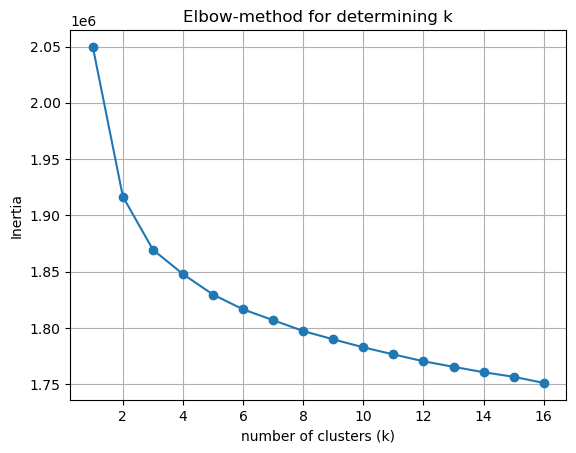

In [17]:
#Elbow-Plot für Clusteranzahl
plt.plot(K, a, marker='o')
plt.xlabel('number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow-method for determining k')
plt.grid(True)
plt.show()

In [18]:
pca = PCA(n_components=15)
RNA_pca_filtered = pca.fit_transform(RNA_filtered)
kmeans_9_RNA_filtered = KMeans(n_clusters=9, random_state=42, n_init=10)
kmeans_9_RNA_filtered.fit(RNA_filtered)

kmeans_10_RNA_filtered = KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans_10_RNA_filtered.fit(RNA_filtered)

kmeans_11_RNA_filtered = KMeans(n_clusters=11, random_state=42, n_init=10)
kmeans_11_RNA_filtered.fit(RNA_filtered)

labels_9_RNA_filtered = kmeans_9_RNA_filtered.labels_ + 1
labels_10_RNA_filtered = kmeans_10_RNA_filtered.labels_ + 1
labels_11_RNA_filtered = kmeans_11_RNA_filtered.labels_ + 1

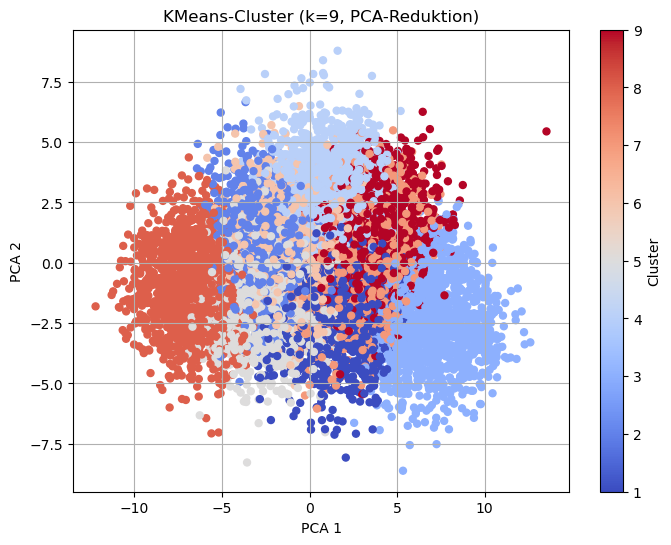

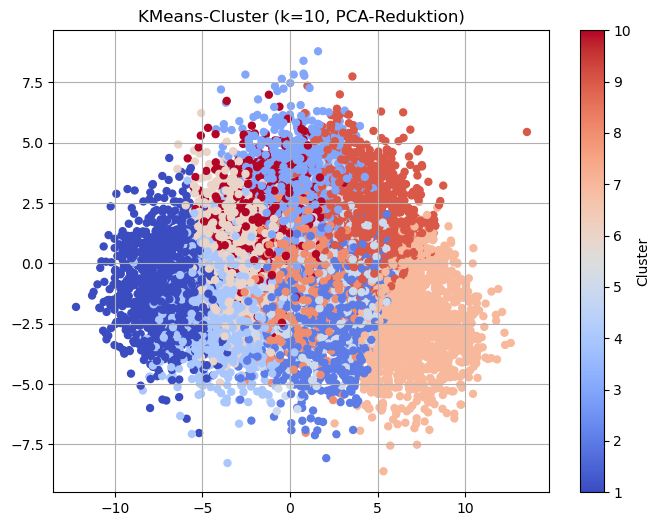

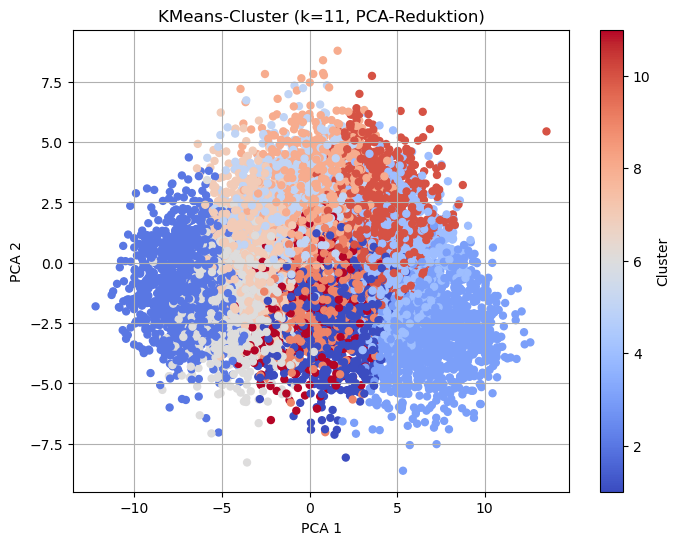

In [19]:
#k=9
plt.figure(figsize=(8,6))
plt.scatter(RNA_pca_filtered[:, 0], RNA_pca_filtered[:, 1], c=labels_9_RNA_filtered, cmap='coolwarm', s=25)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('KMeans-Cluster (k=9, PCA-Reduktion)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()
#für k=10
plt.figure(figsize=(8,6))
plt.scatter(RNA_pca_filtered[:, 0], RNA_pca_filtered[:, 1], c=labels_10_RNA_filtered, cmap='coolwarm', s=25)
plt.title('KMeans-Cluster (k=10, PCA-Reduktion)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.savefig("figures/KMeans_RNA_9.png", dpi=300, bbox_inches="tight")
plt.show()
#k=11
plt.figure(figsize=(8,6))
plt.scatter(RNA_pca_filtered[:, 0], RNA_pca_filtered[:, 1], c=labels_11_RNA_filtered, cmap='coolwarm', s=25)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('KMeans-Cluster (k=11, PCA-Reduktion)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

Clustering with k=10 looks best.

In [20]:
# adding cluster label to dataset 
RNA_filtered["cluster"] = labels_10_RNA_filtered

### Color palette with lineage_colors

In [21]:
lineages = ([
    "B", "T", "abT", "T.act", "DC", "ILC", "monocyte",
    "myeloid", "gdT", "Stem&Prog", "stroma", "Unassigned"])
palette_colors = sns.color_palette("tab20", n_colors=len(lineages))
lineage_colors = dict(zip(lineages, palette_colors))
lineage_colors["Unassigned"] = "lightgray"

with open("lineage_colors.py", "w") as f:
    f.write("# Farbzuordnung für Lineages (basierend auf tab20)\n")
    f.write("lineage_colors = {\n")
    for key, color in lineage_colors.items():
        if isinstance(color, str):
            f.write(f'    "{key}": "{color}",\n')
        else:
            rgb = ", ".join(f"{c:.6f}" for c in color)
            f.write(f'    "{key}": ({rgb}),\n')
    f.write("}\n")

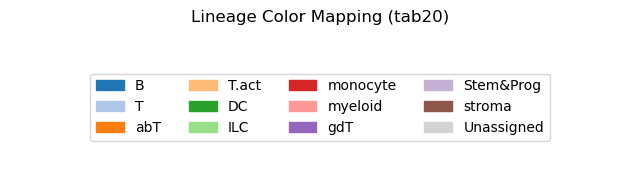

In [22]:
def show_palette(palette):
    handles = [mpatches.Patch(color=color, label=label) for label, color in palette.items()]
    plt.figure(figsize=(8, 2))
    plt.legend(handles=handles, loc='center', ncol=4)
    plt.axis('off')
    plt.title("Lineage Color Mapping (tab20)")
    plt.show()

show_palette(lineage_colors)

### Celltype_to_lineage

In [23]:
# Load lineage info
qc = pd.read_csv("data/ATAC_QCmatric.csv", sep=";")
qc.columns = qc.columns.str.strip()
qc["CellType"] = qc["CellType"].str.strip()
qc["Lineage"] = qc["Lineage"].str.strip()

# Mapping CellType → Lineage
celltype_to_lineage = qc.drop_duplicates("CellType").set_index("CellType")["Lineage"]

# 2. Determine the relationship between the chromatin landscape and gene expression

## i. Does clustering of the gene expression matrix show the same relationships between cell types as the ATAC-seq data?

In [24]:
#load the ATAC dataset: columns = cell types, rows=peaks
ATAC_scaled_ct = pd.read_csv("data/ATAC_scaled.ct.csv", sep=",")
ATAC_scaled_ct.head()

,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,preB.FrD.BM,B.FrE.BM,B1b.PC,...,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,DC.103+11b+.SI,DC.103+11b-.SI,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
0,-0.622619,-0.913335,-0.818014,-0.843321,0.867794,-0.931503,-0.956155,0.241998,-0.977376,-0.882360,...,-0.985004,-0.867550,1.323434,-0.147860,-0.842635,1.530753,-0.931429,-0.984957,1.270846,-0.044332
1,-0.622619,0.737160,-0.818014,-0.843278,-0.960118,-0.931490,-0.956118,-1.104052,-0.977401,-0.882315,...,1.306379,-0.867550,-0.231432,-0.903931,-0.842659,-0.994405,-0.931381,1.362299,-0.510506,-0.887236
2,0.723878,-0.913378,-0.818014,-0.843321,-0.960118,-0.931503,-0.956135,1.178320,-0.977390,-0.882360,...,-0.984966,-0.867524,0.386909,-0.903904,-0.842659,-0.991005,0.906252,-0.317633,1.234219,-0.887283
3,-0.622619,-0.913378,-0.818063,-0.843321,-0.960101,-0.931487,-0.956135,1.296989,-0.977364,-0.882360,...,-0.984987,0.930837,-1.047119,-0.903951,-0.842611,1.498200,-0.931381,1.603222,1.234219,-0.887283
4,-0.622619,-0.913378,-0.818063,-0.843321,-0.960118,-0.931490,0.543993,1.178320,-0.977390,-0.882334,...,-0.984987,-0.867550,-1.047119,0.710273,-0.842635,-0.994405,-0.931393,-0.317633,0.004627,1.689424


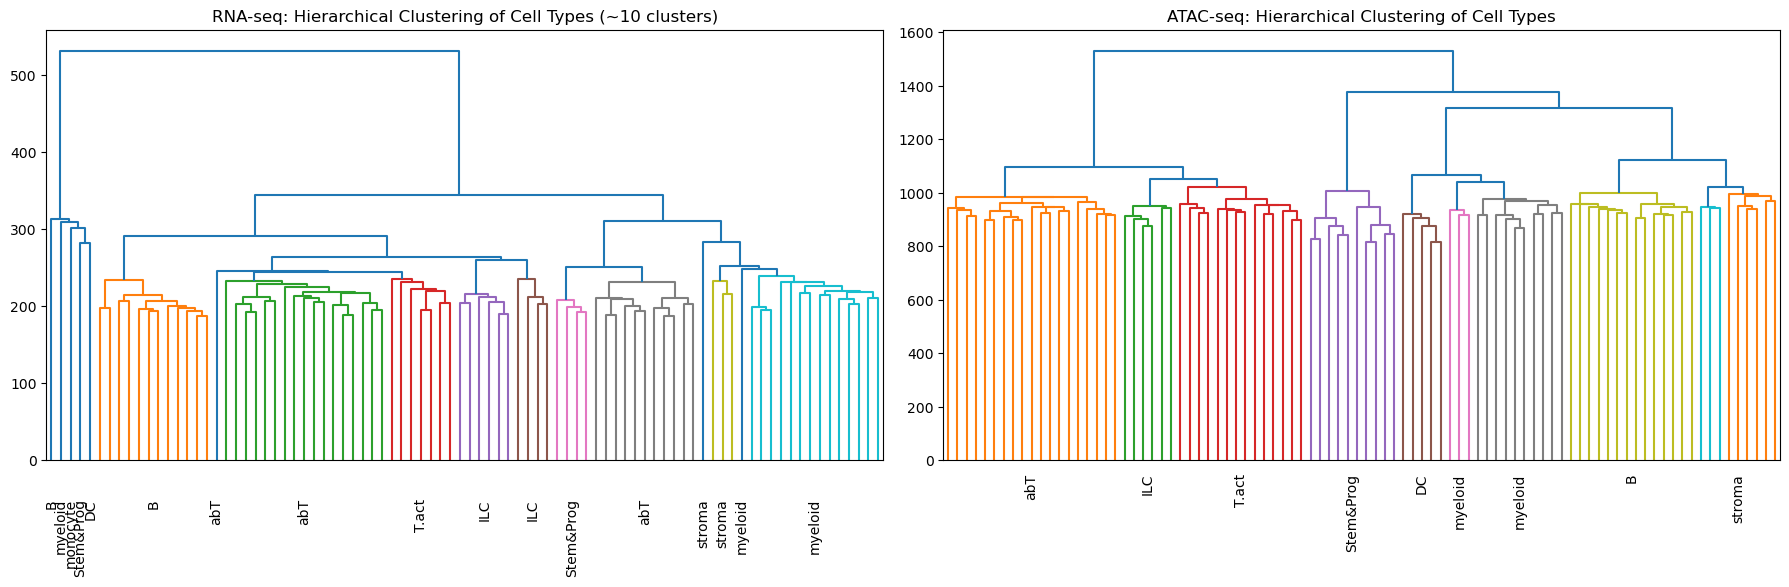

In [25]:
# prepare RNA
rna_by_celltype = RNA_normalized.T  # CellType × Gene
rna_scaled = rna_by_celltype

rna_celltypes = rna_by_celltype.index.tolist()
rna_lineages = [celltype_to_lineage.get(ct, "Unassigned") for ct in rna_celltypes]

# prepare ATAC
atac_by_celltype = ATAC_scaled_ct.drop(columns="cluster", errors='ignore').T  # CellType × Peak
atac_celltypes = atac_by_celltype.index.tolist()
atac_lineages = [celltype_to_lineage.get(ct, "Unassigned") for ct in atac_celltypes]

fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# RNA
linkage_rna = sch.linkage(pdist(rna_scaled), method="ward")
num_clusters_rna = 10
threshold_rna = linkage_rna[-num_clusters_rna + 1, 2] * 0.85

# CellType labels
dendro_rna = sch.dendrogram(linkage_rna,
                            labels=rna_celltypes,
                            leaf_rotation=90,
                            leaf_font_size=9,
                            ax=axs[0],
                            color_threshold=threshold_rna)

axs[0].set_title(f"RNA-seq: Hierarchical Clustering of Cell Types (~{num_clusters_rna} clusters)")

# connection to clusters
cluster_ids_rna = fcluster(linkage_rna, t=threshold_rna, criterion='distance')
ct_to_cluster_rna = dict(zip(rna_celltypes, cluster_ids_rna))

# new linkage
ordered_ct_rna = dendro_rna["ivl"]
xticks_rna = axs[0].get_xticks()
ct_clusters = [ct_to_cluster_rna[ct] for ct in ordered_ct_rna]
ct_lineages = [celltype_to_lineage.get(ct, "Unassigned") for ct in ordered_ct_rna]

# lineage in the middle of the cluster
cluster_pos_rna = defaultdict(list)
cluster_lin_rna = defaultdict(list)
for i, (c, l) in enumerate(zip(ct_clusters, ct_lineages)):
    cluster_pos_rna[c].append(xticks_rna[i])
    cluster_lin_rna[c].append(l)

for cluster_id in sorted(cluster_pos_rna):
    xpos = np.mean(cluster_pos_rna[cluster_id])
    lineage = Counter(cluster_lin_rna[cluster_id]).most_common(1)[0][0]
    axs[0].text(xpos, -50, lineage, ha='center', va='top', fontsize=10, rotation=90)

axs[0].set_xticklabels(["" for _ in ordered_ct_rna])


# ATAC
linkage_atac = sch.linkage(pdist(atac_by_celltype), method="ward")
num_clusters_atac = 10
threshold_atac = linkage_atac[-num_clusters_atac + 1, 2] * 1

dendro_atac = sch.dendrogram(linkage_atac,
                             labels=atac_celltypes,
                             leaf_rotation=90,
                             leaf_font_size=9,
                             ax=axs[1],
                             color_threshold=threshold_atac)

axs[1].set_title("ATAC-seq: Hierarchical Clustering of Cell Types")

# cluster
cluster_ids_atac = fcluster(linkage_atac, t=threshold_atac, criterion='distance')
ct_to_cluster_atac = dict(zip(atac_celltypes, cluster_ids_atac))

# new linkage
ordered_ct_atac = dendro_atac["ivl"]
xticks_atac = axs[1].get_xticks()
ct_clusters_atac = [ct_to_cluster_atac[ct] for ct in ordered_ct_atac]
ct_lineages_atac = [celltype_to_lineage.get(ct, "Unassigned") for ct in ordered_ct_atac]

# lineage in the middle of the cluster
cluster_pos_atac = defaultdict(list)
cluster_lin_atac = defaultdict(list)
for i, (c, l) in enumerate(zip(ct_clusters_atac, ct_lineages_atac)):
    cluster_pos_atac[c].append(xticks_atac[i])
    cluster_lin_atac[c].append(l)

for cluster_id in sorted(cluster_pos_atac):
    xpos = np.mean(cluster_pos_atac[cluster_id])
    lineage = Counter(cluster_lin_atac[cluster_id]).most_common(1)[0][0]
    axs[1].text(xpos, -50, lineage, ha='center', va='top', fontsize=10, rotation=90)

axs[1].set_xticklabels(["" for _ in ordered_ct_atac])

plt.tight_layout()
plt.savefig("figures/dendrogram_RNA_ATAC_10_clusters.png", dpi=300, bbox_inches="tight")
plt.show()

Adjusted Rand Index: 0.534
Fowlkes-Mallows Index: 0.592
Cophenetic distance correlation: r = 0.090, p = 0.0000


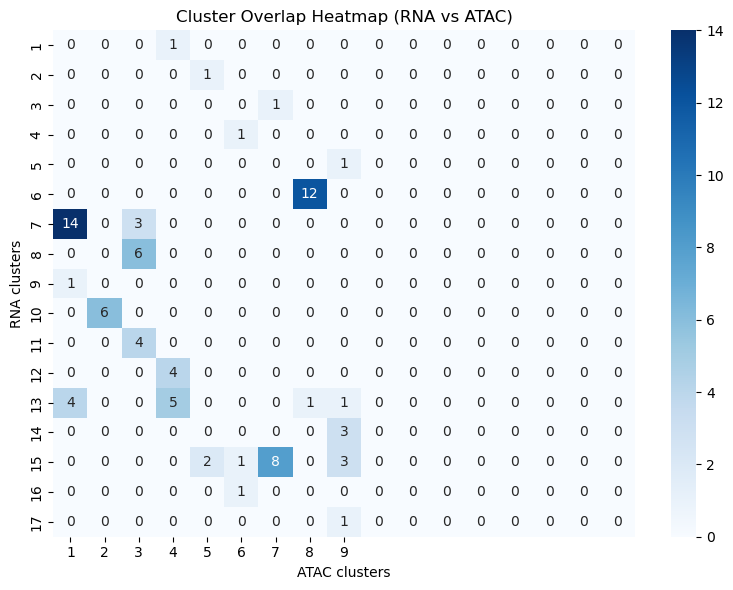

In [ ]:
# common cell types from both RNA and ATAC
common_celltypes = sorted(set(rna_celltypes) & set(atac_celltypes))

# assigning cluster IDs for common cell types
rna_cluster_labels = np.array([ct_to_cluster_rna[ct] for ct in common_celltypes])
atac_cluster_labels = np.array([ct_to_cluster_atac[ct] for ct in common_celltypes])

# Adjusted Rand Index
ari = adjusted_rand_score(rna_cluster_labels, atac_cluster_labels)
print(f"Adjusted Rand Index: {ari:.3f}")

# Fowlkes-Mallows Index
fmi = fowlkes_mallows_score(rna_cluster_labels, atac_cluster_labels)
print(f"Fowlkes-Mallows Index: {fmi:.3f}")

# Cophenetic distance correlation
coph_rna, coph_distances_rna = cophenet(linkage_rna, pdist(rna_scaled))
coph_atac, coph_distances_atac = cophenet(linkage_atac, pdist(atac_by_celltype))

# matching array lengths for correlation
min_len = min(len(coph_distances_rna), len(coph_distances_atac))
cophenetic_corr, pval = pearsonr(coph_distances_rna[:min_len], coph_distances_atac[:min_len])
print(f"Cophenetic distance correlation: r = {cophenetic_corr:.3f}, p = {pval:.4f}")

# sorted unique cluster IDs
rna_cluster_ids = sorted(set(rna_cluster_labels))
atac_cluster_ids = sorted(set(atac_cluster_labels))

# confusion matrix with fixed order
conf_mat = confusion_matrix(rna_cluster_labels, atac_cluster_labels, labels=rna_cluster_ids if rna_cluster_ids == atac_cluster_ids else None)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=atac_cluster_ids, yticklabels=rna_cluster_ids)
plt.xlabel("ATAC clusters")
plt.ylabel("RNA clusters")
plt.title("Cluster Overlap Heatmap (RNA vs ATAC)")
plt.tight_layout()
plt.savefig("figures/Cluster_Overlap_Heatmap_RNA_ATAC", dpi=300, bbox_inches='tight')
plt.show()

##  ii. Can one use correlation analysis and distance information to associate ATAC-seq regions with gene expression?

###  a) Where are associated CREs located with respect to the TSS? 

Median distance (p < 0.05): 20.32 kb
Median distance (systematic set): 22.5 kb


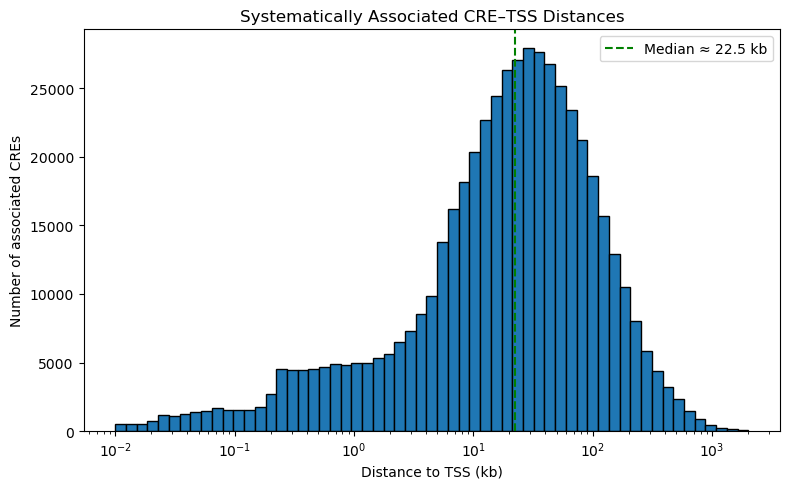

In [4]:
peaks = ATAC.copy()
peaks.columns = peaks.columns.str.strip()

# 'genes.within.100Kb' in numeric, filtering, is a boolean 
peaks['genes.within.100Kb']      = pd.to_numeric(peaks['genes.within.100Kb'],      errors='coerce')
peaks['Included.in.systematic.analysis'] = peaks['Included.in.systematic.analysis'].astype(bool)


TCSE = pd.read_csv('data/Transcript, Coding, and Exon Start and End Positions.CSV', sep=';')
tx = TCSE.copy()
tx.columns = tx.columns.str.strip()

# calculating the TSS
tx['TSS'] = np.where(
    tx['Strand'] == '+',
    tx["5' transcript Start"],
    tx["3' Transcript Start"]
)

# mapping Chromosomes to TSS positions
tss_by_chr = tx.groupby('Chromosome')['TSS'].apply(np.array).to_dict()

# helper for distance to nearest TSS
def dist_to_tss(r):
     if r['chrom'] not in tss_by_chr: return np.nan
     return np.min(np.abs(tss_by_chr[r['chrom']] - r['Summit']))/1000
peaks['distance_kb'] = peaks.apply(dist_to_tss, axis=1)

# choosing only peaks with strong association p
assoc_strict = peaks[peaks['_-log10_bestPvalue'] > 1.3].copy()

# compute median
median_strict = assoc_strict['distance_kb'].median()
print(f"Median distance (p < 0.05): {median_strict:.2f} kb")

sys = peaks[peaks['Included.in.systematic.analysis']]

# recompute median with systematic analysis subset
median_sys = sys['distance_kb'].median()
print(f"Median distance (systematic set): {median_sys:.1f} kb")


plt.figure(figsize=(8, 5))
data = sys['distance_kb'].dropna()
bins = np.logspace(-2, np.log10(data.max()), 60)
plt.hist(data, bins=bins, edgecolor='black')
plt.xscale('log')
plt.axvline(median_sys, color='green', linestyle='--',
            label=f'Median ≈ {median_sys:.1f} kb')

plt.xlabel('Distance to TSS (kb)')
plt.ylabel('Number of associated CREs')
plt.title('Systematically Associated CRE–TSS Distances')
plt.legend()
plt.tight_layout()
plt.savefig("figures/Systematically Associated CRE-TSS distance.png", dpi=300, bbox_inches="tight")
plt.show()


### b) Where are the most associated CREs located? 

Feature	Count	Percentage
Promoter  	 44149	  8.61%
Exon      	 48258	  9.41%
Intron    	214383	 41.82%
Intergenic	205805	 40.15%


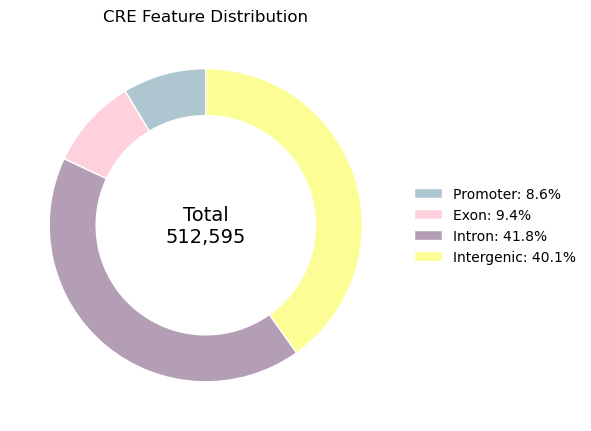

In [11]:
Bcells = pd.read_csv("data/ATAC_Bcells.csv")
peaks = Bcells.copy()  

peaks = peaks.rename(columns={"chrom": "Chromosome", "Summit": "Position"})

# ±250 bp window 
peaks["Start"]      = (peaks["Position"] - 250).astype("int64")
peaks["End"]        = (peaks["Position"] + 250).astype("int64")


peaks["Chromosome"] = peaks["Chromosome"].astype(str)
peaks["ID"]         = range(len(peaks))

# Conver to PyRanges
cre_pr = pr.PyRanges(peaks[["Chromosome", "Start", "End", "ID"]])

TCSE = pd.read_csv(
    "data/Transcript, Coding, and Exon Start and End Positions.CSV",
    sep=";", engine="python"
)
tx = TCSE.copy()

# Calculating transcript span per row
tx["tx_start"] = tx[["5' transcript Start","3' Transcript Start "]].min(axis=1).astype("int64")
tx["tx_end"]   = tx[["5' transcript Start","3' Transcript Start "]].max(axis=1).astype("int64")

transcript_df = pd.DataFrame({
    "Chromosome": tx["Chromosome"].astype(str),
    "Start":      tx["tx_start"],
    "End":        tx["tx_end"]
})

# Convert to PyRanges
tx_pr = pr.PyRanges(transcript_df)

tx["TSS"] = tx["5' transcript Start"].astype("int64")

# defining promotor  
prom_df = pd.DataFrame({
    "Chromosome": tx["Chromosome"].astype(str),
    "Start":      tx["TSS"] - 1000,
    "End":        tx["TSS"] + 1000
})
prom_df[["Start","End"]] = prom_df[["Start","End"]].astype("int64")

# Convert to PyRanges 
promoters = pr.PyRanges(prom_df)

# exon starts/ends in a row
exon_rows = []
for _, r in tx.iterrows():
    starts = [int(x) for x in r["Exon Starts "].rstrip(",").split(",")]
    ends   = [int(x) for x in r["Exon Ends"].rstrip(",").split(",")]
    for s, e in zip(starts, ends):
        exon_rows.append({
            "Chromosome": str(r["Chromosome"]),
            "Start":      int(s),
            "End":        int(e)
        })

exon_df = pd.DataFrame(exon_rows)
exon_df[["Start","End"]] = exon_df[["Start","End"]].astype("int64")

# convert in PyRanges
exons = pr.PyRanges(exon_df)

# Classify each CRE by priority: promoter > exon > intron > intergenic 
prom_ids   = set(cre_pr.join(promoters).ID)
exon_ids   = set(cre_pr.join(exons).ID) - prom_ids
tx_ids     = set(cre_pr.join(tx_pr).ID)
intron_ids = tx_ids - prom_ids - exon_ids
all_ids    = set(peaks["ID"])
inter_ids  = all_ids - prom_ids - exon_ids - intron_ids

counts = {
    "Promoter":   len(prom_ids),
    "Exon":       len(exon_ids),
    "Intron":     len(intron_ids),
    "Intergenic": len(inter_ids)
}

# table: summary
total = len(peaks)
print("Feature\tCount\tPercentage")
for feat, cnt in counts.items():
    pct = (cnt / total * 100) if total else 0
    print(f"{feat:10s}\t{cnt:6d}\t{pct:6.2f}%")

categories = ["Promoter", "Exon", "Intron", "Intergenic"]
sizes = [44149, 48258, 214383, 205805]  # number of CREs per class
total = sum(sizes)

percentages = [s / total * 100 for s in sizes]

colors = ["#AEC6CF", "#FFD1DC", "#B39EB5", "#FDFD96"]

fig, ax = plt.subplots(figsize=(6, 6))
wedges, _ = ax.pie(
    sizes,
    colors=colors,
    startangle=90,
    wedgeprops=dict(width=0.3, edgecolor='white')
)
ax.text(0, 0, f"Total\n{total:,}", ha='center', va='center', fontsize=14)

legend_labels = [
    f"{cat}: {perc:.1f}%"
    for cat, perc in zip(categories, percentages)
]
ax.legend(
    wedges,
    legend_labels,
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    frameon=False
)
ax.set_aspect('equal')
ax.set_title("CRE Feature Distribution")
plt.tight_layout()
plt.savefig("figures/CRE Feature Distribution.png", dpi=300, bbox_inches="tight")
plt.show()


### c) How many CREs are associated with genes? 

309108 / 512595 = 60.3% gene-associated CREs


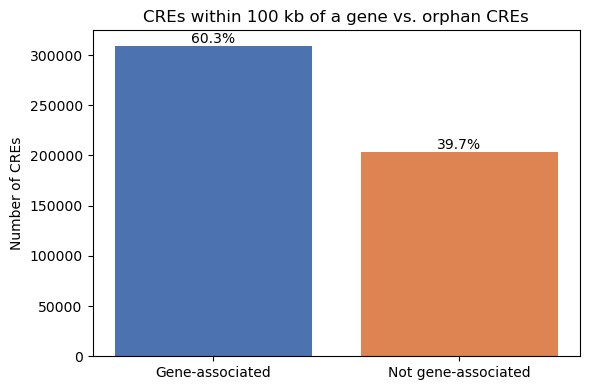

In [ ]:
Bcells = pd.read_csv("data/ATAC_Bcells.csv")
peaks_df = Bcells.copy()
peaks_df.columns = [c.strip() for c in peaks_df.columns]

# Helper to count genes per entry
def count_genes(entry):
    if pd.isna(entry) or entry == '':
        return 0
    s = str(entry)
    if ',' in s:
        return sum(1 for g in s.split(',') if g.strip())
    try:
        return int(s)
    except ValueError:
        return 0

peaks_df['gene_count'] = peaks_df['genes.within.100Kb'].apply(count_genes)

# Computing totals and percentage
total_peaks      = len(peaks_df)
associated_peaks = (peaks_df['gene_count'] > 0).sum()
pct              = associated_peaks / total_peaks * 100

print(f"{associated_peaks} / {total_peaks} = {pct:.1f}% gene-associated CREs")

total     = len(peaks_df)
associated = (peaks_df['gene_count'] > 0).sum()
not_assoc  = total - associated

labels = ['Gene-associated', 'Not gene-associated']
counts = [associated, not_assoc]


fig, ax = plt.subplots(figsize=(6,4))
bars = ax.bar(labels, counts, color=['#4c72b0', '#dd8452'])

for bar, count in zip(bars, counts):
    pct = count / total * 100
    ax.text(
        bar.get_x() + bar.get_width()/2,  
        bar.get_height(),                  
        f'{pct:.1f}%',                     
        ha='center',                       
        va='bottom'                        
    )

ax.set_ylabel('Number of CREs')
ax.set_title('CREs within 100 kb of a gene vs. orphan CREs')
plt.tight_layout()
plt.savefig("figures/CREs within 100 kb of a gene vs. orphan CREs.png", dpi=300, bbox_inches="tight")
plt.show()



### d) Is every promoter associated with a gene? 

In [14]:
TCSE = pd.read_csv("data/Transcript, Coding, and Exon Start and End Positions.CSV", sep=";", engine="python")
tx = TCSE.copy()
tx = tx.rename(columns={
    'Gene Name':         'gene_name',
    'Transcript Name':   'transcript_name',
    'Chromosome':        'chrom',
    'Strand':            'strand',
    "5' transcript Start":  'tx_start',
    "3' Transcript Start ": 'tx_end',
    'Exon Count':        'exon_count',
    'Exon Starts ':      'exon_starts',
    'Exon Ends':         'exon_ends'
})

# transcript’s exon lists: one row per exon
def parse_exons(row):
    starts = row['exon_starts'].strip(' ,').split(',')
    ends   = row['exon_ends'].strip(' ,').split(',')
    for s, e in zip(starts, ends):
        yield {
            'Chromosome': row['chrom'],
            'Start':      int(s),
            'End':        int(e),
            'gene_name':  row['gene_name']
        }

exon_records = []
for _, row in tx.iterrows():
    exon_records.extend(parse_exons(row))
exons_df = pd.DataFrame(exon_records)

# Computing TSS 
tx['tss'] = tx.apply(lambda r: r['tx_start'] if r['strand'] == '+' else r['tx_end'], axis=1)

# Defining the promotors
promoters_df = (
    pd.DataFrame({
        'Chromosome': tx['chrom'],
        'Start':      (tx['tss'] - 1000).clip(lower=0),
        'End':        tx['tss'] + 1000,
        'gene_name':  tx['gene_name']
    })
    .drop_duplicates()
)

# merging exon intervals
def merge_intervals(ints):
    """ints = list of (start,end); returns merged list."""
    ints = sorted(ints, key=lambda x: x[0])
    merged = []
    for s, e in ints:
        if not merged or s > merged[-1][1]:
            merged.append([s, e])
        else:
            merged[-1][1] = max(merged[-1][1], e)
    return merged

gene_bodies_records = []
for gene, grp in exons_df.groupby('gene_name'):
    intervals = list(zip(grp['Start'], grp['End']))
    for s, e in merge_intervals(intervals):
        gene_bodies_records.append({
            'Chromosome': grp['Chromosome'].iat[0],
            'Start':      s,
            'End':        e,
            'gene_name':  gene
        })

gene_bodies_df = pd.DataFrame(gene_bodies_records)

# Testing overlap with PyRanges
gr_prom      = pr.PyRanges(promoters_df)
gr_genebody  = pr.PyRanges(gene_bodies_df)
overlap = gr_prom.join(gr_genebody)
with_gene = set(overlap.df[['Chromosome','Start','End']]
                .itertuples(index=False, name=None))
all_prom  = set(gr_prom.df[['Chromosome','Start','End']]
                .itertuples(index=False, name=None))
orphan     = all_prom - with_gene


print(f"Total promoters:               {len(all_prom)}")
print(f"Promoters without gene overlap: {len(orphan)}")
if orphan:
    print("Examples of orphan promoters:")
    for chrom, start, end in list(orphan)[:10]:
        print(f"  {chrom}:{start}-{end}")
else:
    print("Every promoter overlaps at least one gene body.")


Total promoters:               32241
Promoters without gene overlap: 63
Examples of orphan promoters:
  chr4_JH584293_random:16590-18590
  chr10:129664754-129666754
  chr15:100187036-100189036
  chr4_JH584294_random:120788-122788
  chr5_JH584296_random:51982-53982
  chr4_GL456350_random:42162-44162
  chr7:5804445-5806445
  chr5:94585407-94587407
  chr1_GL456211_random:31867-33867
  chr2:53695870-53697870


### e) Are some promoters associated with other genes? 

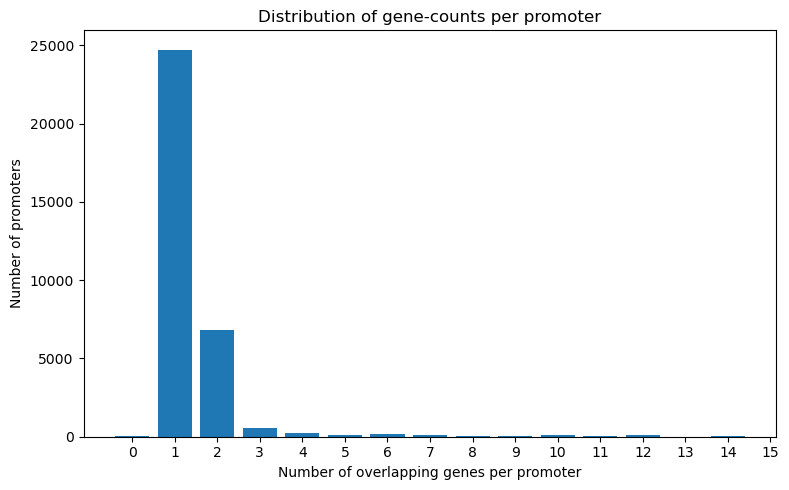

In [ ]:
TCSE = pd.read_csv(
    "data/Transcript, Coding, and Exon Start and End Positions.CSV",
    sep=";",
    engine="python"
)
tx = TCSE.copy()
tx = tx.rename(columns={
    'Gene Name':            'gene_name',
    'Transcript Name':      'transcript_name',
    'Chromosome':           'chrom',
    'Strand':               'strand',
    "5' transcript Start":  'tx_start',
    "3' Transcript Start ": 'tx_end',
    'Exon Count':           'exon_count',
    'Exon Starts ':         'exon_starts',
    'Exon Ends':            'exon_ends'
})

# transcript’s exon lists: one row per exon
def parse_exons(row):
    starts = row['exon_starts'].strip(' ,').split(',')
    ends   = row['exon_ends'].strip(' ,').split(',')
    for s, e in zip(starts, ends):
        yield {
            'Chromosome': row['chrom'],
            'Start':      int(s),
            'End':        int(e),
            'gene_name':  row['gene_name']
        }

exon_records = []
for _, row in tx.iterrows():
    exon_records.extend(parse_exons(row))
exons_df = pd.DataFrame(exon_records)

# Computing TSS
tx['tss'] = tx.apply(
    lambda r: r['tx_start'] if r['strand'] == '+' else r['tx_end'],
    axis=1
)

# Defining promotor
promoters_df = (
    pd.DataFrame({
        'Chromosome': tx['chrom'],
        'Start':      (tx['tss'] - 1000).clip(lower=0),
        'End':        tx['tss'] + 1000,
        'gene_name':  tx['gene_name']
    })
    .drop_duplicates()
)

# Merging exons per gene
def merge_intervals(ints):
    ints = sorted(ints, key=lambda x: x[0])
    merged = []
    for s, e in ints:
        if not merged or s > merged[-1][1]:
            merged.append([s, e])
        else:
            merged[-1][1] = max(merged[-1][1], e)
    return merged

gene_bodies_records = []
for gene, grp in exons_df.groupby('gene_name'):
    intervals = list(zip(grp['Start'], grp['End']))
    for s, e in merge_intervals(intervals):
        gene_bodies_records.append({
            'Chromosome': grp['Chromosome'].iat[0],
            'Start':      s,
            'End':        e,
            'gene_name':  gene
        })
gene_bodies_df = pd.DataFrame(gene_bodies_records)

# Using PyRanges to for overlaps, counting them 
promoters_df = promoters_df.reset_index().rename(columns={'index':'promoter_id'})
gr_prom      = pr.PyRanges(promoters_df)
gr_genebody  = pr.PyRanges(gene_bodies_df)
overlap = gr_prom.join(gr_genebody, suffix="_b")

ov = overlap.df[['promoter_id','gene_name_b']]
prom_counts = (
    ov
    .groupby('promoter_id')['gene_name_b']
    .nunique()
    .reset_index(name='n_genes')
)

pc_df = promoters_df.merge(prom_counts, on='promoter_id', how='left')
pc_df['n_genes'] = pc_df['n_genes'].fillna(0).astype(int)

max_g = pc_df['n_genes'].max()
bins  = range(0, max_g + 2)  # include zero, then 1…max_g

plt.figure(figsize=(8,5))
plt.hist(
    pc_df['n_genes'],
    bins=bins,
    align='left',
    rwidth=0.8
)
plt.xlabel('Number of overlapping genes per promoter')
plt.ylabel('Number of promoters')
plt.title('Distribution of gene‐counts per promoter')
plt.xticks(bins)
plt.tight_layout()
plt.savefig("figures/Distribution of gene‐counts per promoter.png", dpi=300, bbox_inches="tight")
plt.show()


### f) What is the closest associated CRE to a gene? 

Median distance: 112 bp
Fraction ≤ 20 kb: 92.09%


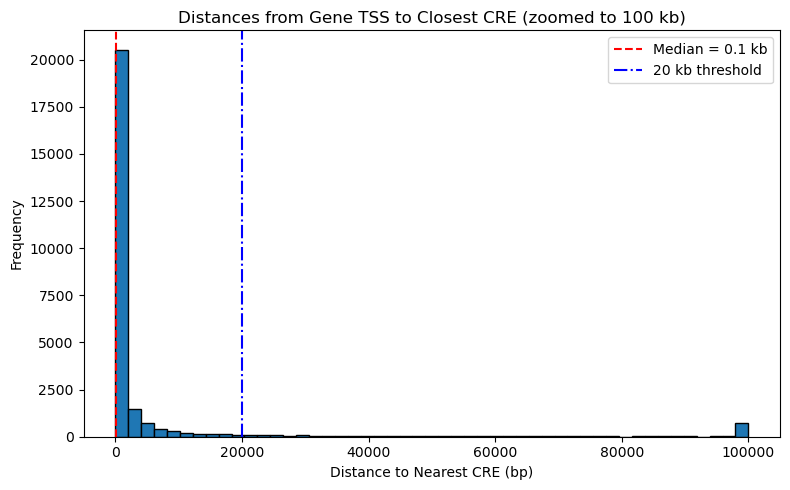

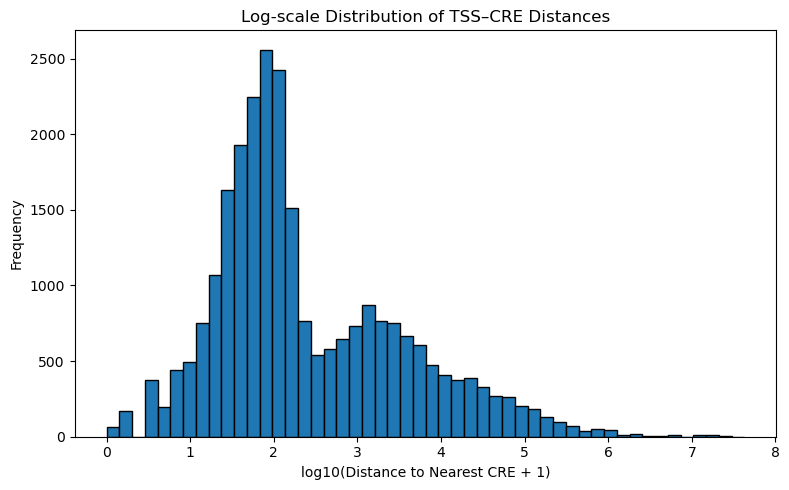

In [73]:
import pandas as pd
import numpy as np
from bisect import bisect_left

# 1. Load & preprocess the gene TSS file -------------------------------
genes = pd.read_csv(
    "data/Transcript, Coding, and Exon Start and End Positions.CSV",
    sep=";"
)

# strip whitespace from headers, rename to lowercase for convenience
genes.columns = genes.columns.str.strip().str.replace(" ", "_").str.lower()
# now we expect columns: gene_name, transcript_name, chromosome, strand,
# 5'_transcript_start, 3'_transcript_start, etc.

# compute a TSS column: plus‐strand uses 5' start, minus‐strand uses 3' start
genes["tss"] = np.where(
    genes["strand"] == "+",
    genes["5'_transcript_start"],
    genes["3'_transcript_start"]
)

# collapse to one TSS per gene (median of all transcripts)
tss = (
    genes
    .groupby("gene_name")
    .agg(chromosome = ("chromosome", "first"),
         tss         = ("tss", "median"))
    .reset_index()
)

# 2. Load & preprocess the CRE file ------------------------------------
cre = pd.read_csv(
    "data/1.ATAC-Seq data.CSV",
    sep=";",
    usecols=["ImmGenATAC1219.peakID", "chrom", "Summit"]
)

# rename for clarity
cre = cre.rename(columns={
    "ImmGenATAC1219.peakID": "cre_id",
    "chrom":               "chromosome",
    "Summit":              "center"
})
cre["center"] = cre["center"].astype(int)

# 3. Index CREs by chromosome for fast lookup --------------------------
cre_by_chr = {
    chrom: df.sort_values("center").reset_index(drop=True)
    for chrom, df in cre.groupby("chromosome")
}
centers_by_chr = {
    chrom: df["center"].tolist()
    for chrom, df in cre_by_chr.items()
}

# 4. For each gene, find the nearest CRE summit ------------------------
results = []
for _, row in tss.iterrows():
    chrom = row["chromosome"]
    pos   = int(row["tss"])
    if chrom not in centers_by_chr:
        continue

    centers = centers_by_chr[chrom]
    i = bisect_left(centers, pos)

    best = None
    best_dist = None
    for j in (i-1, i):
        if 0 <= j < len(centers):
            dist = abs(centers[j] - pos)
            if best_dist is None or dist < best_dist:
                best_dist = dist
                best = cre_by_chr[chrom].iloc[j]

    if best is not None:
        results.append({
            "gene_name":      row["gene_name"],
            "gene_chrom":     chrom,
            "gene_tss":       pos,
            "closest_cre_id": best["cre_id"],
            "cre_center":     best["center"],
            "distance_bp":    int(best_dist)
        })

# 5. Write out ----------------------------------------------------------
distances = closest['distance_bp']
median_dist = np.median(distances)
# fraction within 20kb
frac_20kb = np.mean(distances <= 20_000)

print(f"Median distance: {median_dist:.0f} bp")
print(f"Fraction ≤ 20 kb: {frac_20kb:.2%}")

# 2) Plot zoomed histogram up to 100 kb
max_plot = 100_000
bins = np.linspace(0, max_plot, 50)

plt.figure(figsize=(8,5))
plt.hist(distances.clip(0, max_plot), bins=bins, edgecolor='black')
plt.axvline(median_dist, color='red', linestyle='--',
            label=f"Median = {median_dist/1e3:.1f} kb")
plt.axvline(20_000, color='blue', linestyle='-.',
            label="20 kb threshold")
plt.xlabel('Distance to Nearest CRE (bp)')
plt.ylabel('Frequency')
plt.title('Distances from Gene TSS to Closest CRE (zoomed to 100 kb)')
plt.legend()
plt.tight_layout()
plt.show()

# 3) Optional: log‐scale version to cover the full range
plt.figure(figsize=(8,5))
plt.hist(np.log10(distances + 1), bins=50, edgecolor='black')
plt.xlabel('log10(Distance to Nearest CRE + 1)')
plt.ylabel('Frequency')
plt.title('Log‐scale Distribution of TSS–CRE Distances')
plt.tight_layout()
plt.show()


In [ ]:
## option 2, more like the yoshida paper but wont load yet 

import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# --------------------------------------------------------------------
# 1) Load expression & ATAC signal matrix
# --------------------------------------------------------------------
expr = pd.read_csv(
    "data/2.RNA-Seq data.CSV",
    sep=";",
    index_col=0,
    thousands="."
).apply(pd.to_numeric, errors="coerce")
expr.columns = expr.columns.str.strip()

atac = pd.read_csv(
    "data/ATAC_Bcells.csv",   # ← your real peaks×samples matrix
    sep=",",
    index_col=0
).apply(pd.to_numeric, errors="coerce")
atac.columns = atac.columns.str.strip()

# --------------------------------------------------------------------
# 2) Load peak coordinates (chrom + summit)
# --------------------------------------------------------------------
peaks = (
    pd.read_csv("data/1.ATAC-Seq data.CSV", sep=";", index_col=0)
      .rename(columns={"chrom":"chromosome","Summit":"center"})
      [["chromosome","center"]]
)

# --------------------------------------------------------------------
# 3) Subset to the shared samples and peaks
# --------------------------------------------------------------------
shared_samples = expr.columns.intersection(atac.columns)
print(f">>> {len(shared_samples)} shared samples")
expr = expr[shared_samples]
atac = atac[shared_samples]

common_peaks = peaks.index.intersection(atac.index)
print(f">>> {len(common_peaks)} shared peaks")
peaks = peaks.loc[common_peaks]
atac  = atac.loc[common_peaks]

# --------------------------------------------------------------------
# 4) Load gene TSS positions
# --------------------------------------------------------------------
genes = pd.read_csv(
    "data/Transcript, Coding, and Exon Start and End Positions.CSV",
    sep=";"
)
genes.columns = genes.columns.str.strip().str.lower().str.replace(" ","_")
genes["tss"] = np.where(
    genes["strand"] == "+",
    genes["5'_transcript_start"],
    genes["3'_transcript_start"]
)
tss = (
    genes.groupby("gene_name")
         .agg(chromosome=("chromosome","first"),
              tss       =("tss","median"))
)

# --------------------------------------------------------------------
# 5) Find, for each gene, the peak with max |Pearson r|
# --------------------------------------------------------------------
best_distances = []
for gene, row in tss.iterrows():
    if gene not in expr.index:
        continue

    gene_vec = expr.loc[gene].values
    same_chr = peaks["chromosome"] == row["chromosome"]
    sub_peaks = peaks[same_chr]
    sub_atac  = atac.loc[same_chr]

    best_r = 0.0
    best_center = None

    for pid, center in sub_peaks["center"].items():
        peak_vec = sub_atac.loc[pid].values
        r, _ = pearsonr(gene_vec, peak_vec)
        if np.isnan(r):
            continue
        if abs(r) > abs(best_r):
            best_r = r
            best_center = center

    if best_center is not None:
        best_distances.append(abs(best_center - row["tss"]))

print(f">>> Computed distances for {len(best_distances)} genes")

# --------------------------------------------------------------------
# 6) Plot the histogram
# --------------------------------------------------------------------
d = np.array(best_distances)
plt.figure(figsize=(8,5))
plt.hist(d.clip(0,100_000), bins=50, edgecolor="black")
plt.axvline(np.median(d), color="red", linestyle="--",
            label=f"Median = {np.median(d)/1e3:.1f} kb")
plt.axvline(20_000, color="blue", linestyle="-.", label="20 kb")
plt.xlabel("Distance to Best-Correlated CRE (bp)")
plt.ylabel("Frequency")
plt.title("Pan-cell: Distances of Best-Correlated OCRs to Gene TSS")
plt.legend()
plt.tight_layout()
plt.show()



### g) Are there CREs that control several genes? 

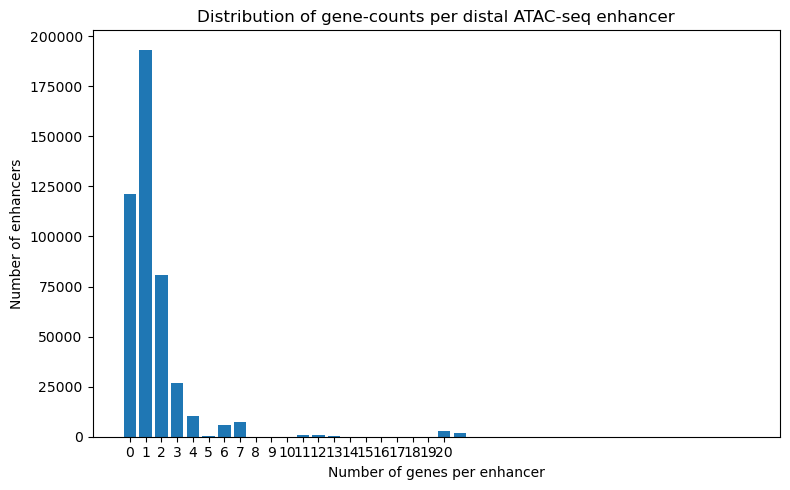

In [21]:

TCSE = pd.read_csv(
    "data/Transcript, Coding, and Exon Start and End Positions.CSV",
    sep=";", engine="python"
)
tx = TCSE.copy()
tx = tx.rename(columns={
    'Gene Name':'gene_name',
    'Chromosome':'chrom',
    'Strand':'strand',
    "5' transcript Start":'tx_start',
    "3' Transcript Start ":'tx_end',
    'Exon Starts ':'exon_starts','Exon Ends':'exon_ends'
})
tx['chrom'] = tx['chrom'].astype(str).str.replace('chr','',regex=False).str.upper()

# one row per exon
def parse_exons(r):
    starts = r.exon_starts.strip(' ,').split(',')
    ends   = r.exon_ends.strip(' ,').split(',')
    for s,e in zip(starts, ends):
        yield {
            'Chromosome': r.chrom,
            'Start':      int(s),
            'End':        int(e),
            'gene_name':  r.gene_name
        }

exons_df = pd.DataFrame([rec
    for _,r in tx.iterrows()
    for rec in parse_exons(r)
])

# Defining gene bodes as full span of gene
gene_bodies_df = (
    exons_df
      .groupby('gene_name')
      .agg(Chromosome=('Chromosome','first'),
           Start      =('Start','min'),
           End        =('End','max'))
      .reset_index()
)

# Computing TSS
tx['tss'] = tx.apply(lambda r: r.tx_start if r.strand=='+' else r.tx_end, axis=1)
promoters_df = (
    pd.DataFrame({
        'Chromosome': tx.chrom,
        'Start':      (tx.tss-1000).clip(lower=0).astype(int),
        'End':        (tx.tss+1000).astype(int),
        'gene_name':  tx.gene_name
    })
    .drop_duplicates()
    .reset_index().rename(columns={'index':'promoter_id'})
)

# Defining enhancer
peaks_df = ATAC.copy()
peaks_df = (
    peaks_df[
        ["ImmGenATAC1219.peakID", "chrom", "Summit"]
    ]
    .rename(
        columns={
            "ImmGenATAC1219.peakID": "enh_id",
            "chrom":                  "Chromosome",
            "Summit":                 "Start"
        }
    )
)
peaks_df['Chromosome'] = (
    peaks_df['Chromosome']
      .astype(str)
      .str.replace('chr','',regex=False)
      .str.upper()
)
peaks_df['Start'] = peaks_df['Start'].astype(int) - 250
peaks_df['End']   = peaks_df['Start'] + 500

for df in (gene_bodies_df, promoters_df, peaks_df):
    df['Start'] = df['Start'].astype(np.int32)
    df['End']   = df['End'].astype(np.int32)

# Defineing distal enhancers (anti-joining against promotors)

gr_peaks = pr.PyRanges(peaks_df)
gr_prom  = pr.PyRanges(promoters_df)

# find peaks overlapping promoters
hit_prom = gr_peaks.join(gr_prom).df['enh_id'].unique()
enhancers_df = peaks_df.loc[~peaks_df.enh_id.isin(hit_prom)].copy()

# Joining enhancer to gene bodies, counting genes
gr_enh = pr.PyRanges(enhancers_df)
gr_gb  = pr.PyRanges(gene_bodies_df)

ov = gr_enh.join(gr_gb, suffix="_gene").df[['enh_id','gene_name']].drop_duplicates()
enh_counts = (
    ov.groupby('enh_id')['gene_name']
      .nunique()
      .reset_index(name='n_genes')
)

enhancers_df = (
    enhancers_df[['enh_id','Chromosome','Start','End']]
      .merge(enh_counts, on='enh_id', how='left')
      .fillna({'n_genes':0})
)
enhancers_df['n_genes'] = enhancers_df['n_genes'].astype(int)

plt.figure(figsize=(8,5))
plt.hist(
    enhancers_df['n_genes'],
    bins=range(enhancers_df['n_genes'].max()+2),
    align='left', rwidth=0.8
)
plt.xlabel('Number of genes per enhancer')
plt.ylabel('Number of enhancers')
plt.title('Distribution of gene‐counts per distal ATAC‐seq enhancer')
plt.xticks(range(min(enhancers_df['n_genes'].max(),20)+1))
plt.tight_layout()
plt.savefig("figures/Distribution of gene‐counts per distal ATAC‐seq enhancer.png", dpi=300, bbox_inches="tight")
plt.show()


## iii. Can one use regression to associate CREs with gene expression?

### a) How much of the variance of gene expression can be explained for each gene with this approach?

In [32]:
#load the ATAC dataset

ATAC = pd.read_csv("data/1.ATAC-Seq data.CSV", sep=";")
ATAC.head()


,ImmGenATAC1219.peakID,chrom,Summit,mm10.60way.phastCons_scores,_-log10_bestPvalue,Included.in.systematic.analysis,TSS,genes.within.100Kb,LTHSC.34-.BM,LTHSC.34+.BM,...,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,DC.103+11b+.SI,DC.103+11b-.SI,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
0,ImmGenATAC1219.peak_1,chr1,3020786,0.00,0.56,NaN,NaN,NaN,0.41,0.71,...,0.10,0.10,43525.00,13516.00,0.52,46388.00,0.10,0.57,46447.0,14977.00
1,ImmGenATAC1219.peak_2,chr1,3087226,0.00,0.50,NaN,NaN,NaN,0.41,23377.00,...,45839.00,0.10,14977.00,0.47,0.11,0.92,0.98,42401.00,12451.0,0.94
2,ImmGenATAC1219.peak_3,chr1,3120109,0.07,45879.00,1.0,NaN,NaN,13181.00,0.10,...,0.87,0.54,26330.00,0.95,0.11,63.38,33817.00,12055.00,45748.0,0.11
3,ImmGenATAC1219.peak_4,chr1,3121485,0.15,45691.00,1.0,NaN,NaN,0.41,0.10,...,0.44,30317.00,0.66,0.11,0.92,45790.00,0.98,46753.00,45748.0,0.11
4,ImmGenATAC1219.peak_5,chr1,3372787,0.03,11324.00,NaN,NaN,NaN,0.41,0.10,...,0.44,0.10,0.66,28856.00,0.51,0.92,0.75,12055.00,22282.0,45781.00


In [33]:
ATAC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512595 entries, 0 to 512594
Data columns (total 98 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   ImmGenATAC1219.peakID            512595 non-null  object 
 1   chrom                            512595 non-null  object 
 2   Summit                           512595 non-null  int64  
 3   mm10.60way.phastCons_scores      512595 non-null  float64
 4   _-log10_bestPvalue               512595 non-null  float64
 5   Included.in.systematic.analysis  334879 non-null  float64
 6   TSS                              14292 non-null   object 
 7   genes.within.100Kb               427710 non-null  object 
 8   LTHSC.34-.BM                     512595 non-null  float64
 9   LTHSC.34+.BM                     512595 non-null  float64
 10  STHSC.150-.BM                    512595 non-null  float64
 11  MPP4.135+.BM                     512595 non-null  float64
 12  pr

In [34]:
RNA_normalized.head()

,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,B.T1.Sp,...,MF.PC,MF.Fem.PC,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
0,4.566058,4.566210,4.456681,1.706534,4.691824,4.832496,4.898847,5.262432,4.490434,6.115907,...,4.489523,4.477935,4.849119,4.612951,4.459352,4.482802,4.457568,4.454916,4.475705,1.651942
1,5.447097,5.698114,5.338784,5.531724,5.326167,5.477501,5.259388,4.872149,4.916578,4.855506,...,4.724896,4.511952,4.563658,5.206646,5.869775,5.424346,5.455817,7.515147,4.803996,4.926446
2,7.348000,7.358469,7.151921,7.411930,4.515315,7.336227,7.151699,3.672000,6.906044,6.370681,...,7.543646,7.260652,7.268498,6.970481,6.869996,4.461454,6.285406,7.255106,7.341161,7.468809
3,4.228293,5.159442,2.064098,5.268500,4.512079,7.496199,5.920636,7.529484,4.693074,5.120451,...,7.014847,7.547149,6.519537,4.673758,6.862244,6.484772,5.533361,4.953661,5.723163,4.486102
4,2.166297,5.073520,5.043812,5.401392,5.109185,5.022997,5.119101,4.823965,7.534565,7.472545,...,4.489710,4.978649,4.912451,4.523607,7.508353,0.276327,7.484608,5.347063,5.324916,6.585887


In [35]:
RNA_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17535 entries, 0 to 17534
Data columns (total 86 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LTHSC.34-.BM           17535 non-null  float64
 1   LTHSC.34+.BM           17535 non-null  float64
 2   STHSC.150-.BM          17535 non-null  float64
 3   MPP4.135+.BM           17535 non-null  float64
 4   proB.CLP.BM            17535 non-null  float64
 5   proB.FrA.BM            17535 non-null  float64
 6   proB.FrBC.BM           17535 non-null  float64
 7   B.FrE.BM               17535 non-null  float64
 8   B1b.PC                 17535 non-null  float64
 9   B.T1.Sp                17535 non-null  float64
 10  B.T2.Sp                17535 non-null  float64
 11  B.T3.Sp                17535 non-null  float64
 12  B.Sp                   17535 non-null  float64
 13  B.Fem.Sp               17535 non-null  float64
 14  B.MZ.Sp                17535 non-null  float64
 15  B.

In [36]:
# celltype coloumns
common_celltypes = RNA_normalized.columns.intersection(ATAC.columns)

# prep ATAC
atac_means = ATAC[common_celltypes].mean().reset_index()
atac_means.columns = ['CellType', 'ATAC_mean']

# prep RNA
rna_means = RNA_normalized[common_celltypes].mean().reset_index()
rna_means.columns = ['CellType', 'RNA_mean']

combined = pd.merge(atac_means, rna_means, on='CellType')


Regression over all celltypes: statsmodels and sklearn

In [153]:
import statsmodels.api as sm 
X = sm.add_constant(combined['ATAC_mean']) 
y = combined['RNA_mean']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               RNA_mean   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.7637
Date:                Sun, 06 Jul 2025   Prob (F-statistic):              0.385
Time:                        14:53:34   Log-Likelihood:                 44.034
No. Observations:                  85   AIC:                            -84.07
Df Residuals:                      83   BIC:                            -79.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4095      0.113     47.804      0.0

In [154]:
X = combined['ATAC_mean'].values.reshape(-1, 1)
y = combined['RNA_mean'].values

model = LinearRegression()
model.fit(X, y)

r2 = r2_score(y, model.predict(X))
print(f"R²: {r2:.3f}")


R²: 0.009


regression per celltype

In [39]:
# group ATAC peaks per gens
atac_genes = ATAC.dropna(subset=['genes.within.100Kb']).copy()

atac_genes['Gene'] = atac_genes['genes.within.100Kb'].str.split(',')
atac_genes = atac_genes.explode('Gene')

atac_genes['Gene'] = atac_genes['Gene'].str.upper().str.strip()


In [40]:
atac_genes.head()

,ImmGenATAC1219.peakID,chrom,Summit,mm10.60way.phastCons_scores,_-log10_bestPvalue,Included.in.systematic.analysis,TSS,genes.within.100Kb,LTHSC.34-.BM,LTHSC.34+.BM,...,DC.8+.Sp,DC.pDC.Sp,DC.103+11b+.SI,DC.103+11b-.SI,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th,Gene
16,ImmGenATAC1219.peak_17,chr1,3600878,0.09,0.36,NaN,NaN,Xkr4,0.41,0.71,...,0.10,0.59,0.53,14246.00,45658.0,18994.00,0.52,44927.0,45717.00,XKR4
17,ImmGenATAC1219.peak_18,chr1,3611363,0.16,11749.00,1.0,NaN,Xkr4,0.41,0.10,...,0.54,0.23,0.11,0.52,47239.0,0.75,45992.00,16862.0,13.24,XKR4
18,ImmGenATAC1219.peak_19,chr1,3670859,0.76,27030.00,1.0,NaN,Xkr4,0.41,20852.00,...,27395.00,32174.00,0.53,0.11,17930.0,17958.00,44228.00,45720.0,22402.00,XKR4
19,ImmGenATAC1219.peak_20,chr1,3671114,0.94,45690.00,1.0,NaN,Xkr4,0.41,45844.00,...,45963.00,32509.00,14246.00,0.11,35521.0,2.00,26359.00,47150.0,45992.00,XKR4
20,ImmGenATAC1219.peak_21,chr1,3671437,0.72,45690.00,1.0,Xkr4,Xkr4,0.41,24898.00,...,0.10,0.11,31778.00,0.92,35521.0,22678.00,23408.00,30348.0,17.14,XKR4


In [41]:
atac_genes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1511829 entries, 16 to 512594
Data columns (total 99 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   ImmGenATAC1219.peakID            1511829 non-null  object 
 1   chrom                            1511829 non-null  object 
 2   Summit                           1511829 non-null  int64  
 3   mm10.60way.phastCons_scores      1511829 non-null  float64
 4   _-log10_bestPvalue               1511829 non-null  float64
 5   Included.in.systematic.analysis  1057704 non-null  float64
 6   TSS                              78405 non-null    object 
 7   genes.within.100Kb               1511829 non-null  object 
 8   LTHSC.34-.BM                     1511829 non-null  float64
 9   LTHSC.34+.BM                     1511829 non-null  float64
 10  STHSC.150-.BM                    1511829 non-null  float64
 11  MPP4.135+.BM                     1511829 non-null  floa

In [42]:
# mean ATAC peak per gene

ATAC_reg = atac_genes.groupby('Gene')[common_celltypes].mean()
ATAC_reg.head()

,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,B.T1.Sp,...,MF.PC,MF.Fem.PC,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
Gene,,,,,,,,,,,,,,,,,,,,,
0610005C13RIK,7582.118958,13444.338542,16676.248229,13136.175000,16543.082500,18684.885625,19950.962604,24212.743229,16774.334583,19109.247813,...,19132.415104,22026.079062,20823.219688,16265.482500,16358.311042,18581.400000,17801.321875,18256.702292,19411.826146,20763.813438
0610007P14RIK,5663.187609,11372.126522,13942.612391,11375.388478,11489.378478,14811.509348,18442.223478,14534.735435,17633.056087,17757.893696,...,15682.634130,22092.909565,13900.694130,13845.451522,19246.704348,13752.082391,14936.983043,12681.084783,12851.089348,12767.774783
0610009B22RIK,5429.216986,15361.065890,14648.617945,16991.953699,16871.772192,16894.832192,18141.010137,16157.725616,16823.230548,18985.048493,...,18987.004521,21906.963973,17596.764384,18971.392192,18966.480274,20290.227397,15585.316438,15893.393836,17893.985890,17795.860822
0610009L18RIK,6624.227978,18129.787416,14829.637978,16676.543371,18607.434045,17636.482022,20049.521798,21275.034831,16747.282921,21061.533708,...,22262.387528,22759.496966,22608.896742,19905.713371,21574.827640,16740.920787,21200.608652,17430.787865,18968.434270,16940.917416
0610009O20RIK,7045.009140,15934.586989,13911.758925,16450.166237,18663.273548,19825.165269,20092.491075,18851.673548,16173.282903,16852.479892,...,21468.863871,20175.687742,23837.746129,16623.817097,21006.340430,19036.212473,19498.764946,15255.246022,21431.165914,19487.050753


In [43]:
ATAC_reg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23873 entries, 0610005C13RIK to ZZZ3
Data columns (total 85 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LTHSC.34-.BM           23873 non-null  float64
 1   LTHSC.34+.BM           23873 non-null  float64
 2   STHSC.150-.BM          23873 non-null  float64
 3   MPP4.135+.BM           23873 non-null  float64
 4   proB.CLP.BM            23873 non-null  float64
 5   proB.FrA.BM            23873 non-null  float64
 6   proB.FrBC.BM           23873 non-null  float64
 7   B.FrE.BM               23873 non-null  float64
 8   B1b.PC                 23873 non-null  float64
 9   B.T1.Sp                23873 non-null  float64
 10  B.T2.Sp                23873 non-null  float64
 11  B.T3.Sp                23873 non-null  float64
 12  B.Sp                   23873 non-null  float64
 13  B.Fem.Sp               23873 non-null  float64
 14  B.MZ.Sp                23873 non-null  float64
 

In [44]:
RNA_reg = RNA.copy()
RNA_reg[obj_cols] = RNA_reg[obj_cols].apply(lambda col: col.str.replace('.', '', regex=False).astype(float))
RNA_reg.rename(columns={'Unnamed: 0': 'Gene'}, inplace=True)
RNA_reg.set_index('Gene', inplace=True)
RNA_reg.head()

,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,B.T1.Sp,...,MF.PC,MF.Fem.PC,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
Gene,,,,,,,,,,,,,,,,,,,,,
0610005C13Rik,1.096732e+09,1.096732e+09,1.021750e+09,1.021812e+08,1.205236e+09,1.326780e+09,1.392996e+09,1.821243e+09,1.025543e+09,3.383058e+09,...,1.025785e+09,1.025785e+09,1.251082e+09,1.147249e+09,1.024462e+09,1.019656e+09,1.017884e+09,1.019107e+09,1.017884e+09,1.024720e+08
0610007P14Rik,2.060540e+09,2.461053e+09,1.924246e+09,2.042984e+09,1.897592e+09,2.101952e+09,1.802194e+09,1.378025e+09,1.394367e+09,1.383350e+09,...,1.216034e+09,1.051409e+09,1.018415e+09,1.756207e+09,2.804070e+09,2.002280e+09,2.081718e+09,8.857859e+09,1.290219e+09,1.406558e+09
0610009B22Rik,7.827206e+09,7.883703e+09,6.884475e+09,7.641817e+09,1.060856e+09,7.750282e+09,6.821309e+09,5.722443e+08,5.678749e+09,4.046051e+09,...,8.869143e+09,7.342366e+09,6.888127e+09,6.081191e+09,5.657802e+09,1.003978e+09,3.737308e+09,7.388847e+09,7.719183e+09,8.424582e+09
0610009L18Rik,8.577159e+08,1.679139e+09,1.551155e+08,1.694735e+09,1.058370e+09,8.664784e+09,2.878172e+09,8.952120e+09,1.187398e+09,1.672197e+09,...,6.132818e+09,8.965889e+09,4.080445e+09,1.198741e+09,5.627219e+09,4.227673e+09,2.199352e+09,1.460090e+09,2.482516e+09,1.023995e+09
0610009O20Rik,1.686459e+08,1.579260e+09,1.559416e+09,1.862615e+09,1.625846e+09,1.520880e+09,1.630723e+09,1.331161e+09,8.805298e+09,8.740848e+09,...,1.025924e+09,1.471393e+09,1.309244e+09,1.075421e+09,8.833833e+09,1.007792e+07,8.644241e+09,1.933072e+09,1.872127e+09,4.546489e+09


In [45]:
RNA_reg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17535 entries, 0610005C13Rik to l7Rn6
Data columns (total 86 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LTHSC.34-.BM           17535 non-null  float64
 1   LTHSC.34+.BM           17535 non-null  float64
 2   STHSC.150-.BM          17535 non-null  float64
 3   MPP4.135+.BM           17535 non-null  float64
 4   proB.CLP.BM            17535 non-null  float64
 5   proB.FrA.BM            17535 non-null  float64
 6   proB.FrBC.BM           17535 non-null  float64
 7   B.FrE.BM               17535 non-null  float64
 8   B1b.PC                 17535 non-null  float64
 9   B.T1.Sp                17535 non-null  float64
 10  B.T2.Sp                17535 non-null  float64
 11  B.T3.Sp                17535 non-null  float64
 12  B.Sp                   17535 non-null  float64
 13  B.Fem.Sp               17535 non-null  float64
 14  B.MZ.Sp                17535 non-null  float64


In [46]:
print("RNA:", RNA_reg.index[:5].tolist())
print("ATAC:", ATAC_reg.index[:5].tolist())



RNA: ['0610005C13Rik', '0610007P14Rik', '0610009B22Rik', '0610009L18Rik', '0610009O20Rik']
ATAC: ['0610005C13RIK', '0610007P14RIK', '0610009B22RIK', '0610009L18RIK', '0610009O20RIK']


In [47]:
shared_genes = RNA_reg.index.intersection(ATAC_reg.index)
print(f"{len(shared_genes)} shared genes.")


173 shared genes.


In [155]:
r2_per_gene = {}

for gene in shared_genes:
    x_vals = ATAC_reg.loc[gene, common_celltypes].values
    y_vals = RNA_reg.loc[gene, common_celltypes].values

    if np.isnan(x_vals).any() or np.isnan(y_vals).any():
        continue

    model = LinearRegression()
    model.fit(x_vals.reshape(-1, 1), y_vals)
    r2 = r2_score(y_vals, model.predict(x_vals.reshape(-1, 1)))
    r2_per_gene[gene] = r2


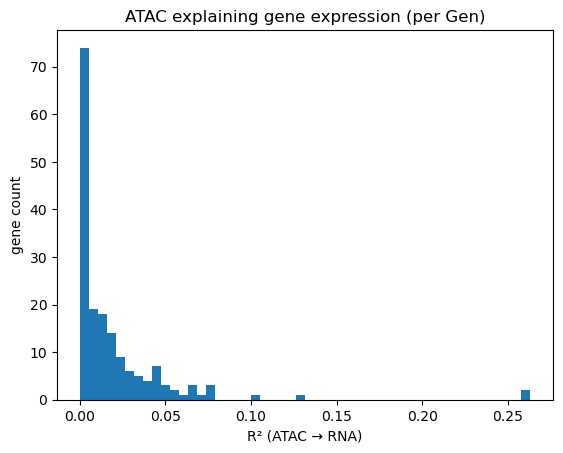

In [156]:
plt.hist(r2_per_gene.values(), bins=50)
plt.xlabel("R² (ATAC → RNA)")
plt.ylabel("gene count")
plt.title("ATAC explaining gene expression (per Gen)")
plt.savefig("figures/Histogram_regression_all_celltypes", dpi=300, bbox_inches='tight')
plt.show()


Most genes have R² ≈ 0
-> ATAC data explains almost none of their expression levels across cell types

some genes gave R² > 0.05
-> moderate correlation between ATAC signal and RNA expression.

few R² > 0.1
-> chromatin accessibility seems to have a stronger predictive value

### b) How do the coefficients differ when it is performed on your cell lineage alone?

In [50]:
RNA_Bcells_reg = RNA_reg.iloc[:, :22]
RNA_Bcells_reg.head()

,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,B.T1.Sp,...,B.Sp,B.Fem.Sp,B.MZ.Sp,B.Fo.Sp,B.mem.Sp,B.GC.CB.Sp,B.GC.CC.Sp,B.PB.Sp,B.PC.Sp,B.PC.BM
Gene,,,,,,,,,,,,,,,,,,,,,
0610005C13Rik,1.096732e+09,1.096732e+09,1.021750e+09,1.021812e+08,1.205236e+09,1.326780e+09,1.392996e+09,1.821243e+09,1.025543e+09,3.383058e+09,...,1.024819e+09,1.026268e+09,1.583160e+08,2.031568e+09,1.023171e+09,1.402182e+09,1.600163e+09,1.024314e+09,1.026847e+08,1.022363e+09
0610007P14Rik,2.060540e+09,2.461053e+09,1.924246e+09,2.042984e+09,1.897592e+09,2.101952e+09,1.802194e+09,1.378025e+09,1.394367e+09,1.383350e+09,...,1.716164e+09,1.600866e+09,1.955181e+09,1.772962e+09,1.336412e+09,1.597273e+09,2.087017e+09,1.700951e+09,1.685336e+09,2.597576e+09
0610009B22Rik,7.827206e+09,7.883703e+09,6.884475e+09,7.641817e+09,1.060856e+09,7.750282e+09,6.821309e+09,5.722443e+08,5.678749e+09,4.046051e+09,...,4.111211e+09,3.555379e+09,4.965223e+09,3.440006e+09,2.355237e+09,6.277780e+09,3.567404e+08,7.266522e+09,1.058590e+09,5.673231e+09
0610009L18Rik,8.577159e+08,1.679139e+09,1.551155e+08,1.694735e+09,1.058370e+09,8.664784e+09,2.878172e+09,8.952120e+09,1.187398e+09,1.672197e+09,...,1.262049e+09,9.932675e+09,1.772576e+09,1.486780e+09,1.288333e+09,1.258652e+09,1.049192e+09,1.823690e+09,3.481406e+09,3.253803e+09
0610009O20Rik,1.686459e+08,1.579260e+09,1.559416e+09,1.862615e+09,1.625846e+09,1.520880e+09,1.630723e+09,1.331161e+09,8.805298e+09,8.740848e+09,...,1.189818e+09,9.724672e+09,1.261602e+09,9.847901e+09,1.032534e+09,9.527705e+09,1.034411e+09,9.217649e+09,1.173169e+09,6.144418e+09


In [51]:
RNA_Bcells_reg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17535 entries, 0610005C13Rik to l7Rn6
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LTHSC.34-.BM   17535 non-null  float64
 1   LTHSC.34+.BM   17535 non-null  float64
 2   STHSC.150-.BM  17535 non-null  float64
 3   MPP4.135+.BM   17535 non-null  float64
 4   proB.CLP.BM    17535 non-null  float64
 5   proB.FrA.BM    17535 non-null  float64
 6   proB.FrBC.BM   17535 non-null  float64
 7   B.FrE.BM       17535 non-null  float64
 8   B1b.PC         17535 non-null  float64
 9   B.T1.Sp        17535 non-null  float64
 10  B.T2.Sp        17535 non-null  float64
 11  B.T3.Sp        17535 non-null  float64
 12  B.Sp           17535 non-null  float64
 13  B.Fem.Sp       17535 non-null  float64
 14  B.MZ.Sp        17535 non-null  float64
 15  B.Fo.Sp        17535 non-null  float64
 16  B.mem.Sp       17535 non-null  float64
 17  B.GC.CB.Sp     17535 non-null  float64
 18 

In [52]:
ATAC_Bcells_reg = ATAC_reg.iloc[:, :22]
ATAC_Bcells_reg.head()

,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,B.T1.Sp,...,B.Sp,B.Fem.Sp,B.MZ.Sp,B.Fo.Sp,B.mem.Sp,B.GC.CB.Sp,B.GC.CC.Sp,B.PB.Sp,B.PC.Sp,B.PC.BM
Gene,,,,,,,,,,,,,,,,,,,,,
0610005C13RIK,7582.118958,13444.338542,16676.248229,13136.175000,16543.082500,18684.885625,19950.962604,24212.743229,16774.334583,19109.247813,...,23372.873333,22444.829479,23700.658854,22376.373125,17288.464479,20204.028021,16953.070625,15964.500000,18870.935833,20732.708125
0610007P14RIK,5663.187609,11372.126522,13942.612391,11375.388478,11489.378478,14811.509348,18442.223478,14534.735435,17633.056087,17757.893696,...,24529.115000,23980.503696,17779.813696,23430.040652,21238.883913,22487.122174,17825.783696,22342.459565,20251.474783,20769.206739
0610009B22RIK,5429.216986,15361.065890,14648.617945,16991.953699,16871.772192,16894.832192,18141.010137,16157.725616,16823.230548,18985.048493,...,19530.388493,21472.630000,24738.883288,18723.497534,19206.245068,23910.852329,20569.606712,21890.689589,19512.566027,23899.430411
0610009L18RIK,6624.227978,18129.787416,14829.637978,16676.543371,18607.434045,17636.482022,20049.521798,21275.034831,16747.282921,21061.533708,...,24144.219438,25509.633258,24414.982809,23845.919101,20246.081910,20331.991573,16454.872697,20242.547865,23708.665393,24497.566517
0610009O20RIK,7045.009140,15934.586989,13911.758925,16450.166237,18663.273548,19825.165269,20092.491075,18851.673548,16173.282903,16852.479892,...,23459.192581,24788.210753,24351.983656,27370.966344,20995.401935,22506.951075,16968.809140,21981.401935,22894.020108,26171.513871


In [53]:
ATAC_Bcells_reg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23873 entries, 0610005C13RIK to ZZZ3
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LTHSC.34-.BM   23873 non-null  float64
 1   LTHSC.34+.BM   23873 non-null  float64
 2   STHSC.150-.BM  23873 non-null  float64
 3   MPP4.135+.BM   23873 non-null  float64
 4   proB.CLP.BM    23873 non-null  float64
 5   proB.FrA.BM    23873 non-null  float64
 6   proB.FrBC.BM   23873 non-null  float64
 7   B.FrE.BM       23873 non-null  float64
 8   B1b.PC         23873 non-null  float64
 9   B.T1.Sp        23873 non-null  float64
 10  B.T2.Sp        23873 non-null  float64
 11  B.T3.Sp        23873 non-null  float64
 12  B.Sp           23873 non-null  float64
 13  B.Fem.Sp       23873 non-null  float64
 14  B.MZ.Sp        23873 non-null  float64
 15  B.Fo.Sp        23873 non-null  float64
 16  B.mem.Sp       23873 non-null  float64
 17  B.GC.CB.Sp     23873 non-null  float64
 18  

In [54]:
shared_genes = RNA_Bcells_reg.index.intersection(ATAC_Bcells_reg.index)
print(f"{len(shared_genes)} shared genes.")

173 shared genes.


In [55]:
#celltypes 
common_celltypes_Bcells = RNA_Bcells_reg.columns.intersection(ATAC_Bcells_reg.columns)

In [56]:
r2_per_gene_Bcells = {}

for gene in shared_genes:
    x_vals = ATAC_Bcells_reg.loc[gene, common_celltypes_Bcells].values
    y_vals = RNA_Bcells_reg.loc[gene, common_celltypes_Bcells].values

    if np.isnan(x_vals).any() or np.isnan(y_vals).any():
        continue

    model = LinearRegression()
    model.fit(x_vals.reshape(-1, 1), y_vals)
    r2 = r2_score(y_vals, model.predict(x_vals.reshape(-1, 1)))
    r2_per_gene_Bcells[gene] = r2

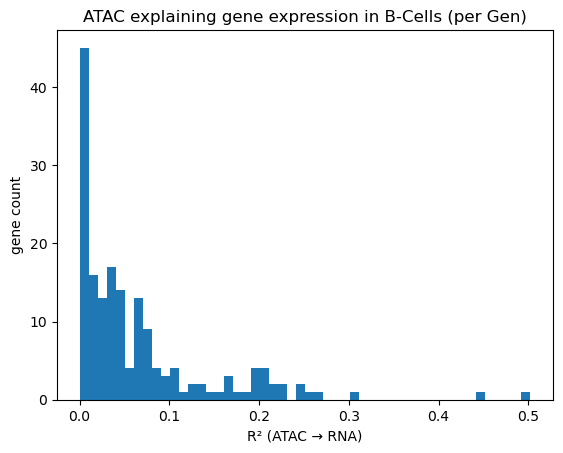

In [57]:
plt.hist(r2_per_gene_Bcells.values(), bins=50)
plt.xlabel("R² (ATAC → RNA)")
plt.ylabel("gene count")
plt.title("ATAC explaining gene expression in B-Cells (per Gen)")
plt.savefig("figures/Histogram_regression_Bcells", dpi=300, bbox_inches='tight')
plt.show()


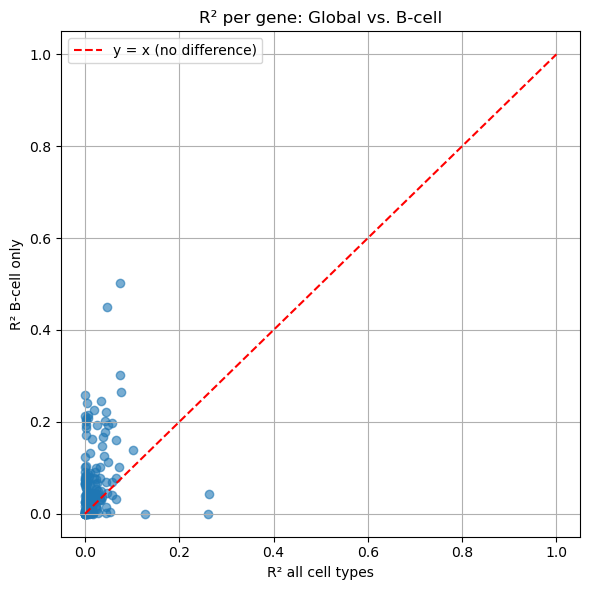

In [58]:
#compare coefficients 
shared_genes_all = set(r2_per_gene_Bcells).intersection(set(r2_per_gene))

x = [r2_per_gene[gene] for gene in shared_genes_all]
y = [r2_per_gene_Bcells[gene] for gene in shared_genes_all]

plt.figure(figsize=(6,6))
plt.scatter(x, y, alpha=0.6)
plt.plot([0, 1], [0, 1], 'r--', label='y = x (no difference)')
plt.xlabel("R² all cell types")
plt.ylabel("R² B-cell only")
plt.title("R² per gene: Global vs. B-cell")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("figures/R^2_per_gene", dpi=300, bbox_inches='tight')
plt.show()

In [59]:
delta_r2 = np.array(y) - np.array(x)
print(f"Mean ΔR² (B-cell - Global): {np.mean(delta_r2):.4f}")

Mean ΔR² (B-cell - Global): 0.0453


mean ΔR²: 0.0453
-> chromatin accessibility in B-cells explains gene expression better than the global model across all cell types
-> gene regulation via chromatin structure is (partly) B-cell-specific
-> lineage-restricted regulatory mechanisms

### c) Which CREs control your cell lineage specific genes?

In [60]:
#B-Cell specific genes -> with high delta R^2 

delta_r2 = {gene: r2_per_gene_Bcells[gene] - r2_per_gene[gene]for gene in r2_per_gene_Bcells if gene in r2_per_gene}
bcell_specific_genes = [gene for gene, delta in delta_r2.items() if delta > 0.1]

print(f"{len(bcell_specific_genes)} B-cell-specific genes with ΔR² > 0.1")


29 B-cell-specific genes with ΔR² > 0.1


In [61]:
atac_cre_activity = ATAC_Bcells_reg.loc[bcell_specific_genes]
atac_cre_activity.head()


,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,B.T1.Sp,...,B.Sp,B.Fem.Sp,B.MZ.Sp,B.Fo.Sp,B.mem.Sp,B.GC.CB.Sp,B.GC.CC.Sp,B.PB.Sp,B.PC.Sp,B.PC.BM
Gene,,,,,,,,,,,,,,,,,,,,,
A630020A06,7241.875660,7782.572453,13951.524151,11962.257736,14841.971321,13214.693585,13791.350189,17078.172642,13300.169245,15034.111509,...,17422.028868,16948.656415,20246.026792,14651.887358,21063.228868,17064.116792,15948.924717,16993.638868,13134.194528,14655.362453
AI413582,11191.531650,19647.195825,19449.024466,21523.330583,21278.287476,21187.615243,21122.271942,20824.612524,18935.998350,24444.800388,...,25162.166796,27721.716408,23829.548932,23912.690000,19365.966214,22852.659029,18641.147573,17081.673883,20524.094757,21574.386019
AI414108,5999.938095,12958.669286,7620.460476,14048.577143,11155.678333,13352.891190,8956.561190,15197.188333,18657.813095,17119.782143,...,19820.217143,22435.630476,24431.429762,29019.122857,11785.922857,13220.088333,14289.886429,20434.896429,26785.320238,25729.833095
AI427809,4696.523140,12728.661047,11906.688372,15503.887674,18677.784767,14462.895349,16387.589070,18814.664302,14209.959419,19619.165349,...,22358.364767,20810.989302,22108.873372,21375.574535,17852.360000,19504.568837,17862.682093,17902.279186,20247.603488,19577.419070
AI450353,4824.478780,11870.347805,9102.118049,9414.451220,15558.137561,18787.896098,14866.683902,16268.036098,15192.963659,17740.767317,...,19122.262439,15254.487561,16374.684390,18168.943659,15530.765366,15157.083902,15460.120000,17479.017317,13125.034878,21506.720244


In [62]:
mean_atac_per_gene = atac_cre_activity.mean(axis=1)
mean_atac_per_gene.info()

<class 'pandas.core.series.Series'>
Index: 29 entries, A630020A06 to LOC105242399
Series name: None
Non-Null Count  Dtype  
--------------  -----  
29 non-null     float64
dtypes: float64(1)
memory usage: 464.0+ bytes


In [63]:
top_CREs_BCells = mean_atac_per_gene.sort_values(ascending=False).head(10)
print(top_CREs_BCells)

Gene
H19            22428.460646
AI413582       21255.428906
H13            21173.380569
AI661453       20434.469473
H2-T24         19786.835019
AI837181       19708.573825
D17H6S56E-5    19672.325037
BC031181       19360.097510
AU022252       18892.500493
BC094916       18800.470341
dtype: float64


In [64]:
all_CREs_BCells = mean_atac_per_gene.sort_values(ascending=False)
print(all_CREs_BCells)

Gene
H19             22428.460646
AI413582        21255.428906
H13             21173.380569
AI661453        20434.469473
H2-T24          19786.835019
AI837181        19708.573825
D17H6S56E-5     19672.325037
BC031181        19360.097510
AU022252        18892.500493
BC094916        18800.470341
F5              18794.825024
BC030499        18727.430723
BC068281        18617.339893
BC005624        18602.139287
BC037704        18555.021062
BC049762        18082.425658
H2-Q1           18070.541549
BC021767        17664.694886
AI427809        17567.665624
BC018473        17150.749098
AI414108        16766.836472
BC048546        16596.932019
H2-M9           16444.750057
AW146154        16172.080303
AU041133        15398.163545
AI450353        15128.829379
A630020A06      14993.508482
AI662270        14988.044523
LOC105242399     2576.490000
dtype: float64


In [65]:
ATAC_Bcells = pd.read_csv("data/ATAC_Bcells.csv")
ATAC_Bcells.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512595 entries, 0 to 512594
Data columns (total 31 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   ImmGenATAC1219.peakID            512595 non-null  object 
 1   chrom                            512595 non-null  object 
 2   Summit                           512595 non-null  int64  
 3   mm10.60way.phastCons_scores      512595 non-null  float64
 4   _-log10_bestPvalue               512595 non-null  float64
 5   Included.in.systematic.analysis  334879 non-null  float64
 6   TSS                              14292 non-null   object 
 7   genes.within.100Kb               427710 non-null  object 
 8   LTHSC.34-.BM                     512595 non-null  float64
 9   LTHSC.34+.BM                     512595 non-null  float64
 10  STHSC.150-.BM                    512595 non-null  float64
 11  MPP4.135+.BM                     512595 non-null  float64
 12  pr

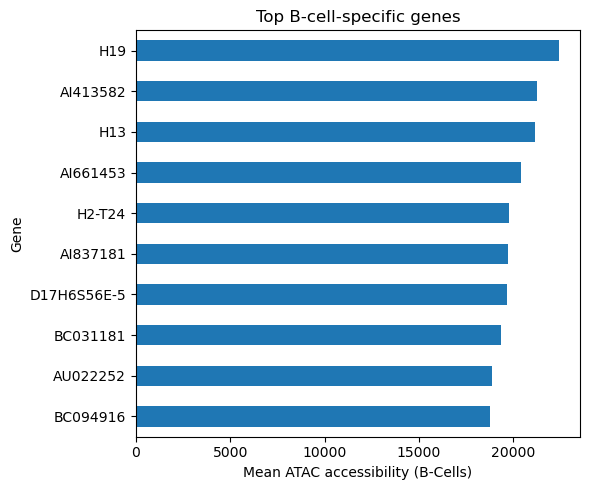

In [66]:
#only for top Genes
top_CREs_BCells.plot(kind='barh', figsize=(6,5))
plt.xlabel("Mean ATAC accessibility (B-Cells)")
plt.ylabel("Gene")
plt.title("Top B-cell-specific genes")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("figures/ATAC_signal_top_CREs_Bcells", dpi=300, bbox_inches='tight')
plt.show()

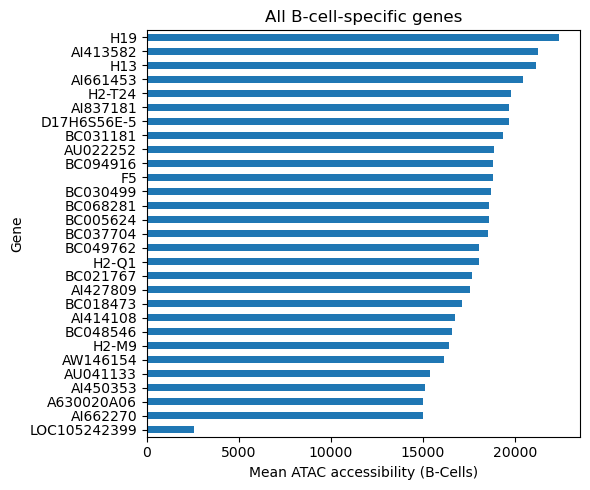

In [67]:
# for all B-Cell-Genes
all_CREs_BCells.plot(kind='barh', figsize=(6,5))
plt.xlabel("Mean ATAC accessibility (B-Cells)")
plt.ylabel("Gene")
plt.title("All B-cell-specific genes")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("figures/ATAC_signal_all_CREs_Bcells", dpi=300, bbox_inches='tight')
plt.show()

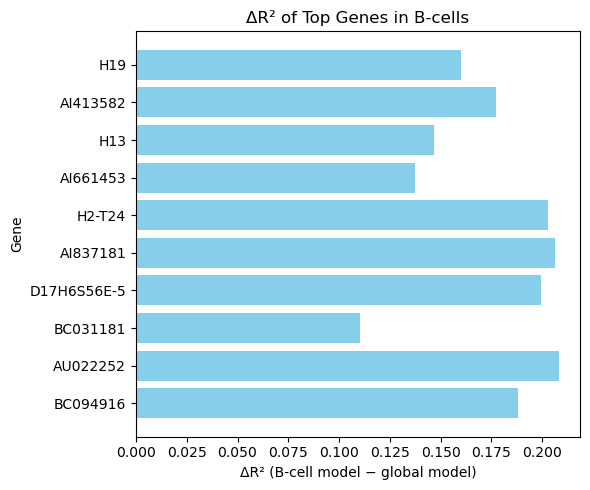

In [68]:
top_cre_genes = top_CREs_BCells.index.tolist()
delta_r2_top_cre = [delta_r2[gene] for gene in top_cre_genes]

plt.figure(figsize=(6, 5))
plt.barh(top_cre_genes, delta_r2_top_cre, color="skyblue")
plt.xlabel("ΔR² (B-cell model − global model)")
plt.ylabel("Gene")
plt.title("ΔR² of Top Genes in B-cells")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("figures/deltaR^2_top_CREs_Bcells", dpi=300, bbox_inches='tight')
plt.show()

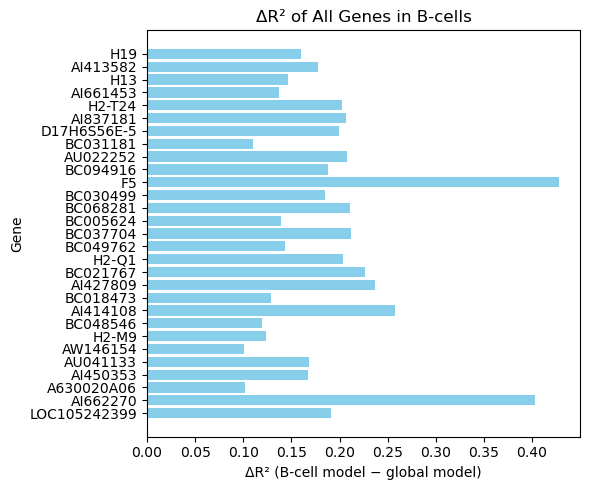

In [69]:
all_cre_genes = all_CREs_BCells.index.tolist()
delta_r2_all_cre = [delta_r2[gene] for gene in all_cre_genes]

plt.figure(figsize=(6, 5))
plt.barh(all_cre_genes, delta_r2_all_cre, color="skyblue")
plt.xlabel("ΔR² (B-cell model − global model)")
plt.ylabel("Gene")
plt.title("ΔR² of All Genes in B-cells")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("figures/deltaR^2_all_CREs_Bcells", dpi=300, bbox_inches='tight')
plt.show()

- high delta R^2 indicates: 
- In B-cells: Genexpression explains the Chromatin-accesibility well
- In other celltypes: explanatory power of the genexpression regarding the chromatin-accesibility is weaker

CREs to this genes

In [70]:
atac_genes_bcells = atac_genes.iloc[:, list(range(22)) + [-1]]
atac_genes_bcells.head()

,ImmGenATAC1219.peakID,chrom,Summit,mm10.60way.phastCons_scores,_-log10_bestPvalue,Included.in.systematic.analysis,TSS,genes.within.100Kb,LTHSC.34-.BM,LTHSC.34+.BM,...,proB.FrA.BM,proB.FrBC.BM,preB.FrD.BM,B.FrE.BM,B1b.PC,B.T1.Sp,B.T2.Sp,B.T3.Sp,B.Sp,Gene
16,ImmGenATAC1219.peak_17,chr1,3600878,0.09,0.36,NaN,NaN,Xkr4,0.41,0.71,...,0.63,0.50,0.49,35796.00,0.14,0.11,35796.00,0.10,23012.00,XKR4
17,ImmGenATAC1219.peak_18,chr1,3611363,0.16,11749.00,1.0,NaN,Xkr4,0.41,0.10,...,0.10,28491.00,45658.00,0.11,0.60,45839.00,0.71,20455.00,0.55,XKR4
18,ImmGenATAC1219.peak_19,chr1,3670859,0.76,27030.00,1.0,NaN,Xkr4,0.41,20852.00,...,44228.00,0.98,20090.00,45870.00,44197.00,31413.00,34001.00,45964.00,45689.00,XKR4
19,ImmGenATAC1219.peak_20,chr1,3671114,0.94,45690.00,1.0,NaN,Xkr4,0.41,45844.00,...,45719.00,19391.00,25235.00,45781.00,21217.00,0.50,44197.00,0.57,45689.00,XKR4
20,ImmGenATAC1219.peak_21,chr1,3671437,0.72,45690.00,1.0,Xkr4,Xkr4,0.41,24898.00,...,16834.00,0.82,0.49,12785.00,0.14,45748.00,45717.00,41671.00,0.59,XKR4


In [71]:
atac_genes_bcells.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1511829 entries, 16 to 512594
Data columns (total 23 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   ImmGenATAC1219.peakID            1511829 non-null  object 
 1   chrom                            1511829 non-null  object 
 2   Summit                           1511829 non-null  int64  
 3   mm10.60way.phastCons_scores      1511829 non-null  float64
 4   _-log10_bestPvalue               1511829 non-null  float64
 5   Included.in.systematic.analysis  1057704 non-null  float64
 6   TSS                              78405 non-null    object 
 7   genes.within.100Kb               1511829 non-null  object 
 8   LTHSC.34-.BM                     1511829 non-null  float64
 9   LTHSC.34+.BM                     1511829 non-null  float64
 10  STHSC.150-.BM                    1511829 non-null  float64
 11  MPP4.135+.BM                     1511829 non-null  floa

In [72]:
CREs_for_BCell_specific_genes = atac_genes_bcells[atac_genes_bcells['Gene'].isin(bcell_specific_genes)].copy()
CREs_for_BCell_specific_genes.head()


,ImmGenATAC1219.peakID,chrom,Summit,mm10.60way.phastCons_scores,_-log10_bestPvalue,Included.in.systematic.analysis,TSS,genes.within.100Kb,LTHSC.34-.BM,LTHSC.34+.BM,...,proB.FrA.BM,proB.FrBC.BM,preB.FrD.BM,B.FrE.BM,B1b.PC,B.T1.Sp,B.T2.Sp,B.T3.Sp,B.Sp,Gene
29024,ImmGenATAC1219.peak_29025,chr1,164053730,0.26,18933.0,1.0,NaN,"BC055324,Mettl18,Sele,Sell,Selp,Gm16548,F5",0.41,0.71,...,34700.00,33239.00,45658.00,0.80,0.14,45748.00,12451.0,13575.00,43466.00,F5
29025,ImmGenATAC1219.peak_29026,chr1,164055024,0.02,45292.0,NaN,NaN,"BC055324,Mettl18,Sele,Sell,Selp,Gm16548,F5",13181.00,0.71,...,12420.00,44256.00,14366.00,35490.00,14246.00,45903.00,45717.0,45748.00,23012.00,F5
29026,ImmGenATAC1219.peak_29027,chr1,164056901,0.00,20180.0,1.0,NaN,"BC055324,Mettl18,Sele,Sell,Selp,Gm16548,F5",0.41,0.71,...,0.34,23043.00,25204.00,0.80,0.14,0.91,44197.0,46753.00,45689.00,F5
29027,ImmGenATAC1219.peak_29028,chr1,164059537,0.02,45870.0,NaN,NaN,"BC055324,Mettl18,Sele,Sell,Selp,Gm16548,F5",13181.00,0.10,...,0.70,0.42,0.13,0.11,0.93,0.91,44197.0,0.32,0.11,F5
29028,ImmGenATAC1219.peak_29029,chr1,164060291,0.33,33848.0,1.0,NaN,"BC055324,Mettl18,Sele,Sell,Selp,Gm16548,F5",13181.00,24898.00,...,46784.00,45717.00,0.49,28126.00,24228.00,45748.00,0.1,0.57,45689.00,F5


In [73]:
CREs_for_BCell_specific_genes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1875 entries, 29024 to 478632
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ImmGenATAC1219.peakID            1875 non-null   object 
 1   chrom                            1875 non-null   object 
 2   Summit                           1875 non-null   int64  
 3   mm10.60way.phastCons_scores      1875 non-null   float64
 4   _-log10_bestPvalue               1875 non-null   float64
 5   Included.in.systematic.analysis  1353 non-null   float64
 6   TSS                              128 non-null    object 
 7   genes.within.100Kb               1875 non-null   object 
 8   LTHSC.34-.BM                     1875 non-null   float64
 9   LTHSC.34+.BM                     1875 non-null   float64
 10  STHSC.150-.BM                    1875 non-null   float64
 11  MPP4.135+.BM                     1875 non-null   float64
 12  proB.CLP.BM        

In [74]:
CREs_ID_for_BCell_specific_genes = CREs_for_BCell_specific_genes ['ImmGenATAC1219.peakID'].unique()
print(f"{len(CREs_ID_for_BCell_specific_genes)} CREs (Peaks) regulate B-cell-specific gene")

1845 CREs (Peaks) regulate B-cell-specific gene


In [75]:
#add mean and save as dataframe

CREs_for_BCell_specific_genes['Bcell_ATAC_mean'] = CREs_for_BCell_specific_genes.iloc[:, 8:22].mean(axis=1)
CREs_ID_for_BCell_specific_genes_df = CREs_for_BCell_specific_genes[['ImmGenATAC1219.peakID', 'Gene', 'chrom', 'Bcell_ATAC_mean']]


CREs_ID_for_BCell_specific_genes_df.head()

,ImmGenATAC1219.peakID,Gene,chrom,Bcell_ATAC_mean
29024,ImmGenATAC1219.peak_29025,F5,chr1,24864.147143
29025,ImmGenATAC1219.peak_29026,F5,chr1,25853.336429
29026,ImmGenATAC1219.peak_29027,F5,chr1,13206.480000
29027,ImmGenATAC1219.peak_29028,F5,chr1,4098.740714
29028,ImmGenATAC1219.peak_29029,F5,chr1,26731.725714


### d) How do the results of this analysis differ from pure association via correlation?

correlation and R^2

In [76]:
correlation_per_gene_Bcells = {}

for gene in shared_genes:
    x_vals = ATAC_Bcells_reg.loc[gene, common_celltypes_Bcells].values
    y_vals = RNA_Bcells_reg.loc[gene, common_celltypes_Bcells].values

    if np.isnan(x_vals).any() or np.isnan(y_vals).any():
        continue

    corr, _ = pearsonr(x_vals, y_vals)
    correlation_per_gene_Bcells[gene] = corr

In [77]:
genes_with_both = list(set(r2_per_gene_Bcells.keys()).intersection(correlation_per_gene_Bcells.keys()))

r2_vals = [r2_per_gene_Bcells[gene] for gene in genes_with_both]
cor_vals = [correlation_per_gene_Bcells[gene] for gene in genes_with_both]

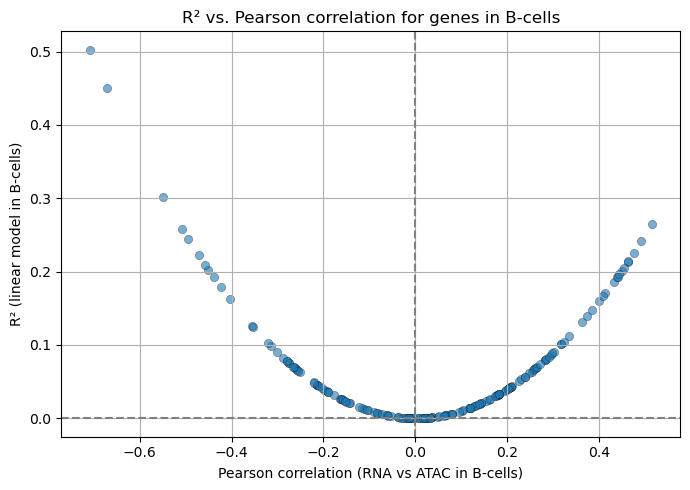

In [78]:
plt.figure(figsize=(7,5))
plt.scatter(cor_vals, r2_vals, alpha=0.6, edgecolor='k', linewidth=0.3)
plt.xlabel("Pearson correlation (RNA vs ATAC in B-cells)")
plt.ylabel("R² (linear model in B-cells)")
plt.title("R² vs. Pearson correlation for genes in B-cells")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.savefig("figures/R^2_vs_pearson_correlation", dpi=300, bbox_inches='tight')
plt.show()

- correlation measures direction and strength of linear association
- R² reflects how well a linear model explains gene expression from accessibility
- even genes with low or negative correlation can have high R² -> correlation alone underestimates cell-type specific regulatory explanatory power

- correlation: only if there is a relationship (negativ or positiv), but no information about direction
- R^2: how well does the chromatin-accesibility predict the genexpression (ATAC -> RNA) 

cell-specific effects

In [79]:
shared_genes = RNA_Bcells_reg.index.intersection(ATAC_Bcells_reg.index)

correlations = []
for gene in shared_genes:
    rna_values = RNA_Bcells_reg.loc[gene].values
    atac_values = ATAC_Bcells_reg.loc[gene].values
    if np.std(rna_values) > 0 and np.std(atac_values) > 0:
        corr, _ = pearsonr(atac_values, rna_values)
    else:
        corr = np.nan  
    correlations.append(corr)

In [80]:
result_corr_df = pd.DataFrame({'Gene': shared_genes,'Correlation': correlations,'Delta_R2': [delta_r2.get(gene, np.nan) for gene in shared_genes]}).dropna()
result_corr_df.head()

,Gene,Correlation,Delta_R2
0,A630020A06,0.322596,0.101491
1,AA387883,0.298122,0.077681
2,AA388235,-0.177129,0.030091
3,AA414768,-0.026531,0.000141
4,AA415398,-0.214281,0.038083


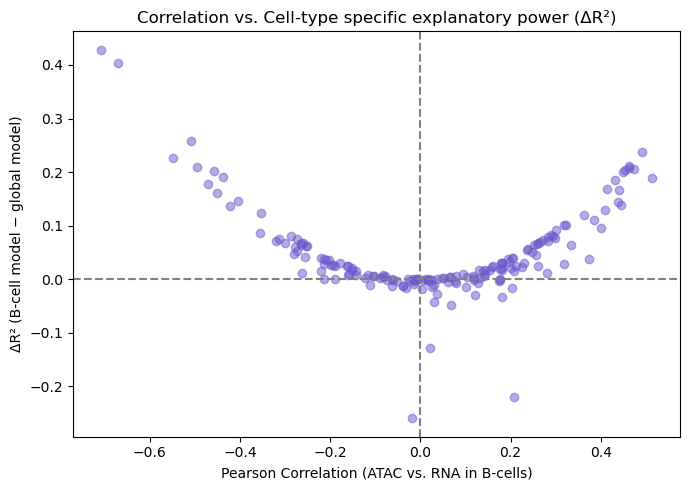

In [81]:
plt.figure(figsize=(7, 5))
plt.scatter(result_corr_df['Correlation'], result_corr_df['Delta_R2'], alpha=0.5, color='slateblue')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel("Pearson Correlation (ATAC vs. RNA in B-cells)")
plt.ylabel("ΔR² (B-cell model − global model)")
plt.title("Correlation vs. Cell-type specific explanatory power (ΔR²)")
plt.tight_layout()
plt.savefig("figures/deltaR^2_vs_pearson_correlation", dpi=300, bbox_inches='tight')
plt.show()

### e) Are there differences between activating and repressing CREs?

- activting CREs -> positive correlation : ATAC uand gene-expression
- repressing CREs -> negative correlation : ATAC uand gene-expression


In [82]:
activating_CREs = [gene for gene, corr in correlation_per_gene_Bcells.items() if corr > 0.3]
repressing_CREs = [gene for gene, corr in correlation_per_gene_Bcells.items() if corr < -0.3]


In [83]:
activating_r2 = [r2_per_gene_Bcells[gene] for gene in activating_CREs if gene in r2_per_gene_Bcells]
repressing_r2 = [r2_per_gene_Bcells[gene] for gene in repressing_CREs if gene in r2_per_gene_Bcells]

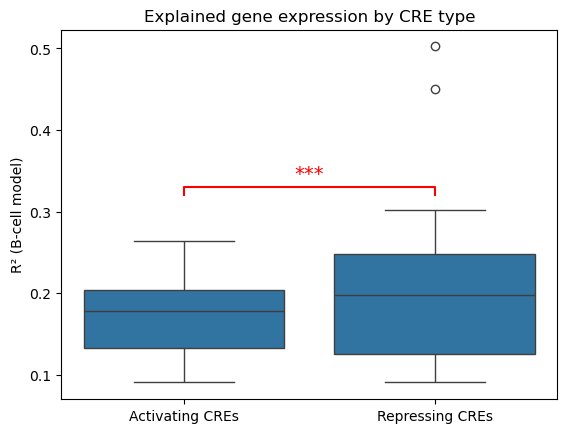

In [84]:
sns.boxplot(data=[activating_r2, repressing_r2], palette=['#1f77b4', '#1f77b4'])
plt.xticks([0, 1], ["Activating CREs", "Repressing CREs"])
plt.ylabel("R² (B-cell model)")
plt.title("Explained gene expression by CRE type")

y_max = max(max(activating_r2), max(repressing_r2))  
y_sig = 0.32  
h = 0.01  

plt.plot([0, 0, 1, 1], [y_sig, y_sig + h, y_sig + h, y_sig], lw=1.5, c='red')
plt.text(0.5, y_sig + h + 0.005, '***', ha='center', va='bottom', fontsize=14, c='red')

plt.savefig("figures/boxplot_variance_by_CRE_type", dpi=300, bbox_inches='tight')
plt.show()

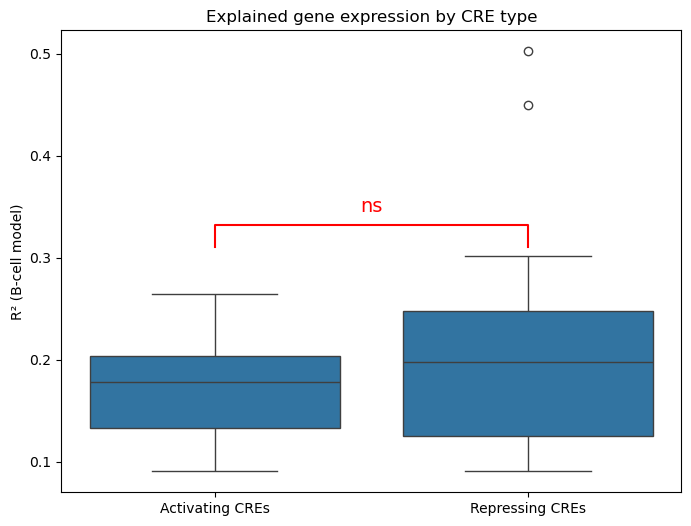

In [85]:
t_stat, p_value = ttest_ind(activating_r2, repressing_r2, equal_var=False)

def get_significance_stars(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return 'ns'

stars = get_significance_stars(p_value)

plt.figure(figsize=(8, 6))
sns.boxplot(data=[activating_r2, repressing_r2], palette=['#1f77b4', '#1f77b4'])
plt.xticks([0, 1], ["Activating CREs", "Repressing CREs"])
plt.ylabel("R² (B-cell model)")
plt.title("Explained gene expression by CRE type")

def get_whisker_top(data):
    data = np.array(data) 
    q3 = np.percentile(data, 75)
    iqr = q3 - np.percentile(data, 25)
    whisker = min(np.max(data[data <= q3 + 1.5 * iqr]), np.max(data))
    return whisker

whisker_1 = get_whisker_top(activating_r2)
whisker_2 = get_whisker_top(repressing_r2)
y = max(whisker_1, whisker_2)
offset = y * 0.1 

plt.plot([0, 0, 1, 1], [y + offset*0.3, y + offset, y + offset, y + offset*0.3], c='red', lw=1.5)
plt.text(0.5, y + offset * 1.3, stars, ha='center', va='bottom', fontsize=14, color='red')

plt.savefig("figures/boxplot_variance_by_CRE_type", dpi=300, bbox_inches='tight')
plt.show()

In [86]:
t_stat, p_val = ttest_ind(activating_r2, repressing_r2)
print(f"T-statistic: {t_stat:.3f}, p-value: {p_val:.3e}")

T-statistic: -1.635, p-value: 1.107e-01


means per CRE type

In [87]:
CREs_ID_for_BCell_specific_genes_df.head()

,ImmGenATAC1219.peakID,Gene,chrom,Bcell_ATAC_mean
29024,ImmGenATAC1219.peak_29025,F5,chr1,24864.147143
29025,ImmGenATAC1219.peak_29026,F5,chr1,25853.336429
29026,ImmGenATAC1219.peak_29027,F5,chr1,13206.480000
29027,ImmGenATAC1219.peak_29028,F5,chr1,4098.740714
29028,ImmGenATAC1219.peak_29029,F5,chr1,26731.725714


In [88]:
CREs_ID_for_BCell_specific_genes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1875 entries, 29024 to 478632
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ImmGenATAC1219.peakID  1875 non-null   object 
 1   Gene                   1875 non-null   object 
 2   chrom                  1875 non-null   object 
 3   Bcell_ATAC_mean        1875 non-null   float64
dtypes: float64(1), object(3)
memory usage: 73.2+ KB


In [89]:
activating_CREs_df = CREs_ID_for_BCell_specific_genes_df[CREs_ID_for_BCell_specific_genes_df['Gene'].isin(activating_CREs)].copy()
repressing_CREs_df = CREs_ID_for_BCell_specific_genes_df[CREs_ID_for_BCell_specific_genes_df['Gene'].isin(repressing_CREs)].copy()

activating_CREs_df['Type'] = 'Activating'
repressing_CREs_df['Type'] = 'Repressing'

/var/folders/3f/pxvhxt1x4477ds3p64jyb_6c0000gn/T/ipykernel_16711/625343804.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type', y='Bcell_ATAC_mean', data=combined_CREs_df, palette=['#1f77b4', '#1f77b4'])


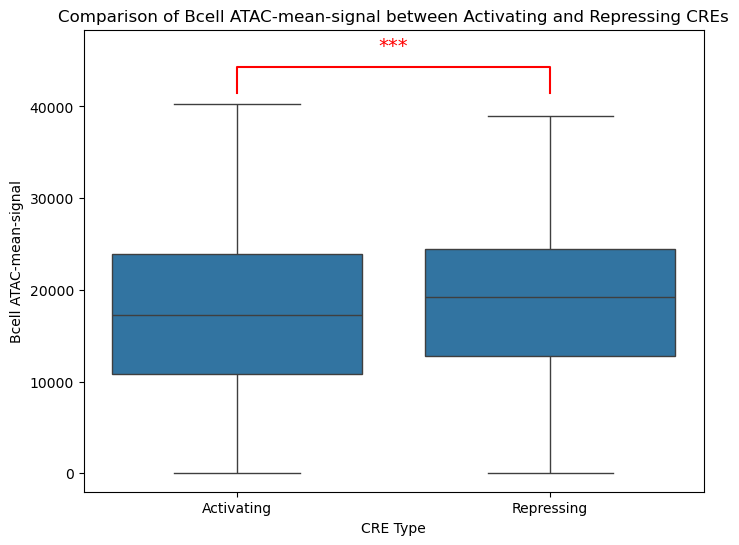

In [90]:
combined_CREs_df = pd.concat([activating_CREs_df, repressing_CREs_df])

activating_values = combined_CREs_df[combined_CREs_df['Type'] == 'Activating']['Bcell_ATAC_mean'].dropna()
repressing_values = combined_CREs_df[combined_CREs_df['Type'] == 'Repressing']['Bcell_ATAC_mean'].dropna()

t_stat, p_value = ttest_ind(activating_values, repressing_values, equal_var=False)

def get_significance_stars(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return 'ns'

stars = get_significance_stars(p_value)

def get_whisker_top(data):
    data = np.array(data)
    q3 = np.percentile(data, 75)
    iqr = q3 - np.percentile(data, 25)
    whisker = min(np.max(data[data <= q3 + 1.5 * iqr]), np.max(data))
    return whisker

whisker_1 = get_whisker_top(activating_values)
whisker_2 = get_whisker_top(repressing_values)
y = max(whisker_1, whisker_2)
offset = y * 0.1 

plt.figure(figsize=(8, 6))
sns.boxplot(x='Type', y='Bcell_ATAC_mean', data=combined_CREs_df, palette=['#1f77b4', '#1f77b4'])
plt.title('Comparison of Bcell ATAC-mean-signal between Activating and Repressing CREs')
plt.ylabel('Bcell ATAC-mean-signal')
plt.xlabel('CRE Type')
plt.ylim(top=y + offset * 2)

plt.plot([0, 0, 1, 1], [y + offset*0.3, y + offset, y + offset, y + offset*0.3], lw=1.5, c='red')
plt.text(0.5, y + offset * 1.3, stars, ha='center', va='bottom', fontsize=14, color='red')

plt.savefig("figures/comparison_of_ATAC_mean_activating_repressing_CREs", dpi=300, bbox_inches='tight')
plt.show()

In [91]:
activating_values = activating_CREs_df['Bcell_ATAC_mean']
repressing_values = repressing_CREs_df['Bcell_ATAC_mean']

print('Mean Bcell_ATAC_mean activating:', activating_values.mean())
print('Mean Bcell_ATAC_mean repressing:', repressing_values.mean())

u_stat, p_value = stats.mannwhitneyu(activating_values, repressing_values)
print('Mann-Whitney U test p-value:', p_value)


Mean Bcell_ATAC_mean activating: 17322.549081722875
Mean Bcell_ATAC_mean repressing: 18643.157789938556
Mann-Whitney U test p-value: 0.0007672005475436124


In [92]:
t_stat, p_val = ttest_ind(activating_values, repressing_values)
print(f"T-statistic: {t_stat:.3f}, p-value: {p_val:.3e}")

T-statistic: -3.359, p-value: 7.980e-04


- Mann-Whitney U test: there is a significant difference

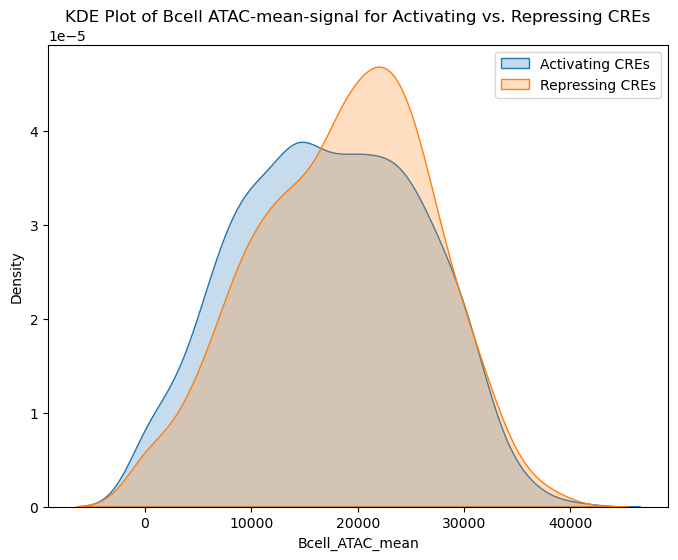

In [93]:
plt.figure(figsize=(8,6))
sns.kdeplot(activating_CREs_df['Bcell_ATAC_mean'], label='Activating CREs', fill=True)
sns.kdeplot(repressing_CREs_df['Bcell_ATAC_mean'], label='Repressing CREs', fill=True)
plt.title('KDE Plot of Bcell ATAC-mean-signal for Activating vs. Repressing CREs')
plt.xlabel('Bcell_ATAC_mean')
plt.ylabel('Density')
plt.legend()
plt.savefig("figures/KDE_plot_ATAC_mean_activating_repressing_CREs", dpi=300, bbox_inches='tight')
plt.show()

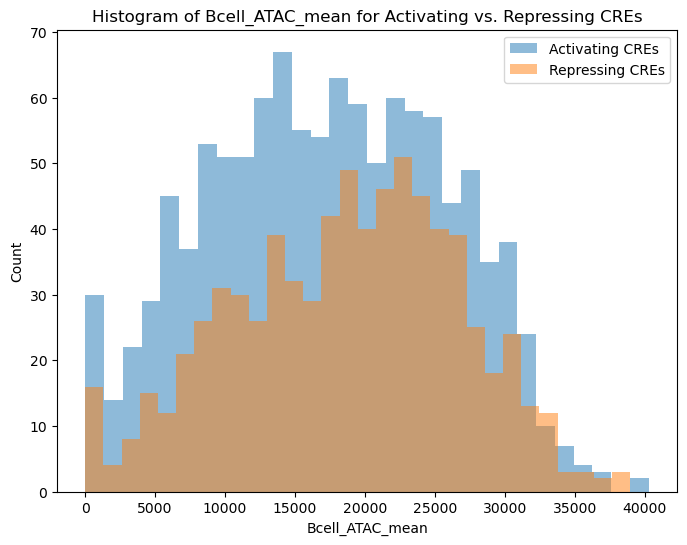

In [94]:
plt.figure(figsize=(8,6))
plt.hist(activating_CREs_df['Bcell_ATAC_mean'], bins=30, alpha=0.5, label='Activating CREs')
plt.hist(repressing_CREs_df['Bcell_ATAC_mean'], bins=30, alpha=0.5, label='Repressing CREs')
plt.title('Histogram of Bcell_ATAC_mean for Activating vs. Repressing CREs')
plt.xlabel('Bcell_ATAC_mean')
plt.ylabel('Count')
plt.legend()
plt.savefig("figures/Histogram_ATAC_mean_activating_repressing_CREs", dpi=300, bbox_inches='tight')
plt.show()

compare location on chromosome

In [95]:
print('Chromosome distribution activating CREs:')
print(activating_CREs_df['chrom'].value_counts())

print('Chromosome distribution repressing CREs:')
print(repressing_CREs_df['chrom'].value_counts())


Chromosome distribution activating CREs:
chrom
chr17    217
chr11    197
chr19    175
chr4     169
chr2      88
chr1      84
chr18     69
chr15     53
chr6      52
chr10     15
chr7      12
Name: count, dtype: int64
Chromosome distribution repressing CREs:
chrom
chr17    283
chr1     114
chr2      99
chr7      69
chr12     55
chr9      42
chr11     41
chr3      40
chr5       1
Name: count, dtype: int64


### f) How many genes are mainly regulated by repressing CREs, and can promoters act through repression?

genes regulated by repressing CREs

In [ ]:
activating_counts = activating_CREs_df['Gene'].value_counts()
repressing_counts = repressing_CREs_df['Gene'].value_counts()

CRE_type_counts_df = pd.DataFrame({'activating': activating_counts,'repressing': repressing_counts}).fillna(0)
CRE_type_counts_df.head()

,activating,repressing
Gene,,
A630020A06,53.0,0.0
AI413582,0.0,103.0
AI414108,0.0,42.0
AI427809,86.0,0.0
AI450353,41.0,0.0


In [152]:
CRE_type_counts_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, A630020A06 to LOC105242399
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   activating  29 non-null     float64
 1   repressing  29 non-null     float64
dtypes: float64(2)
memory usage: 1.7+ KB


In [97]:
mainly_repressed_genes = CRE_type_counts_df[CRE_type_counts_df['repressing'] > CRE_type_counts_df['activating']]
num_genes_repressed = len(mainly_repressed_genes)
print("Number of genes mainly regulated by repressing CREs:", num_genes_repressed)


Number of genes mainly regulated by repressing CREs: 12


In [98]:
mainly_activated_genes = CRE_type_counts_df[CRE_type_counts_df['activating'] > CRE_type_counts_df['repressing']]
num_genes_activated = len(mainly_activated_genes)

In [99]:
num_genes_equal = len(CRE_type_counts_df[CRE_type_counts_df['activating'] == CRE_type_counts_df['repressing']])

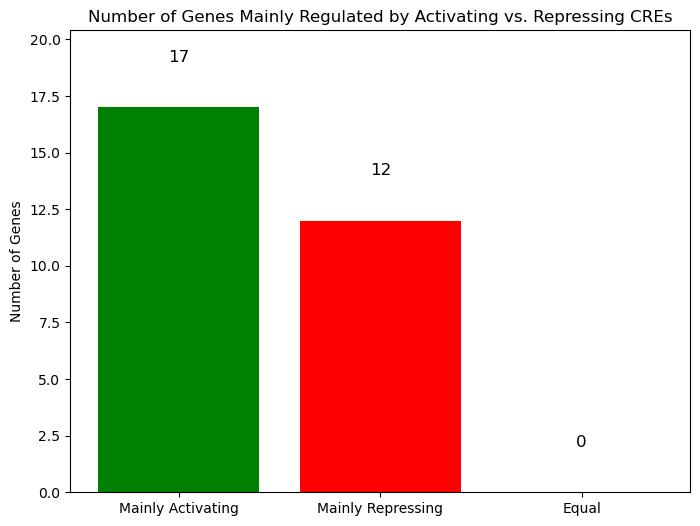

In [100]:
categories = ['Mainly Activating', 'Mainly Repressing', 'Equal']
values = [num_genes_activated, num_genes_repressed, num_genes_equal]

plt.figure(figsize=(8,6))
bars = plt.bar(categories, values, color=['green', 'red', 'gray'])
plt.ylabel('Number of Genes')
plt.title('Number of Genes Mainly Regulated by Activating vs. Repressing CREs')


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2, f'{int(height)}', ha='center', fontsize=12)

plt.ylim(top=max(values) * 1.2)

plt.savefig("figures/number_of_genes_regulated_activating_repressing", dpi=300, bbox_inches='tight')
plt.show()


can promotors act through repression 

In [101]:
ATAC_regiontype = pd.read_csv("data/ATAC_regiontype.csv")
ATAC_regiontype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512384 entries, 0 to 512383
Columns: 102 entries, Unnamed: 0 to mean_signal_all_celltypes
dtypes: float64(95), int64(2), object(5)
memory usage: 398.7+ MB


In [102]:
print(ATAC_regiontype.columns.tolist())

['Unnamed: 0', 'ImmGenATAC1219.peakID', 'chrom', 'Summit', 'mm10.60way.phastCons_scores', '_-log10_bestPvalue', 'Included.in.systematic.analysis', 'TSS', 'genes.within.100Kb', 'LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM', 'proB.CLP.BM', 'proB.FrA.BM', 'proB.FrBC.BM', 'preB.FrD.BM', 'B.FrE.BM', 'B1b.PC', 'B.T1.Sp', 'B.T2.Sp', 'B.T3.Sp', 'B.Sp', 'B.Fem.Sp', 'B.MZ.Sp', 'B.Fo.Sp', 'B.mem.Sp', 'B.GC.CB.Sp', 'B.GC.CC.Sp', 'B.PB.Sp', 'B.PC.Sp', 'B.PC.BM', 'preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th', 'preT.DN3.Th', 'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th', 'T.4.Nve.Sp', 'T.4.Nve.Fem.Sp', 'T.8.Nve.Sp', 'T.4.Sp.aCD3+CD40.18hr', 'Treg.4.FP3+.Nrplo.Co', 'Treg.4.25hi.Sp', 'T8.TN.P14.Sp', 'T8.IEL.LCMV.d7.SI', 'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp', 'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp', 'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d', 'Tgd.g2+d17.24a+.Th', 'Tgd.g2+d17.LN', 'Tgd.g2+d1.24a+.Th', 'Tgd.g2+d1.LN', 'Tgd.g1.1+d1.24a+.Th', 'Tgd.g1.1+d1

In [103]:
ATAC_regiontype.head()

,Unnamed: 0,ImmGenATAC1219.peakID,chrom,Summit,mm10.60way.phastCons_scores,_-log10_bestPvalue,Included.in.systematic.analysis,TSS,genes.within.100Kb,LTHSC.34-.BM,...,DC.103+11b+.SI,DC.103+11b-.SI,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th,distance_to_nearest_TSS,annotation,mean_signal_all_celltypes
0,0,ImmGenATAC1219.peak_1,chr1,3020786,0.00,0.56,NaN,NaN,NaN,0.41,...,13516.00,0.52,46388.00,0.10,0.57,46447.0,14977.00,-650712.0,enhancer,13052.647444
1,1,ImmGenATAC1219.peak_2,chr1,3087226,0.00,0.50,NaN,NaN,NaN,0.41,...,0.47,0.11,0.92,0.98,42401.00,12451.0,0.94,-584272.0,enhancer,9903.710333
2,2,ImmGenATAC1219.peak_3,chr1,3120109,0.07,45879.00,1.0,NaN,NaN,13181.00,...,0.95,0.11,63.38,33817.00,12055.00,45748.0,0.11,-551389.0,enhancer,7668.146222
3,3,ImmGenATAC1219.peak_4,chr1,3121485,0.15,45691.00,1.0,NaN,NaN,0.41,...,0.11,0.92,45790.00,0.98,46753.00,45748.0,0.11,-550013.0,enhancer,9244.615333
4,4,ImmGenATAC1219.peak_5,chr1,3372787,0.03,11324.00,NaN,NaN,NaN,0.41,...,28856.00,0.51,0.92,0.75,12055.00,22282.0,45781.00,-298711.0,enhancer,11146.956333


In [104]:
ATAC_promoter_peaks = ATAC_regiontype[ATAC_regiontype['annotation'].str.contains('promoter', case=False, na=False)]
ATAC_promoter_peaks.head()

,Unnamed: 0,ImmGenATAC1219.peakID,chrom,Summit,mm10.60way.phastCons_scores,_-log10_bestPvalue,Included.in.systematic.analysis,TSS,genes.within.100Kb,LTHSC.34-.BM,...,DC.103+11b+.SI,DC.103+11b-.SI,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th,distance_to_nearest_TSS,annotation,mean_signal_all_celltypes
20,20,ImmGenATAC1219.peak_21,chr1,3671437,0.72,45690.00,1.0,Xkr4,Xkr4,0.41,...,31778.00,0.92,35521.00,22678.00,23408.0,30348.00,17.14,-61.0,promoter,19927.220556
139,139,ImmGenATAC1219.peak_140,chr1,4785675,0.41,15.87,1.0,Mrpl15,"Mrpl15,Lypla1,Tcea1",34213.00,...,45830.00,45889.00,33.25,23.63,45920.0,45729.00,22.38,-51.0,promoter,8205.464667
188,188,ImmGenATAC1219.peak_189,chr1,5019412,0.28,13.74,1.0,NaN,"Rgs20,Atp6v1h",7.00,...,13516.00,27395.00,16.13,19511.00,45875.0,26.53,63.81,-127.0,promoter,24381.063111
244,244,ImmGenATAC1219.peak_245,chr1,6214615,0.39,44.66,1.0,Rb1cc1,Rb1cc1,50.55,...,63.59,57.49,59.11,62.04,78.1,64.83,86.51,-46.0,promoter,571.519111
273,273,ImmGenATAC1219.peak_274,chr1,6359261,0.03,45810.00,1.0,Fam150a,Fam150a,0.41,...,45963.00,0.98,23163.00,13516.00,23924.0,41852.00,23468.00,-69.0,promoter,27470.679778


In [105]:
repressing_CREs_df.head()

,ImmGenATAC1219.peakID,Gene,chrom,Bcell_ATAC_mean,Type
29024,ImmGenATAC1219.peak_29025,F5,chr1,24864.147143,Repressing
29025,ImmGenATAC1219.peak_29026,F5,chr1,25853.336429,Repressing
29026,ImmGenATAC1219.peak_29027,F5,chr1,13206.480000,Repressing
29027,ImmGenATAC1219.peak_29028,F5,chr1,4098.740714,Repressing
29028,ImmGenATAC1219.peak_29029,F5,chr1,26731.725714,Repressing


In [106]:
repressing_CREs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 744 entries, 29024 to 478632
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ImmGenATAC1219.peakID  744 non-null    object 
 1   Gene                   744 non-null    object 
 2   chrom                  744 non-null    object 
 3   Bcell_ATAC_mean        744 non-null    float64
 4   Type                   744 non-null    object 
dtypes: float64(1), object(4)
memory usage: 34.9+ KB


In [107]:
#find similar peaks 

repressing_promoters = repressing_CREs_df[repressing_CREs_df['ImmGenATAC1219.peakID'].isin(ATAC_promoter_peaks['ImmGenATAC1219.peakID'])]
print(f'Number of repressing CREs that are promoters: {len(repressing_promoters)}')

Number of repressing CREs that are promoters: 25


In [108]:
all_promoter_ids = set(ATAC_promoter_peaks['ImmGenATAC1219.peakID'])

repressing_promoter_ids = set(repressing_promoters['ImmGenATAC1219.peakID'])

non_repressing_promoter_ids = all_promoter_ids - repressing_promoter_ids

num_repressing_promoters = len(repressing_promoter_ids)
num_non_repressing_promoters = len(non_repressing_promoter_ids)



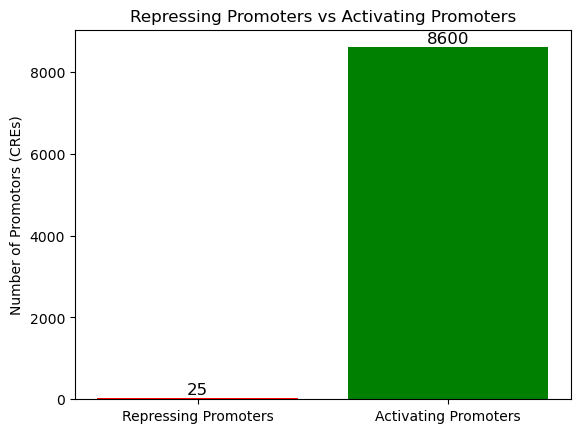

In [109]:
labels = ['Repressing Promoters', 'Activating Promoters']
values = [num_repressing_promoters, num_non_repressing_promoters]

plt.bar(labels, values, color=['red', 'green'])
plt.ylabel('Number of Promotors (CREs)')
plt.title('Repressing Promoters vs Activating Promoters')

for i, v in enumerate(values):
    plt.text(i, v + max(values)*0.01, str(v), ha='center', fontsize=12)

plt.savefig("figures/number_of_promoters_activating_repressing", dpi=300, bbox_inches='tight')
plt.show()

### g) Where are repressing CREs located compared to activating CREs?

on chromosome:

In [110]:
print('Chromosome distribution activating CREs:')
print(activating_CREs_df['chrom'].value_counts())

print('Chromosome distribution repressing CREs:')
print(repressing_CREs_df['chrom'].value_counts())


Chromosome distribution activating CREs:
chrom
chr17    217
chr11    197
chr19    175
chr4     169
chr2      88
chr1      84
chr18     69
chr15     53
chr6      52
chr10     15
chr7      12
Name: count, dtype: int64
Chromosome distribution repressing CREs:
chrom
chr17    283
chr1     114
chr2      99
chr7      69
chr12     55
chr9      42
chr11     41
chr3      40
chr5       1
Name: count, dtype: int64


In [111]:
activating_CREs_counts = activating_CREs_df['chrom'].value_counts().sort_index()
repressing_CREs_counts = repressing_CREs_df['chrom'].value_counts().sort_index()

chromosomes = sorted(set(activating_CREs_counts.index) | set(repressing_CREs_counts.index))

activating_CREs_vals = [activating_CREs_counts.get(chrom, 0) for chrom in chromosomes]
repressing_CREs_vals = [repressing_CREs_counts.get(chrom, 0) for chrom in chromosomes]

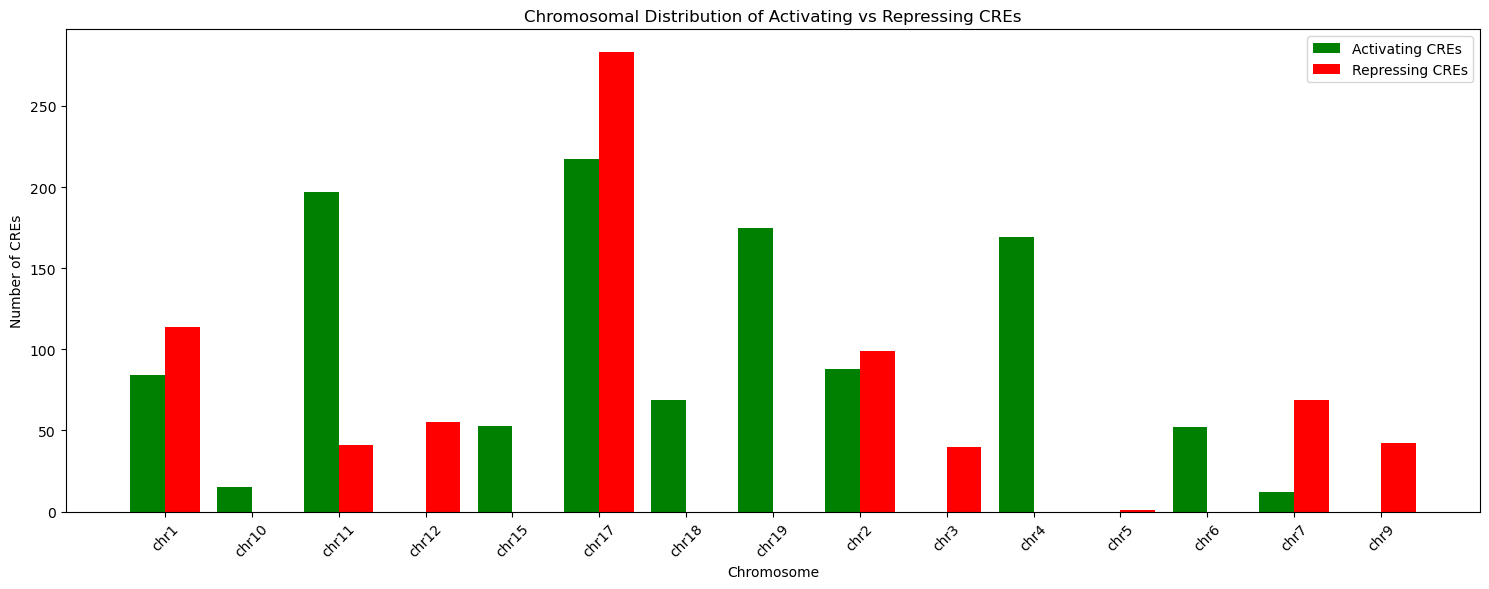

In [112]:
bar_width = 0.4
x = range(len(chromosomes))

plt.figure(figsize=(15,6))

plt.bar([i - bar_width/2 for i in x], activating_CREs_vals, width=bar_width, label='Activating CREs', color='green')
plt.bar([i + bar_width/2 for i in x], repressing_CREs_vals, width=bar_width, label='Repressing CREs', color='red')

plt.xticks(ticks=x, labels=chromosomes, rotation=45)
plt.xlabel('Chromosome')
plt.ylabel('Number of CREs')
plt.title('Chromosomal Distribution of Activating vs Repressing CREs')
plt.legend()
plt.tight_layout()
plt.savefig("figures/location_of_activating_repressing_CREs_chromosome", dpi=300, bbox_inches='tight')
plt.show()

location to TSS

In [113]:
ATAC_with_TSS = pd.read_csv("data/ATAC_with_TSS.csv")
ATAC_with_TSS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512595 entries, 0 to 512594
Data columns (total 100 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       512595 non-null  int64  
 1   ImmGenATAC1219.peakID            512595 non-null  object 
 2   chrom                            512595 non-null  object 
 3   Summit                           512595 non-null  int64  
 4   mm10.60way.phastCons_scores      512595 non-null  float64
 5   _-log10_bestPvalue               512595 non-null  float64
 6   Included.in.systematic.analysis  334879 non-null  float64
 7   TSS                              14292 non-null   object 
 8   genes.within.100Kb               427710 non-null  object 
 9   LTHSC.34-.BM                     512595 non-null  float64
 10  LTHSC.34+.BM                     512595 non-null  float64
 11  STHSC.150-.BM                    512595 non-null  float64
 12  M

In [114]:
ATAC_with_TSS.head()

,Unnamed: 0,ImmGenATAC1219.peakID,chrom,Summit,mm10.60way.phastCons_scores,_-log10_bestPvalue,Included.in.systematic.analysis,TSS,genes.within.100Kb,LTHSC.34-.BM,...,DC.8+.Sp,DC.pDC.Sp,DC.103+11b+.SI,DC.103+11b-.SI,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th,distance_to_nearest_TSS
0,0,ImmGenATAC1219.peak_1,chr1,3020786,0.00,0.56,NaN,NaN,NaN,0.41,...,0.10,43525.00,13516.00,0.52,46388.00,0.10,0.57,46447.0,14977.00,-650712.0
1,1,ImmGenATAC1219.peak_2,chr1,3087226,0.00,0.50,NaN,NaN,NaN,0.41,...,0.10,14977.00,0.47,0.11,0.92,0.98,42401.00,12451.0,0.94,-584272.0
2,2,ImmGenATAC1219.peak_3,chr1,3120109,0.07,45879.00,1.0,NaN,NaN,13181.00,...,0.54,26330.00,0.95,0.11,63.38,33817.00,12055.00,45748.0,0.11,-551389.0
3,3,ImmGenATAC1219.peak_4,chr1,3121485,0.15,45691.00,1.0,NaN,NaN,0.41,...,30317.00,0.66,0.11,0.92,45790.00,0.98,46753.00,45748.0,0.11,-550013.0
4,4,ImmGenATAC1219.peak_5,chr1,3372787,0.03,11324.00,NaN,NaN,NaN,0.41,...,0.10,0.66,28856.00,0.51,0.92,0.75,12055.00,22282.0,45781.00,-298711.0


In [115]:
repressing_dist = ATAC_with_TSS[ATAC_with_TSS['ImmGenATAC1219.peakID'].isin(repressing_CREs_df['ImmGenATAC1219.peakID'])]['distance_to_nearest_TSS'].dropna()

activating_dist = ATAC_with_TSS[ATAC_with_TSS['ImmGenATAC1219.peakID'].isin(activating_CREs_df['ImmGenATAC1219.peakID'])]['distance_to_nearest_TSS'].dropna()

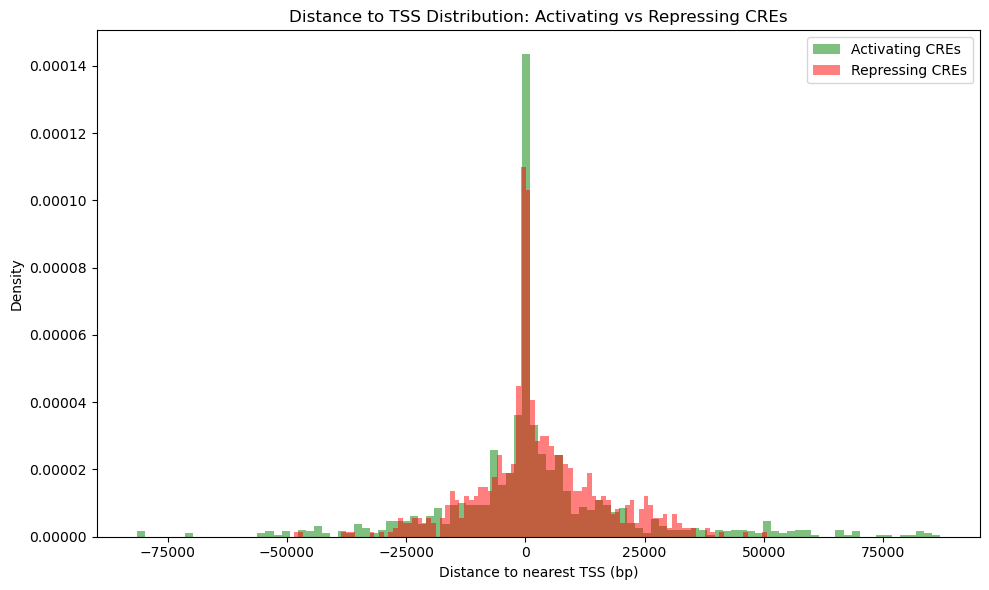

In [116]:
plt.figure(figsize=(10,6))
plt.hist(activating_dist, bins=100, alpha=0.5, label='Activating CREs', color='green', density=True)
plt.hist(repressing_dist, bins=100, alpha=0.5, label='Repressing CREs', color='red', density=True)

plt.xlabel('Distance to nearest TSS (bp)')
plt.ylabel('Density')
plt.title('Distance to TSS Distribution: Activating vs Repressing CREs')
plt.legend()
plt.tight_layout()
plt.show()


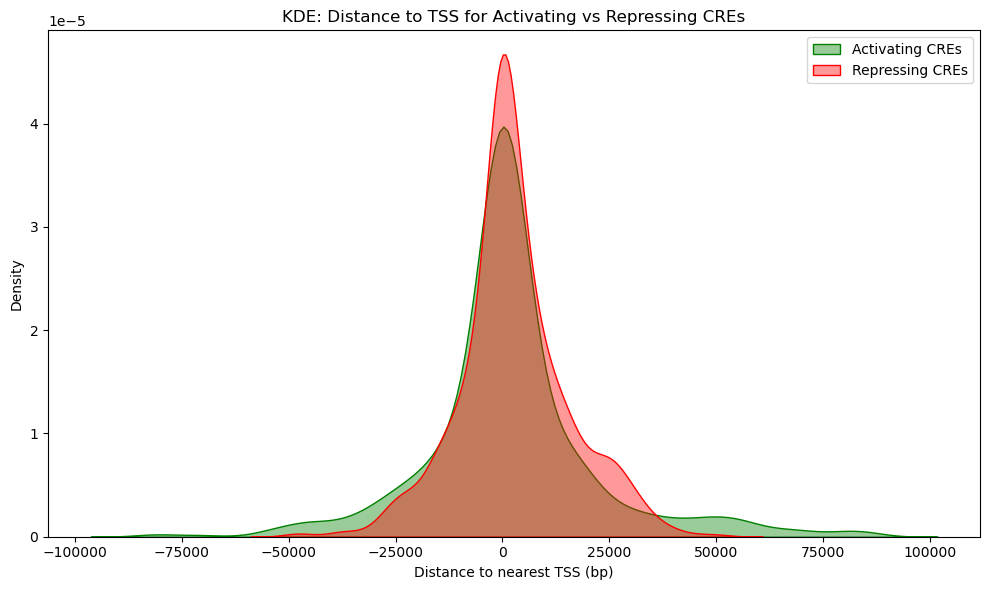

In [117]:
plt.figure(figsize=(10,6))

sns.kdeplot(activating_dist, label='Activating CREs', color='green', fill=True, alpha=0.4)
sns.kdeplot(repressing_dist, label='Repressing CREs', color='red', fill=True, alpha=0.4)

plt.xlabel('Distance to nearest TSS (bp)')
plt.ylabel('Density')
plt.title('KDE: Distance to TSS for Activating vs Repressing CREs')
plt.legend()
plt.tight_layout()
plt.savefig("figures/location_of_activating_repressing_CREs_TSS", dpi=300, bbox_inches='tight')
plt.show()

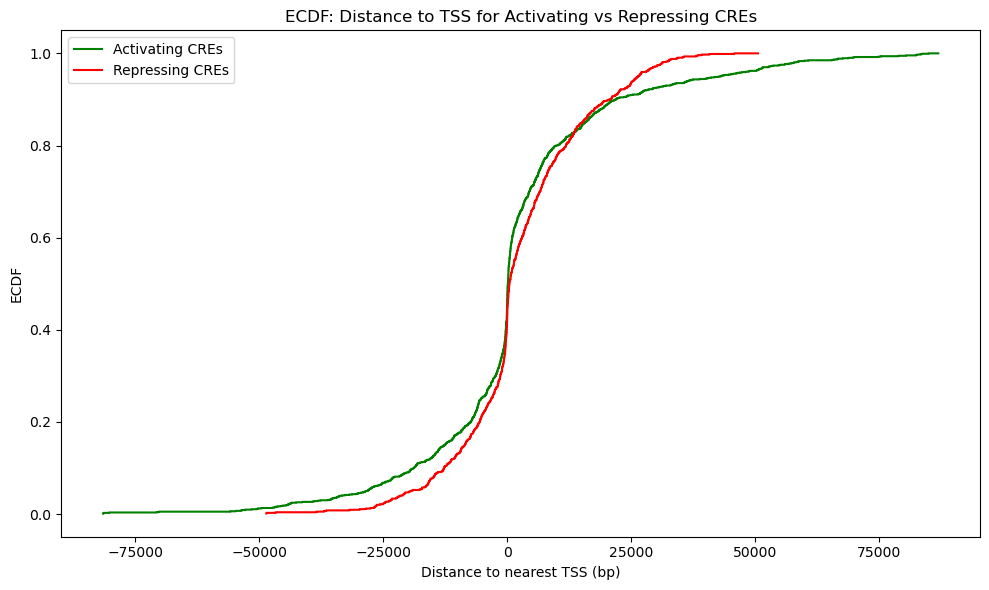

In [118]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)
    return x, y

x_activ, y_activ = ecdf(activating_dist)
x_repress, y_repress = ecdf(repressing_dist)

plt.figure(figsize=(10,6))
plt.step(x_activ, y_activ, label='Activating CREs', color='green')
plt.step(x_repress, y_repress, label='Repressing CREs', color='red')

plt.xlabel('Distance to nearest TSS (bp)')
plt.ylabel('ECDF')
plt.title('ECDF: Distance to TSS for Activating vs Repressing CREs')
plt.legend()
plt.tight_layout()
plt.savefig("figures/ECDF_location_of_activating_repressing_CREs_TSS", dpi=300, bbox_inches='tight')
plt.show()

- Repressing CREs: a bit closer to TSS than activating CREs (rises faster for negative values/ more CREs in shorter distance)



### h) Are there CREs that are repressing for one gene but activating for another gene?
            

In [119]:
cre_gene_correlation = []

for gene, corr in correlation_per_gene_Bcells.items():
    cre_ids = atac_genes_bcells[atac_genes_bcells['Gene'] == gene]['ImmGenATAC1219.peakID'].unique()
    for cre in cre_ids:
        cre_gene_correlation.append((cre, gene, corr))

cre_gene_corr_df = pd.DataFrame(cre_gene_correlation, columns=['peakID', 'Gene', 'correlation'])


In [120]:

def is_mixed_effect(group):
    return (group['correlation'] > 0.3).any() and (group['correlation'] < -0.3).any()

mixed_cre = cre_gene_corr_df.groupby('peakID').filter(is_mixed_effect)


In [121]:
mixed_cre.head()

,peakID,Gene,correlation
309,ImmGenATAC1219.peak_84071,AA465934,0.181684
310,ImmGenATAC1219.peak_84072,AA465934,0.181684
311,ImmGenATAC1219.peak_84073,AA465934,0.181684
312,ImmGenATAC1219.peak_84074,AA465934,0.181684
313,ImmGenATAC1219.peak_84075,AA465934,0.181684


In [122]:
mixed_cre['peakID'].nunique() 


84

/var/folders/3f/pxvhxt1x4477ds3p64jyb_6c0000gn/T/ipykernel_16711/2344618379.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gene', y='correlation', data=group, palette='coolwarm')


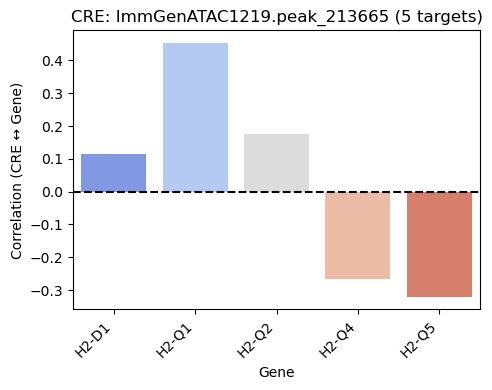

/var/folders/3f/pxvhxt1x4477ds3p64jyb_6c0000gn/T/ipykernel_16711/2344618379.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gene', y='correlation', data=group, palette='coolwarm')


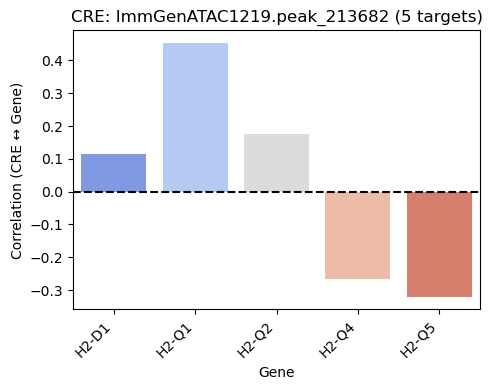

/var/folders/3f/pxvhxt1x4477ds3p64jyb_6c0000gn/T/ipykernel_16711/2344618379.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gene', y='correlation', data=group, palette='coolwarm')


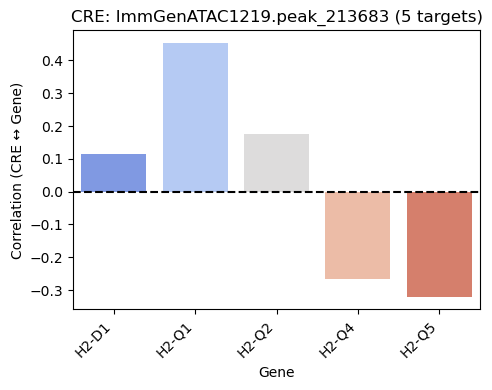

/var/folders/3f/pxvhxt1x4477ds3p64jyb_6c0000gn/T/ipykernel_16711/2344618379.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gene', y='correlation', data=group, palette='coolwarm')


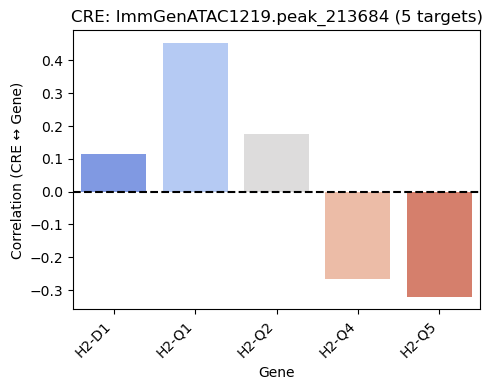

/var/folders/3f/pxvhxt1x4477ds3p64jyb_6c0000gn/T/ipykernel_16711/2344618379.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gene', y='correlation', data=group, palette='coolwarm')


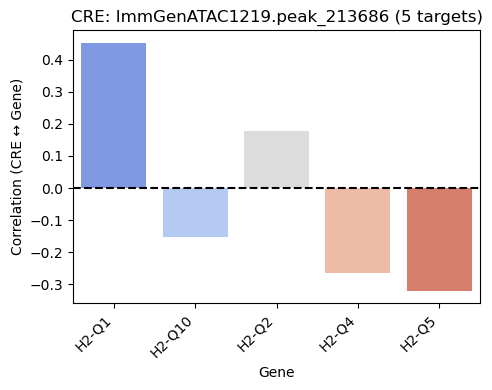

In [123]:
conflicting_CREs = mixed_cre.groupby('peakID').filter(
    lambda x: (x['correlation'] > 0.3).any() and (x['correlation'] < -0.3).any())

# only top CREs
top_CREs = conflicting_CREs['peakID'].value_counts().head(5).index
subset = conflicting_CREs[conflicting_CREs['peakID'].isin(top_CREs)]

for cre, group in subset.groupby('peakID'):
    plt.figure(figsize=(5, 4))
    sns.barplot(x='Gene', y='correlation', data=group, palette='coolwarm')
    plt.axhline(0, color='black', linestyle='--')
    plt.title(f'CRE: {cre} ({len(group)} targets)')
    plt.ylabel('Correlation (CRE ↔ Gene)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


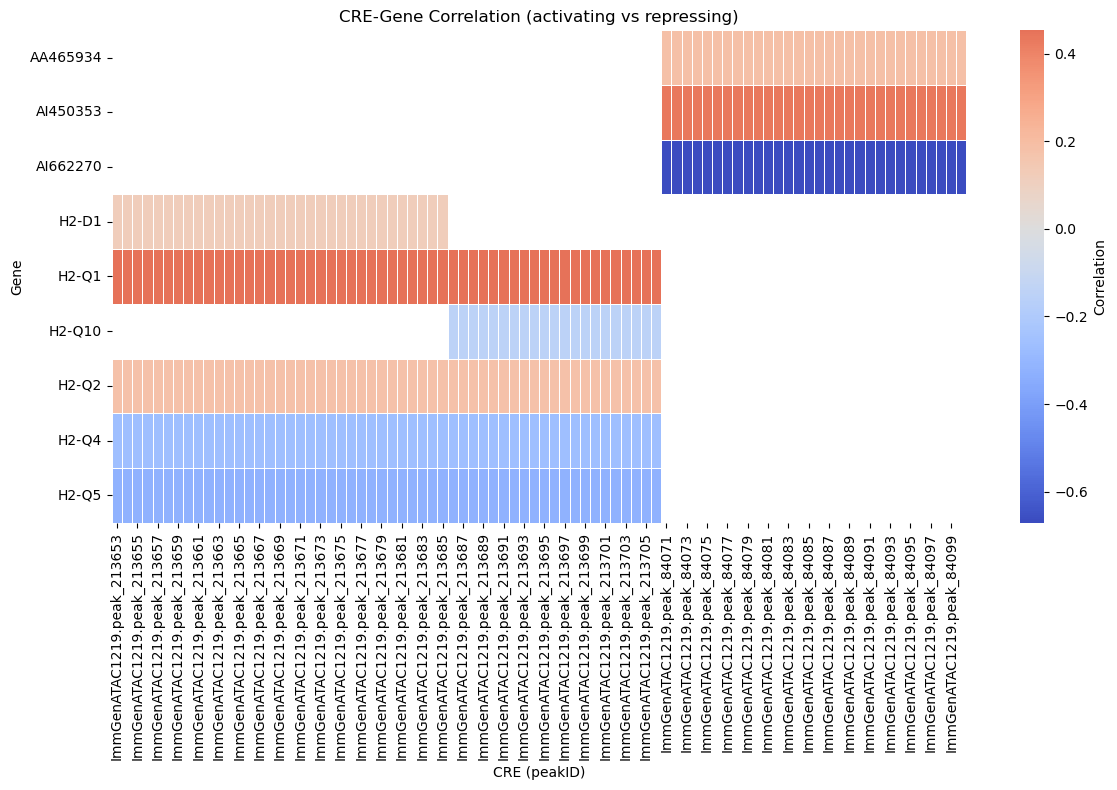

In [124]:
# Pivot Table: Gene vs CRE
heatmap_data = mixed_cre.pivot(index='Gene', columns='peakID', values='correlation')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', center=0, linewidths=0.5, cbar_kws={'label': 'Correlation'})
plt.title('CRE-Gene Correlation (activating vs repressing)')
plt.xlabel('CRE (peakID)')
plt.ylabel('Gene')
plt.tight_layout()
plt.savefig("figures/Heatmap_both_activating_repressing_CREs_TSS", dpi=300, bbox_inches='tight')
plt.show()

In [150]:
conflicting_CREs = mixed_cre.groupby('peakID').filter(
    lambda x: (x['correlation'] > 0.3).any() and (x['correlation'] < -0.3).any())

G = nx.Graph()

for _, row in conflicting_CREs.iterrows():
    cre = row['peakID']
    gene = row['Gene']
    corr = row['correlation']

    G.add_node(cre, type='CRE')
    G.add_node(gene, type='Gene')
    G.add_edge(cre, gene, weight=abs(corr), sign='pos' if corr > 0 else 'neg')

pos = nx.spring_layout(G, k=0.5, iterations=50, seed=42)

node_x, node_y, node_text, node_color = [], [], [], []

for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(node)
    node_color.append('skyblue' if G.nodes[node]['type'] == 'Gene' else 'tomato')

node_trace = go.Scatter(
    x=node_x,
    y=node_y,
    mode='markers+text',
    hoverinfo='text',
    text=node_text,
    textposition='top center',
    marker=dict(
        color=node_color,
        size=12,
        line=dict(width=1, color='black')))

edge_traces = []
for u, v, data in G.edges(data=True):
    x0, y0 = pos[u]
    x1, y1 = pos[v]
    color = 'red' if data['sign'] == 'neg' else 'green'
    edge_trace = go.Scatter(
        x=[x0, x1],
        y=[y0, y1],
        line=dict(width=1, color=color),
        hoverinfo='none',
        mode='lines')
    edge_traces.append(edge_trace)

fig = go.Figure(data=edge_traces + [node_trace],
                layout=go.Layout(
                    title='CRE–Gene Regulatory Network (Activating & Repressing)',
                    title_font_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20,l=5,r=5,t=40),
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False)))

fig.write_html("figures/CRE-Gene-Regulatory-Network-Activating-Repressing.html")
fig.show()

### i) Does CRE clustering change if one includes the effect direction on gene expression?

In [127]:
CREs_ID_for_BCell_specific_genes_df.head()

,ImmGenATAC1219.peakID,Gene,chrom,Bcell_ATAC_mean
29024,ImmGenATAC1219.peak_29025,F5,chr1,24864.147143
29025,ImmGenATAC1219.peak_29026,F5,chr1,25853.336429
29026,ImmGenATAC1219.peak_29027,F5,chr1,13206.480000
29027,ImmGenATAC1219.peak_29028,F5,chr1,4098.740714
29028,ImmGenATAC1219.peak_29029,F5,chr1,26731.725714


In [128]:
CREs_ID_for_BCell_specific_genes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1875 entries, 29024 to 478632
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ImmGenATAC1219.peakID  1875 non-null   object 
 1   Gene                   1875 non-null   object 
 2   chrom                  1875 non-null   object 
 3   Bcell_ATAC_mean        1875 non-null   float64
dtypes: float64(1), object(3)
memory usage: 73.2+ KB


In [129]:
activating_CREs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1131 entries, 31858 to 426282
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ImmGenATAC1219.peakID  1131 non-null   object 
 1   Gene                   1131 non-null   object 
 2   chrom                  1131 non-null   object 
 3   Bcell_ATAC_mean        1131 non-null   float64
 4   Type                   1131 non-null   object 
dtypes: float64(1), object(4)
memory usage: 53.0+ KB


In [130]:
repressing_CREs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 744 entries, 29024 to 478632
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ImmGenATAC1219.peakID  744 non-null    object 
 1   Gene                   744 non-null    object 
 2   chrom                  744 non-null    object 
 3   Bcell_ATAC_mean        744 non-null    float64
 4   Type                   744 non-null    object 
dtypes: float64(1), object(4)
memory usage: 34.9+ KB


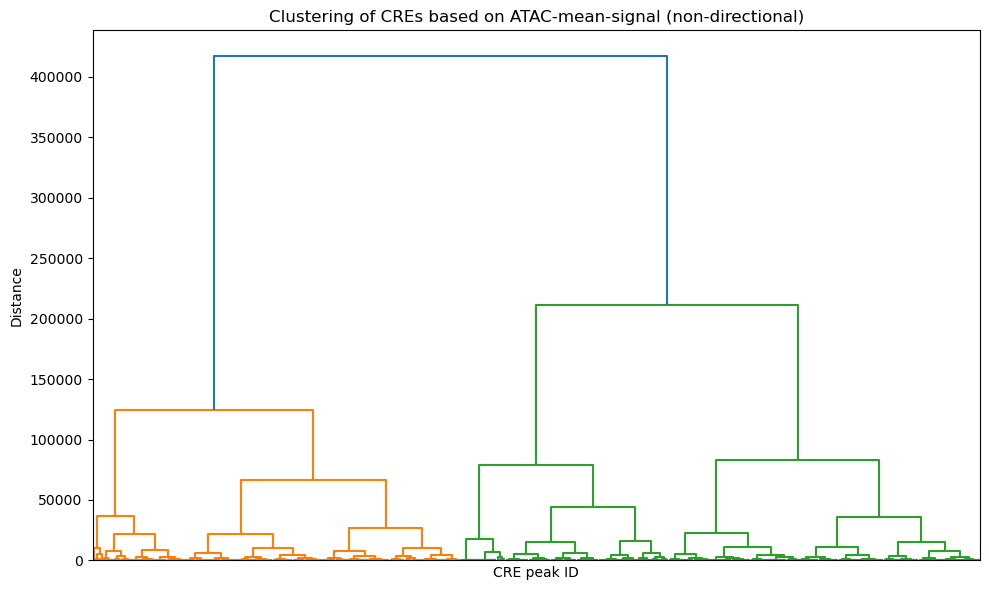

In [131]:
atac_values = CREs_ID_for_BCell_specific_genes_df[['Bcell_ATAC_mean']]

linkage_matrix = linkage(atac_values, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, no_labels=True, leaf_rotation=90)
plt.title("Clustering of CREs based on ATAC-mean-signal (non-directional)")
plt.xlabel("CRE peak ID")
plt.ylabel("Distance")
plt.tight_layout()
plt.savefig("figures/Clustering_CREs_non_directional", dpi=300, bbox_inches='tight')
plt.show()


In [132]:
CREs_all_df = CREs_ID_for_BCell_specific_genes_df.copy()

CREs_all_df['Type'] = 'neutral'  

CREs_all_df.loc[CREs_all_df['ImmGenATAC1219.peakID'].isin(activating_CREs_df['ImmGenATAC1219.peakID']),'Type'] = 'activating'
CREs_all_df.loc[CREs_all_df['ImmGenATAC1219.peakID'].isin(repressing_CREs_df['ImmGenATAC1219.peakID']),'Type'] = 'repressing'

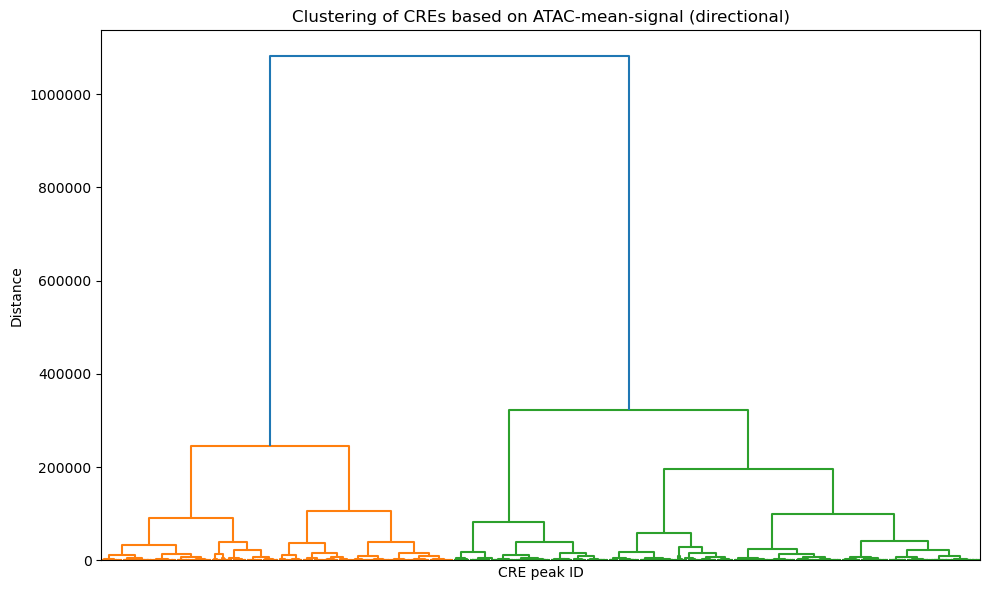

In [133]:
CREs_all_df['direction'] = CREs_all_df['Type'].map({'activating': 1, 'repressing': -1})

CREs_all_df['Bcell_ATAC_directional'] = CREs_all_df['Bcell_ATAC_mean'] * CREs_all_df['direction']

atac_signed = CREs_all_df[['Bcell_ATAC_directional']]
atac_signed = atac_signed.replace([np.inf, -np.inf], np.nan).dropna()

linkage_matrix_dir = linkage(atac_signed, method='ward')

# Plot
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix_dir, no_labels=True,  leaf_rotation=90, leaf_font_size=8)
plt.title("Clustering of CREs based on ATAC-mean-signal (directional)")
plt.xlabel("CRE peak ID")
plt.ylabel("Distance")
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.savefig("figures/Clustering_CREs_directional", dpi=300, bbox_inches='tight')
plt.show()

compare clustering: 

In [134]:
cluster_labels_nondir = fcluster(linkage_matrix, t=7, criterion='maxclust')
cluster_labels_dir = fcluster(linkage_matrix_dir, t=7, criterion='maxclust')

In [135]:
common_index = CREs_all_df.index.intersection(CREs_ID_for_BCell_specific_genes_df.index)
cluster_labels_nondir = cluster_labels_nondir[[i for i, idx in enumerate(CREs_ID_for_BCell_specific_genes_df.index) if idx in common_index]]
cluster_labels_dir = cluster_labels_dir[[i for i, idx in enumerate(CREs_all_df.index) if idx in common_index]]


In [136]:
ari = adjusted_rand_score(cluster_labels_nondir, cluster_labels_dir)
print(f"Adjusted Rand Index: {ari:.3f}")

Adjusted Rand Index: 0.354


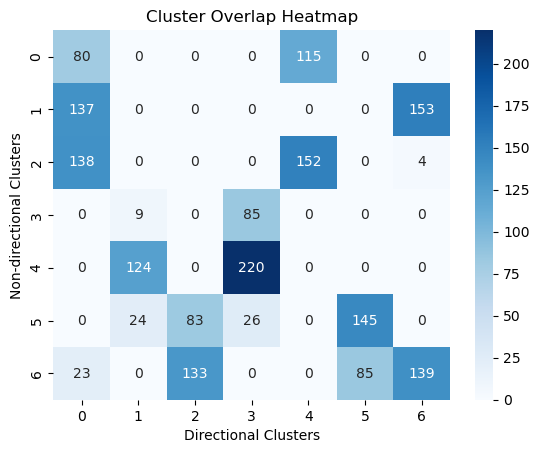

In [137]:
conf_mat = confusion_matrix(cluster_labels_nondir,cluster_labels_dir)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Directional Clusters")
plt.ylabel("Non-directional Clusters")
plt.title("Cluster Overlap Heatmap")
plt.savefig("figures/Cluster_Overlap_Heatmap", dpi=300, bbox_inches='tight')
plt.show()

- clustering is different
- non-directional based on ATAC-signal-peak
- directional based on ATAC-signal-peak multiplied with direction of genregulation 
- ARI= 0.354 -> different clusters 

## iv. Can one cluster genes based on their expression profiles?

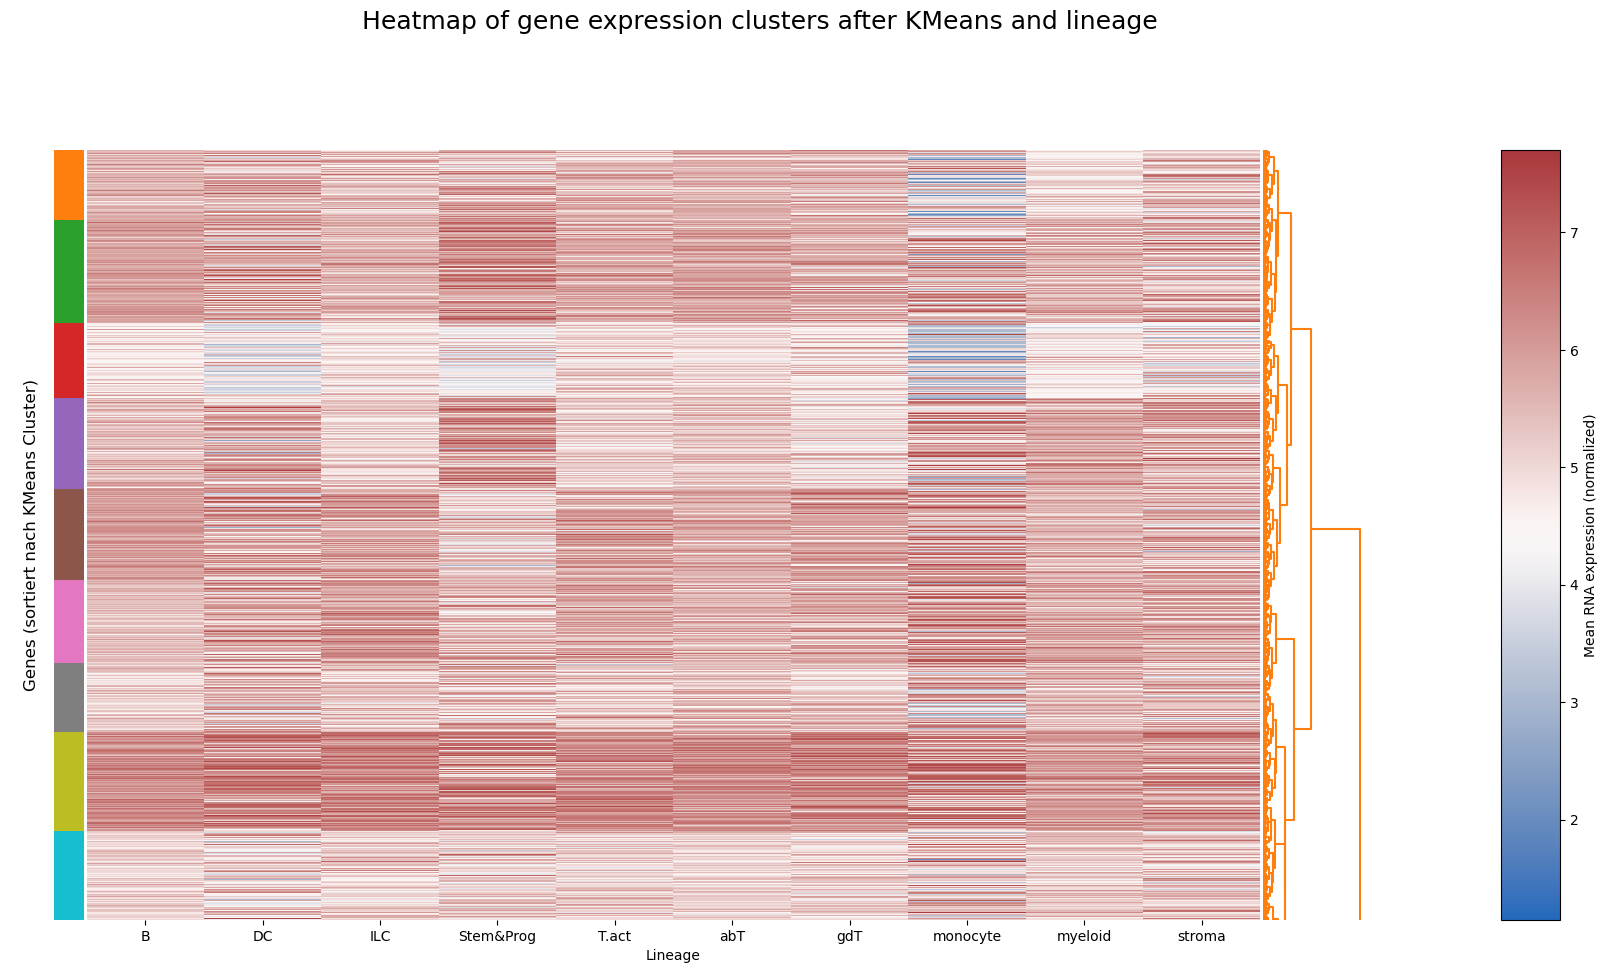

In [138]:
# load QC
QC = pd.read_csv("data/ATAC_QCmatric.csv", sep=";")
QC.columns = QC.columns.str.strip()
QC["CellType"] = QC["CellType"].str.strip()
QC["Lineage"] = QC["Lineage"].str.strip()
celltype_to_lineage = QC.drop_duplicates("CellType").set_index("CellType")["Lineage"]

# filter cell types 
valid_celltypes = [ct for ct in RNA_filtered.columns if ct in celltype_to_lineage]
RNA_filtered_celltype = RNA_filtered[valid_celltypes]
lineages = [celltype_to_lineage[ct] for ct in valid_celltypes]
RNA_filtered_celltype.columns = lineages
RNA_grouped = RNA_filtered_celltype.groupby(axis=1, level=0).mean()

# cluster label
RNA_grouped["cluster"] = labels_9_RNA_filtered

# sort clusters
RNA_sorted = RNA_grouped.sort_values("cluster")
heatmap_data = RNA_sorted.drop(columns="cluster")

# colors
cluster_palette = sns.color_palette("tab10", 10)
row_colors = [cluster_palette[i] for i in RNA_sorted["cluster"]]

# calculate dendrogram
linkage_genes = sch.linkage(heatmap_data, method='ward')

fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(1, 5, width_ratios=[0.7, 0.5, 20, 4, 1], wspace=0.01)

ax_label = fig.add_subplot(gs[0])
ax_label.axis('off')
ax_label.text(0.5, 0.5, "Genes (sortiert nach KMeans Cluster)", rotation=90,
              va='center', ha='center', fontsize=12)

# cluster bar
ax_cluster = fig.add_subplot(gs[1])
ax_cluster.set_xlim(0, 1)
ax_cluster.set_ylim(0, heatmap_data.shape[0])
ax_cluster.axis('off')
for y, color in enumerate(row_colors):
    ax_cluster.add_patch(plt.Rectangle((0, y), 1, 1, facecolor=color, edgecolor='none'))
ax_cluster.invert_yaxis()

# Heatmap 
ax0 = fig.add_subplot(gs[2])
sns.heatmap(heatmap_data, cmap="vlag", yticklabels=False, xticklabels=True, cbar=False, ax=ax0)
ax0.set_xlabel("Lineage")
ax0.set_ylabel("")

# dendrogram
ax1 = fig.add_subplot(gs[3])
sch.dendrogram(linkage_genes, orientation='right', ax=ax1, no_labels=True, color_threshold=None)
ax1.invert_yaxis()
ax1.axis('off')
ax1.set_ylim(ax0.get_ylim())

# colorbar
ax_cb = fig.add_subplot(gs[4])
norm = plt.Normalize(vmin=heatmap_data.values.min(), vmax=heatmap_data.values.max())
sm = plt.cm.ScalarMappable(cmap="vlag", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, cax=ax_cb)
cbar.set_label('Mean RNA expression (normalized)')
cbar.ax.yaxis.label.set_rotation(90)

plt.suptitle("Heatmap of gene expression clusters after KMeans and lineage", fontsize=18, y=1.02)
plt.savefig("figures/Heatmap_RNAclusters_lineages.png", dpi=300, bbox_inches="tight")
plt.show()


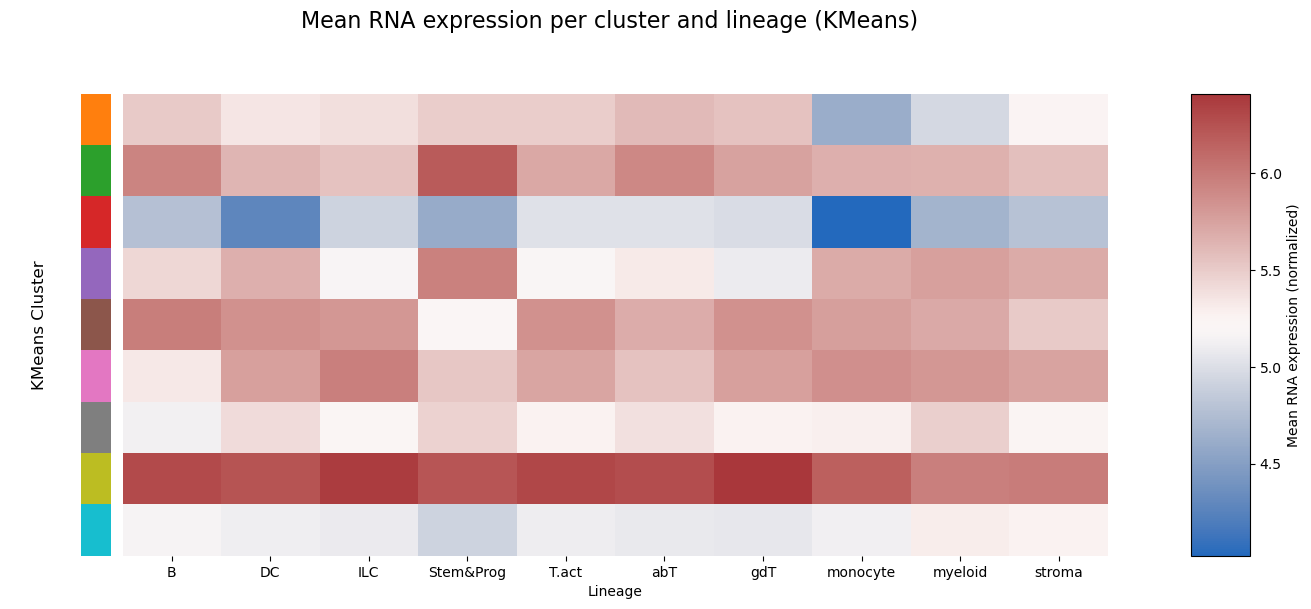

In [139]:
# mean gene expression per cluster
cluster_means = RNA_grouped.groupby("cluster").mean()  # Cluster × Lineage

# colors
cluster_palette = sns.color_palette("tab10", 10)
row_colors = [cluster_palette[i] for i in cluster_means.index]

fig = plt.figure(figsize=(16, 6))
gs = gridspec.GridSpec(1, 5, width_ratios=[0.3, 0.15, 5, 0.3, 0.3], wspace=0.05)

# cluster colors
ax_cluster = fig.add_subplot(gs[1])
ax_cluster.set_xlim(0, 1)
ax_cluster.set_ylim(0, cluster_means.shape[0])
ax_cluster.axis('off')
for y, color in enumerate(row_colors):
    ax_cluster.add_patch(plt.Rectangle((0, y), 1, 1, facecolor=color, edgecolor='none'))
ax_cluster.invert_yaxis()

# heatmap
ax_heatmap = fig.add_subplot(gs[2])
sns.heatmap(cluster_means, cmap="vlag", yticklabels=False, xticklabels=True, cbar=False, ax=ax_heatmap)
ax_heatmap.set_xlabel("Lineage")
ax_heatmap.set_ylabel("")

# colorbar
ax_cb = fig.add_subplot(gs[4])
norm = plt.Normalize(vmin=cluster_means.values.min(), vmax=cluster_means.values.max())
sm = plt.cm.ScalarMappable(cmap="vlag", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, cax=ax_cb)
cbar.set_label('Mean RNA expression (normalized)')
cbar.ax.yaxis.label.set_rotation(90)


ax_label = fig.add_subplot(gs[0])
ax_label.axis('off')
ax_label.text(0.5, 0.5, "KMeans Cluster", rotation=90, ha='center', va='center', fontsize=12)

plt.suptitle("Mean RNA expression per cluster and lineage (KMeans)", fontsize=16, y=1.02)
plt.savefig("figures/Heatmap_RNAclusters_lineages_mean.png", dpi=300, bbox_inches="tight")
plt.show()



Clustering genes based on their expression levels using KMeans does not yield meaningful results. There are no clearly defined lineages within the clusters — genes are either expressed across all lineages or not at all. Expression patterns remain nearly identical between lineages within each cluster.

### a) Can you determine a specific set of genes for Bcells?

We already generated a list of genes with high chromatin accessibility in B cells, which we labeled as B cell–specific genes. These were identified based on a high ΔR², indicating that chromatin accessibility explains gene expression more strongly in B cells than across all cell types.

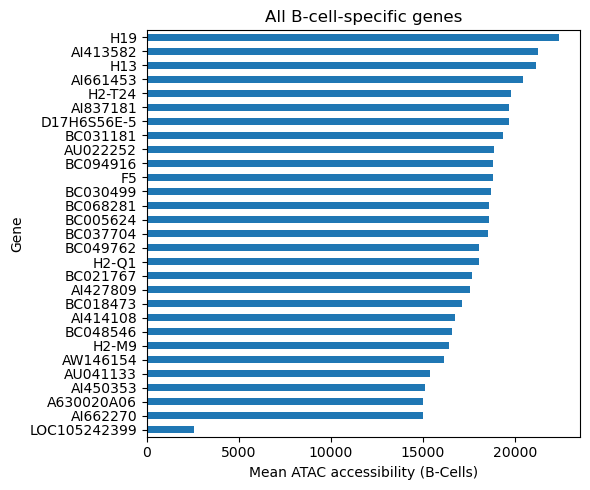

In [ ]:
# for all B-Cell-Genes
all_CREs_BCells.plot(kind='barh', figsize=(6,5))
plt.xlabel("Mean ATAC accessibility (B-Cells)")
plt.ylabel("Gene")
plt.title("All B-cell-specific genes")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("figures/ATAC_signal_all_CREs_Bcells", dpi=300, bbox_inches='tight')
plt.show()

### b) Are there subclusters of special interest?

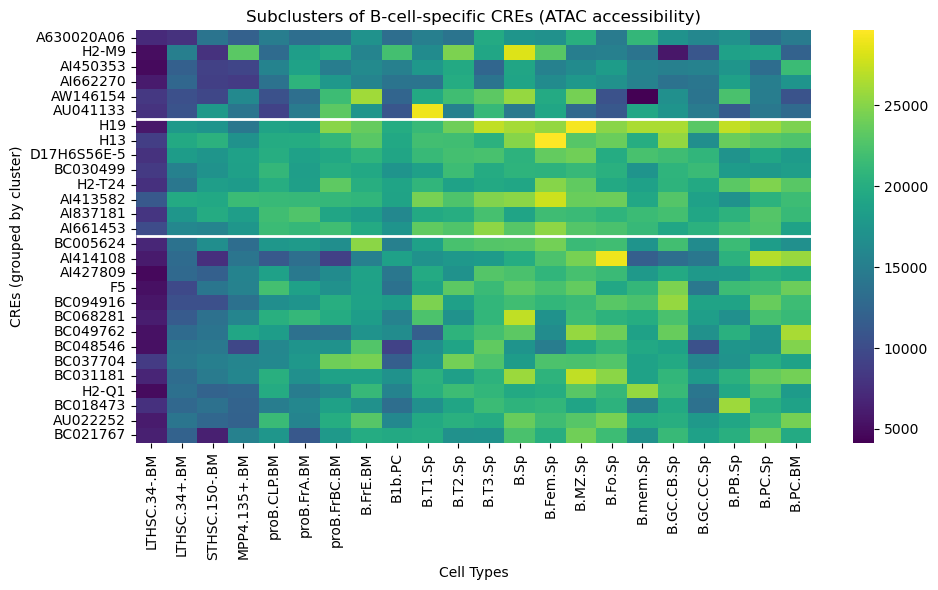

In [157]:
import numpy as np

# Exclude gene LOC105242399
atac_cre_activity_filtered = atac_cre_activity.drop(index='LOC105242399', errors='ignore')

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_trying = kmeans.fit_predict(atac_cre_activity_filtered)

atac_cre_activity_filtered['Cluster'] = labels_trying
atac_cre_sorted = atac_cre_activity_filtered.sort_values('Cluster')

plt.figure(figsize=(10, 6))
ax = sns.heatmap(atac_cre_sorted.drop('Cluster', axis=1), cmap='viridis', yticklabels=True)

# Subcluster boundaries
cluster_changes = np.where(atac_cre_sorted['Cluster'].values[:-1] != atac_cre_sorted['Cluster'].values[1:])[0]
for line_pos in cluster_changes:
    ax.hlines(line_pos + 1, *ax.get_xlim(), colors='white', linewidth=2)

plt.title("Subclusters of B-cell-specific CREs (ATAC accessibility)")
plt.xlabel("Cell Types")
plt.ylabel("CREs (grouped by cluster)")
plt.tight_layout()
plt.savefig("figures/Heatmap_Subcluster_Bcells_Accessibility.png", dpi=300, bbox_inches="tight")
plt.show()


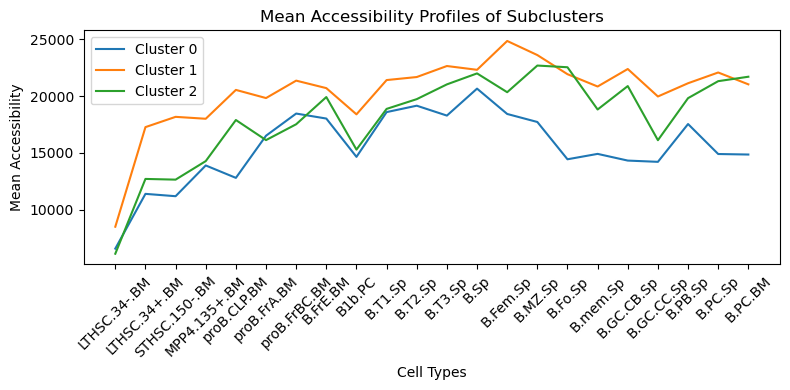

In [158]:
cluster_means = atac_cre_activity_filtered.groupby('Cluster').mean()

plt.figure(figsize=(8,4))
for cluster_id in cluster_means.index:
    plt.plot(cluster_means.columns, cluster_means.loc[cluster_id], label=f'Cluster {cluster_id}')
plt.xticks(rotation=45)
plt.xlabel('Cell Types')
plt.ylabel('Mean Accessibility')
plt.title('Mean Accessibility Profiles of Subclusters')
plt.legend()
plt.tight_layout()
plt.savefig("figures/Lineplot_Subcluster_Bcells_Accessibility.png", dpi=300, bbox_inches="tight")
plt.show()


In [159]:
# Gene im Cluster 1 herausfiltern
cluster_1_genes = atac_cre_activity_filtered[atac_cre_activity_filtered['Cluster'] == 1].index.tolist()

print(f"Number of genes in Cluster 1: {len(cluster_1_genes)}")
print("Genes in Cluster 1:")
for gene in cluster_1_genes:
    print(gene)


Number of genes in Cluster 1: 8
Genes in Cluster 1:
AI413582
AI661453
AI837181
BC030499
D17H6S56E-5
H13
H19
H2-T24


Clustering of B cell–specific genes reveals three clusters that are not clearly distinct in ATAC accessibility across cell types. However, based on mean accessibility profiles, the clusters are well separable. Cluster 1 contains genes with the highest mean ATAC accessibility.

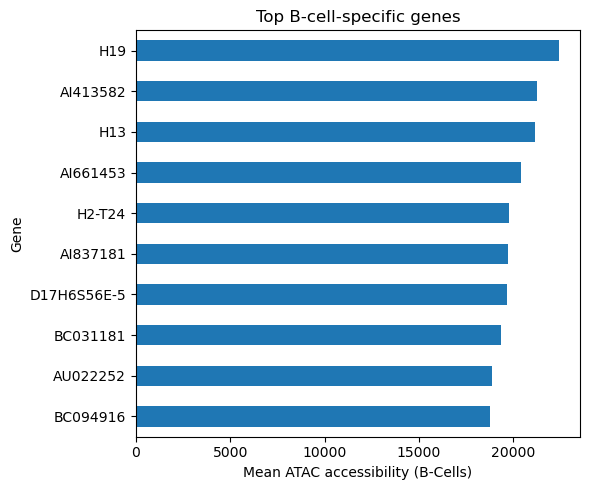

In [160]:
#only for top Genes
top_CREs_BCells.plot(kind='barh', figsize=(6,5))
plt.xlabel("Mean ATAC accessibility (B-Cells)")
plt.ylabel("Gene")
plt.title("Top B-cell-specific genes")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("figures/ATAC_signal_top_CREs_Bcells", dpi=300, bbox_inches='tight')
plt.show()

In [161]:
# Falls cluster_1_genes eine Liste oder Series ist:
cluster_1_genes_set = set(cluster_1_genes)

# Gene-Namen aus dem Index von top_CREs_BCells
top_CREs_genes_set = set(top_CREs_BCells.index)

# Vergleich
common = top_CREs_genes_set & cluster_1_genes_set
only_in_top_CREs = top_CREs_genes_set - cluster_1_genes_set
only_in_cluster_1 = cluster_1_genes_set - top_CREs_genes_set

# Ausgabe
print(f"Anzahl gemeinsamer Einträge: {len(common)}")
print(f"Nur in top_CREs_BCells: {only_in_top_CREs}")
print(f"Nur in cluster_1_genes: {only_in_cluster_1}")


Anzahl gemeinsamer Einträge: 7
Nur in top_CREs_BCells: {'BC031181', 'AU022252', 'BC094916'}
Nur in cluster_1_genes: {'BC030499'}


Cluster 1, which includes genes with the highest mean ATAC accessibility, shows a strong overlap with the top B cell–specific genes. This suggests that genes with high accessibility across cell types are also those most strongly associated with B cell–specific regulation.